In [1]:
# ===============================================================
# === COMIENZA TP1: UN PRIMER ENCUENTRO CON LA EPH  ===
# ===============================================================

# En este trabajo práctico se trabaja con las bases originales de la EPH
# correspondientes al primer trimestre de:
# - 2005 (archivo: usu_individual_T105.dta)
# - 2025 (archivo: usu_individual_T125.xls)

# Objetivos del TP1:
# 1. Familiarizarse con la estructura de la Encuesta Permanente de Hogares (EPH).
# 2. Descargar y cargar las bases originales desde la web del INDEC.
# 3. Seleccionar una región específica y filtrar los datos por dicha región.
# 4. Seleccionar al menos 15 variables relevantes:
#    (incluyendo CH04, CH06, CH07, CH08, NIVEL_ED, ESTADO, CAT_INAC, IPCF).
# 5. Analizar y visualizar valores faltantes mediante heatmaps.
# 6. Limpiar valores inconsistentes o inválidos (ej. ingresos negativos).
# 7. Crear bases separadas:
#    - respondieron (hogares con ingreso reportado)
#    - norespondieron (hogares sin ingreso reportado)
# 8. Calcular adultos equivalentes por hogar.
# 9. Calcular ingreso necesario por hogar según Canasta Básica Total.
# 10. Construir la variable binaria de pobreza (pobre = 1 / no pobre = 0).
# 11. Realizar análisis exploratorio con gráficos y matrices de correlación.

# A partir de aquí comienza el desarrollo paso a paso del TP1.
# ===============================================================

import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Entorno Jupyter funcionando correctamente.")

✅ Entorno Jupyter funcionando correctamente.


In [2]:
# === CARGA DE MICRODATOS EPH - Primer trimestre 2005 ===

# Ruta del archivo .dta (ajustada a tu PC)
ruta = r"C:\Users\julla\Downloads\Datos\Individual_t105.dta"

# Cargar base con pandas
df = pd.read_stata(ruta)

# Vista general
print("✅ Base cargada correctamente")
print("Filas y columnas:", df.shape)
df.head(5)

✅ Base cargada correctamente
Filas y columnas: (47030, 176)


CODUSU  nro_hogar componente  h15    ano4       trimestre  \
0  125098          1.0        1.0   Sí  2005.0  1er. Trimestre   
1  125188          1.0        1.0   Sí  2005.0  1er. Trimestre   
2  125188          1.0        2.0   Sí  2005.0  1er. Trimestre   
3  125188          1.0        3.0  0.0  2005.0  1er. Trimestre   
4  125242          1.0        1.0   Sí  2005.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1017.0  ...     08   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1103.0  ...     09   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              07      08              05   0.0   0.0   0.0  00000  
1              02      02              01   0.0   0.0   0.0  40020  
2              02      02              01   0.0   0.0   0.0  00000  
3              02      02              01   0.0   0.0   0.0  00000  
4              09      09              07   0.0   0.0   0.0  00000  

[5 rows x 176 columns]

In [3]:
# Información general
df.info()

# Variables disponibles
print("\nColumnas disponibles:\n")
print(df.columns.tolist())

# Vista rápida de los valores únicos en algunas columnas clave
cols_principales = ['CH04', 'CH06', 'CAT_OCUP', 'ESTADO', 'NIVEL_ED', 'P47T']
for col in cols_principales:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()[:10]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47030 entries, 0 to 47029
Columns: 176 entries, CODUSU to idimpp
dtypes: category(94), float64(46), object(36)
memory usage: 33.7+ MB

Columnas disponibles:

['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', '

In [4]:
# === CARGA DE MICRODATOS EPH - Primer trimestre 2025 ===

# Ruta del archivo .txt
ruta_2025 = r"C:\Users\julla\Downloads\Datos\usu_individual_T125.txt"

# Cargar base (delimitador punto y coma)
df_2025 = pd.read_csv(ruta_2025, sep=';', encoding='latin-1', low_memory=False)

# Vista general
print("✅ Base 2025 cargada correctamente desde TXT")
print("Filas y columnas:", df_2025.shape)
df_2025.head()


✅ Base 2025 cargada correctamente desde TXT
Filas y columnas: (45425, 235)


CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           2    1   
1  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           3    0   
2  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           4    0   
3  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           5    0   
4  TQRMNOUPQHLOLOCDEFKID00851757  2025          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  V21_03_M  V22_01_M V22_02_M  \
0      43       S           4      927  ...         0         0        0   
1      43       S           4      927  ...         0         0        0   
2      43       S           4      927  ...         0         0        0   
3      43       S           4      927  ...         0         0        0   
4      43       S           4     1294  ...         0         0        0   

   V22_03_M  P_DECCF  P_RDECCF  P_GDECCF  P_PDECCF  P_IDECCF  P_ADECCF  
0         0      3.0       2.0       3.0       NaN       3.0       2.0  
1         0      3.0       2.0       3.0       NaN       3.0       2.0  
2         0      3.0       2.0       3.0       NaN       3.0       2.0  
3         0      3.0       2.0       3.0       NaN       3.0       2.0  
4         0      3.0       3.0       3.0       NaN       3.0       3.0  

[5 rows x 235 columns]

In [5]:
print("Columnas 2005:", len(df.columns))
print("Columnas 2025:", len(df_2025.columns))

# Coincidencia de nombres
cols_2005 = set(df.columns)
cols_2025 = set(df_2025.columns)
coincidentes = cols_2005.intersection(cols_2025)
print("\nVariables coincidentes entre 2005 y 2025:", len(coincidentes))
print(sorted(list(coincidentes))[:20])


Columnas 2005: 176
Columnas 2025: 235

Variables coincidentes entre 2005 y 2025: 1
['CODUSU']


In [6]:
# === Normalizar nombres de columnas ===
df_2025.columns = df_2025.columns.str.lower()  # pasar todo a minúsculas
df.columns = df.columns.str.lower()

# Verificar coincidencias nuevamente
cols_2005 = set(df.columns)
cols_2025 = set(df_2025.columns)
coincidentes = cols_2005.intersection(cols_2025)

print("🔁 Variables coincidentes entre 2005 y 2025:", len(coincidentes))
print(sorted(list(coincidentes))[:25])  # muestra las primeras 25


🔁 Variables coincidentes entre 2005 y 2025: 168
['adeccfr', 'adecifr', 'adecindr', 'adecocur', 'aglomerado', 'ano4', 'cat_inac', 'cat_ocup', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'codusu', 'componente']


In [7]:
# === AGREGAR VARIABLE DE AÑO Y UNIFICAR BASES ===

# Crear variable de año
df["anio"] = 2005
df_2025["anio"] = 2025

# Conservar solo columnas comunes
cols_comunes = list(coincidentes)

# Unir ambas bases (una sobre otra)
df_union = pd.concat([df[cols_comunes + ["anio"]], df_2025[cols_comunes + ["anio"]]], axis=0)

# Resumen
print("✅ Base combinada creada correctamente")
print("Filas totales:", df_union.shape[0])
print("Columnas totales:", df_union.shape[1])
print("\nAños disponibles:", df_union["anio"].unique())
df_union.head(3)


✅ Base combinada creada correctamente
Filas totales: 92455
Columnas totales: 169

Años disponibles: [2005 2025]


pp07j pp07g2            ch03 decifr  pp08j1 pp10a pp04b1  \
0   0.0    0.0            Jefe     03     0.0   0.0    0.0   
1   0.0    0.0            Jefe     02     0.0   0.0    2.0   
2   0.0    0.0  Cónyuge/Pareja     02     0.0   0.0    0.0   

                         ch08 pp02i        pp04a  ... pp02c1  \
0  Obra social (incluye PAMI)    No          0.0  ...    0.0   
1    No paga ni le descuentan   0.0  ...privada?  ...    0.0   
2    No paga ni le descuentan    Sí          0.0  ...    0.0   

              pp04g pp11l                                          pp09c_esp  \
0               0.0   0.0                                                ...   
1  En esta vivienda   0.0                                                ...   
2               0.0   0.0                                                ...   

  decocur   t_vi  pp11b2_dia pp11l1  pp11c  anio  
0          583.0         0.0    0.0    0.0  2005  
1      03  150.0         0.0    0.0    0.0  2005  
2            0.0         0.0    0.0    0.0  2005  

[3 rows x 169 columns]

In [8]:
!pip install missingno

🔍 Porcentaje de valores faltantes por variable (top 15):
pp09a_esp     49.109296
pp09c_esp     49.014115
ch16_cod      48.563085
pp11d_cod     47.979017
pp11t         47.638311
pp11p         47.638311
pp11r         47.638311
pp11g_ano     47.638311
pp10a         47.638311
pp11b1        47.638311
pp11n         47.638311
pp10c         47.638311
pp11g_dia     47.638311
pp11o         47.638311
pp11b2_dia    47.638311
dtype: float64


C:\Users\julla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


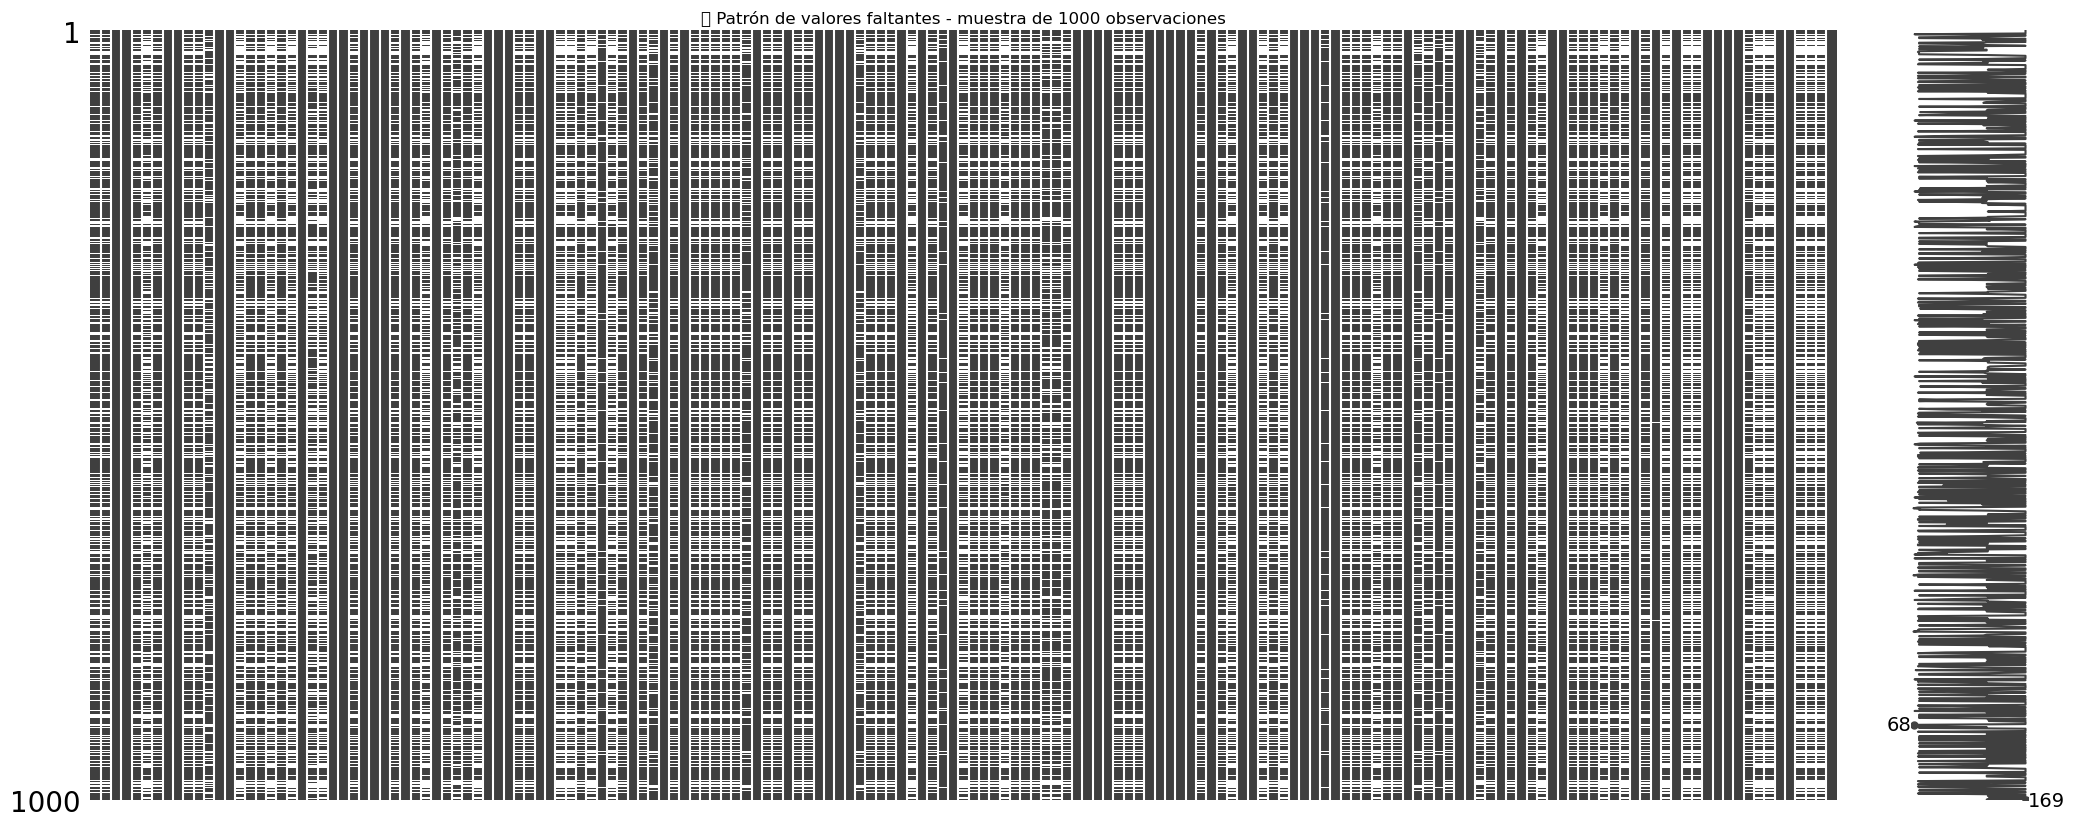

C:\Users\julla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


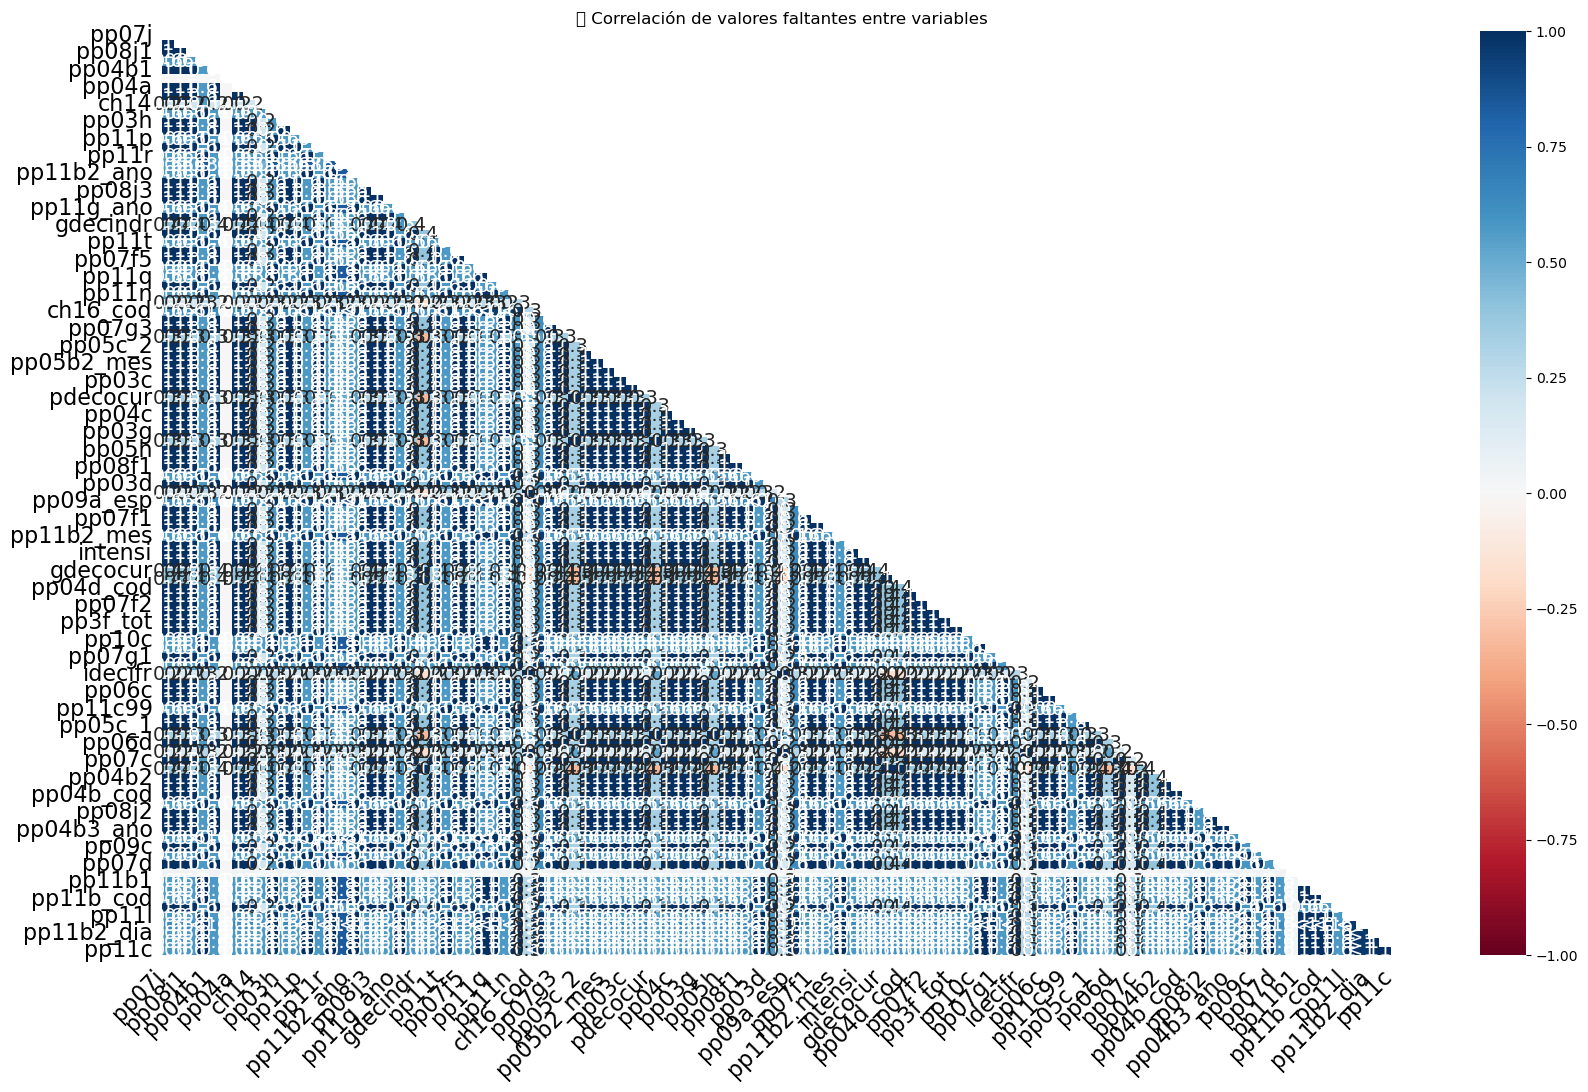

In [9]:
# === ANÁLISIS DE VALORES FALTANTES (Parte I.b) ===
import missingno as msno

# Calcular porcentaje de valores faltantes por variable
faltantes = df_union.isnull().mean() * 100
faltantes = faltantes.sort_values(ascending=False)

print("🔍 Porcentaje de valores faltantes por variable (top 15):")
print(faltantes.head(15))

# Visualización general de completitud
msno.matrix(df_union.sample(1000, random_state=1))  # muestra 1000 registros al azar
plt.title("🔢 Patrón de valores faltantes - muestra de 1000 observaciones")
plt.show()

# Heatmap de correlación de faltantes
msno.heatmap(df_union)
plt.title("🔥 Correlación de valores faltantes entre variables")
plt.show()

In [10]:
# === PARTE I.c - Selección y limpieza de variables de interés ===

# 15 variables clave (según consigna y relevancia socioeconómica)
vars_interes = [
    'ch04',   # Sexo
    'ch06',   # Edad
    'ch07',   # Estado civil
    'ch08',   # Parentesco
    'nivel_ed',   # Nivel educativo
    'estado',     # Condición de actividad
    'cat_inac',   # Categoría de inactividad
    'cat_ocup',   # Categoría ocupacional
    'ipcf',       # Ingreso per cápita familiar
    'pp07g1',     # Ingreso laboral 1
    'pp07g2',     # Ingreso laboral 2
    'pp07h',      # Total de ingresos laborales
    'pp08d',      # Ingreso no laboral
    'pp08h',      # Total de ingresos del hogar
    'anio'        # Año de referencia
]

# Filtrar solo las variables disponibles
vars_presentes = [v for v in vars_interes if v in df_union.columns]
df_sel = df_union[vars_presentes].copy()

print(f"Variables seleccionadas ({len(vars_presentes)}): {vars_presentes}")
print("Filas iniciales:", df_sel.shape[0])

# Revisión de valores anómalos
for col in ['ipcf', 'pp07g1', 'pp07g2', 'pp07h', 'pp08d', 'pp08h']:
    if col in df_sel.columns:
        print(f"\n{col} - Valores únicos problemáticos:")
        print(df_sel[col].value_counts().head(10))

# Limpieza: eliminar negativos y codificaciones erróneas
for col in ['ipcf', 'pp07g1', 'pp07g2', 'pp07h', 'pp08d', 'pp08h']:
    if col in df_sel.columns:
        df_sel[col] = pd.to_numeric(df_sel[col], errors='coerce')  # asegurar tipo numérico
        df_sel.loc[df_sel[col] < 0, col] = np.nan  # eliminar negativos

# Confirmar limpieza
print("\n✅ Limpieza completada.")
print("Filas finales:", df_sel.shape[0])
df_sel.describe(include='all').T.head(10)

Variables seleccionadas (13): ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'cat_ocup', 'ipcf', 'pp07g1', 'pp07g2', 'pp07h', 'anio']
Filas iniciales: 92455

ipcf - Valores únicos problemáticos:
ipcf
0         12053
300.0      1018
200.0       982
100.0       879
150.0       831
400.0       730
500.0       658
250.0       630
50.0        574
300000      533
Name: count, dtype: int64

pp07g1 - Valores únicos problemáticos:
pp07g1
0.0    39085
1.0     9698
Sí      7515
No      5944
2.0     4857
9.0        7
Name: count, dtype: int64

pp07g2 - Valores únicos problemáticos:
pp07g2
0.0    39085
1.0     9634
Sí      7468
No      5991
2.0     4921
9.0        7
Name: count, dtype: int64

pp07h - Valores únicos problemáticos:
pp07h
0.0    38952
1.0     9308
Sí      7170
No      6357
2.0     5319
Name: count, dtype: int64

✅ Limpieza completada.
Filas finales: 92455


count unique      top     freq           mean            std  min  \
ch04        92455      4    Mujer    24550            NaN            NaN  NaN   
ch06      92455.0  106.0     16.0   1676.0            NaN            NaN  NaN   
ch07        92455     11  Soltero    24510            NaN            NaN  NaN   
ch08      92454.0   18.0      1.0  28454.0            NaN            NaN  NaN   
nivel_ed  92455.0   14.0      4.0  10318.0            NaN            NaN  NaN   
estado    92455.0   10.0      1.0  20076.0            NaN            NaN  NaN   
cat_inac  92455.0   15.0      0.0  42030.0            NaN            NaN  NaN   
cat_ocup  92455.0   10.0      0.0  51481.0            NaN            NaN  NaN   
ipcf      84491.0    NaN      NaN      NaN  163219.273994  382225.686156  0.0   
pp07g1    53647.0    NaN      NaN      NaN       0.363021       0.649394  0.0   

            25%    50%       75%         max  
ch04        NaN    NaN       NaN         NaN  
ch06        NaN    NaN       NaN         NaN  
ch07        NaN    NaN       NaN         NaN  
ch08        NaN    NaN       NaN         NaN  
nivel_ed    NaN    NaN       NaN         NaN  
estado      NaN    NaN       NaN         NaN  
cat_inac    NaN    NaN       NaN         NaN  
cat_ocup    NaN    NaN       NaN         NaN  
ipcf      100.0  332.5  196000.0  13050000.0  
pp07g1      0.0    0.0       1.0         9.0

In [11]:
# === Limpieza adicional de variables de ingreso ===

# Reemplazar "Sí"/"No" por NaN y asegurar tipo numérico
for col in ['pp07g1', 'pp07g2', 'pp07h']:
    if col in df_sel.columns:
        df_sel[col] = df_sel[col].replace({'Sí': np.nan, 'No': np.nan})
        df_sel[col] = pd.to_numeric(df_sel[col], errors='coerce')

# Recorte de valores extremos del IPCF (percentiles 1 y 99)
p1, p99 = df_sel['ipcf'].quantile([0.01, 0.99])
df_sel.loc[(df_sel['ipcf'] < p1) | (df_sel['ipcf'] > p99), 'ipcf'] = np.nan

print("✅ Limpieza final aplicada.")
print(df_sel.describe(include='all').T.loc[['ipcf','pp07g1','pp07g2','pp07h']]) 

✅ Limpieza final aplicada.
          count unique  top freq           mean            std  min    25%  \
ipcf    83649.0    NaN  NaN  NaN  139494.779125  279382.051833  0.0  100.0   
pp07g1  53647.0    NaN  NaN  NaN       0.363021       0.649394  0.0    0.0   
pp07g2  53647.0    NaN  NaN  NaN       0.364214       0.651478  0.0    0.0   
pp07h   53579.0    NaN  NaN  NaN       0.372273       0.657451  0.0    0.0   

          50%       75%        max  
ipcf    325.0  179000.0  1687500.0  
pp07g1    0.0       1.0        9.0  
pp07g2    0.0       1.0        9.0  
pp07h     0.0       1.0        2.0  


In [12]:
# === Ver aglomerados del año 2005 ===
df_union['region'].unique()
df_union['aglomerado'].unique()

array(['Ciudad de Buenos Aires', 'Partidos del GBA',
       'Santiago del Estero - La Banda', 'Jujuy - Palpalá',
       'Gran Catamarca', 'Salta', 'La Rioja', 'Gran Tucumán - Tafí Viejo',
       'Posadas', 'Gran Resistencia', 'Corrientes', 'Formosa',
       'Gran Mendoza', 'San Luis - El Chorrillo', 'Gran San Juan',
       'Gran La Plata', 'Bahía Blanca - Cerri', 'Gran Rosario',
       'Gran Santa Fe', 'Gran Paraná', 'Gran Córdoba', 'Concordia',
       'Santa Rosa - Toay', 'Mar del Plata - Batán', 'Río Cuarto',
       'Comodoro Rivadavia - Rada Tilly', 'Neuquén - Plottier',
       'Río Gallegos', 'Ushuaia - Río Grande', 4, 8, 27, 19, 31, 13, 9,
       38, 12, 33, 2, 7, 91, 6, 3, 36, 15, 26, 23, 32, 34, 22, 10, 93, 5,
       30, 29, 20, 25, 18, 14, 17], dtype=object)

In [13]:
# === Ver aglomerados del año 2025 ===
df_union[df_union['anio'] == 2025]['aglomerado'].unique()

array([4, 8, 27, 19, 31, 13, 9, 38, 12, 33, 2, 7, 91, 6, 3, 36, 15, 26,
       23, 32, 34, 22, 10, 93, 5, 30, 29, 20, 25, 18, 14, 17],
      dtype=object)

In [14]:
# === Filtrar aglomerado seleccionado ===
aglomerado_sel = 'Partidos del GBA'
df_reg = df_union[df_union['aglomerado'] == aglomerado_sel].copy()

print(f"Aglomerado seleccionado: {aglomerado_sel}")
print("Filas:", df_reg.shape[0])
print("Años disponibles:", df_reg['anio'].unique())

Aglomerado seleccionado: Partidos del GBA
Filas: 7144
Años disponibles: [2005]


In [15]:
# Verificar distribución de códigos de aglomerado en 2025
df_union[df_union['anio'] == 2025]['aglomerado'].value_counts().head(10)

aglomerado
33    5718
29    2198
13    2034
23    1973
10    1897
4     1562
27    1510
19    1495
6     1479
38    1479
Name: count, dtype: int64

In [16]:
# Verificar correspondencia entre aglomerado y región para 2025
df_2025 = df_union[df_union['anio'] == 2025][['aglomerado', 'region']].drop_duplicates()
print(df_2025.sort_values('aglomerado').head(20))

     aglomerado region
132           2     43
168           3     43
0             4     43
463           5     43
164           6     43
140           7     41
14            8     41
70            9     44
396          10     42
81           12     41
51           13     43
1016         14     43
214          15     41
1061         17     44
1000         18     40
31           19     40
632          20     44
387          22     40
251          23     40
873          25     40


In [17]:
# Verificar los nombres de región y aglomerado en 2025
# REGION (N)	Código de región macroeconómica	01 = Gran Buenos Aires ✅
# AGLOMERADO (N)	Código de aglomerado dentro de cada región	33 = Partidos del Gran Buenos Aires ✅

df_2025 = df_union[df_union['anio'] == 2025][['region', 'aglomerado']].drop_duplicates()
df_2025.sort_values('aglomerado')

region aglomerado
132      43          2
168      43          3
0        43          4
463      43          5
164      43          6
140      41          7
14       41          8
70       44          9
396      42         10
81       41         12
51       43         13
1016     43         14
214      41         15
1061     44         17
1000     40         18
31       40         19
632      44         20
387      40         22
251      40         23
873      40         25
218      42         26
29       42         27
618      40         29
512      43         30
43       44         31
276       1         32
126       1         33
352      43         34
178      43         36
76       43         38
157      44         91
417      44         93

In [18]:
# === Selección coherente de Partidos del Gran Buenos Aires (2005 y 2025) ===

df_reg = df_union[
    (df_union['aglomerado'].isin(['Partidos del GBA', 33])) |
    (df_union['region'].isin([1]))  # seguridad extra si hay codificación numérica
].copy()

print("✅ Región/Aglomerado seleccionado: Partidos del Gran Buenos Aires (GBA)")
print("Filas totales:", df_reg.shape[0])
print("Años disponibles:", df_reg['anio'].unique())

✅ Región/Aglomerado seleccionado: Partidos del Gran Buenos Aires (GBA)
Filas totales: 14325
Años disponibles: [2005 2025]


In [19]:
df_reg['nivel_ed'].value_counts(dropna=False)

nivel_ed
Primaria Completa                                   1629
4                                                   1608
3                                                   1481
Primaria Incompleta (incluye educación especial)    1446
Secundaria Incompleta                               1399
6                                                   1180
5                                                    930
Secundaria Completa                                  915
1                                                    834
2                                                    798
Sin instrucción                                      781
Superior Universitaria Incompleta                    537
Superior Universitaria Completa                      437
7                                                    350
Name: count, dtype: int64

In [20]:
print(df_reg.columns.tolist())

['pp07j', 'pp07g2', 'ch03', 'decifr', 'pp08j1', 'pp10a', 'pp04b1', 'ch08', 'pp02i', 'pp04a', 'pp07k', 'ch14', 'pp02c8', 'v18_m', 'pp10e', 'pp03h', 'pp05b2_dia', 'pp11p', 'pp05b2_ano', 'pp11r', 'pp02c2', 'ch15_cod', 'pp11b2_ano', 'adecocur', 'decindr', 'pp04b3_dia', 'p21', 'v9_m', 'ch12', 'pp08j3', 'nivel_ed', 'pp03j', 'pp11g_ano', 'pp02c7', 'pp05c_3', 'gdecindr', 'pp05e', 'pp11t', 'ch07', 'rdecindr', 'cat_ocup', 'pp07i', 'pp07f5', 'adecifr', 'region', 'pp11a', 'pp11q', 'pp09b', 'pp11n', 'ideccfr', 'ch16_cod', 'pp09a', 'v19_am', 'pp07g3', 'pdeccfr', 'nro_hogar', 'pp05c_2', 'pp02c5', 'pp07f4', 'pp05b2_mes', 'pp05f', 'pp03c', 'pp08f2', 'pdecocur', 'rdecocur', 'pp06a', 'pp04c', 'pp02h', 'pp07f3', 'pp03g', 'ano4', 'ch11', 'itf', 'pp02e', 'pdecifr', 'pp05h', 'pp08d4', 'pp08f1', 'tot_p12', 'pp11g_mes', 'deccfr', 'pp03d', 'idecocur', 'mas_500', 'pp09a_esp', 'pp07a', 'pp07f1', 'pp3e_tot', 'pp11b2_mes', 'pp03i', 'intensi', 'pp08d1', 'gdecocur', 'gdecifr', 'pp04d_cod', 'v4_m', 'h15', 'cat_inac', 

In [21]:
print(df_reg['nivel_ed'].unique()[:20])
print(df_reg['nivel_ed'].value_counts(dropna=False).head(10))

['Primaria Incompleta (incluye educación especial)' 'Primaria Completa'
 'Secundaria Completa' 'Secundaria Incompleta'
 'Superior Universitaria Incompleta' 'Superior Universitaria Completa'
 'Sin instrucción' 3 1 4 7 2 6 5]
nivel_ed
Primaria Completa                                   1629
4                                                   1608
3                                                   1481
Primaria Incompleta (incluye educación especial)    1446
Secundaria Incompleta                               1399
6                                                   1180
5                                                    930
Secundaria Completa                                  915
1                                                    834
2                                                    798
Name: count, dtype: int64


In [22]:
print(df_reg['nivel_ed'].dropna().unique()[:20])
print(df_reg['nivel_ed'].dtype)

['Primaria Incompleta (incluye educación especial)' 'Primaria Completa'
 'Secundaria Completa' 'Secundaria Incompleta'
 'Superior Universitaria Incompleta' 'Superior Universitaria Completa'
 'Sin instrucción' 3 1 4 7 2 6 5]
object


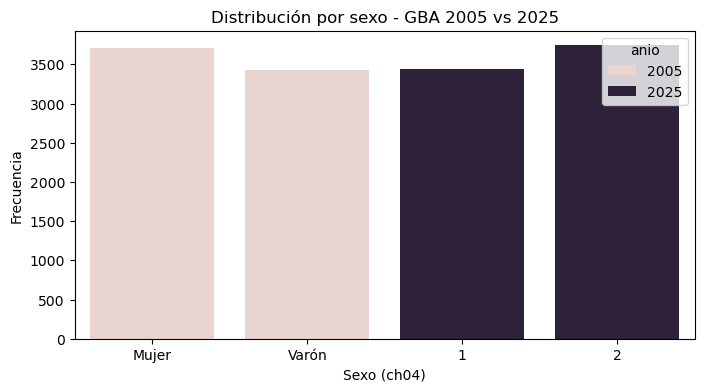

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df_reg, x='ch04', hue='anio')
plt.title("Distribución por sexo - GBA 2005 vs 2025")
plt.xlabel("Sexo (ch04)")
plt.ylabel("Frecuencia")
plt.show()

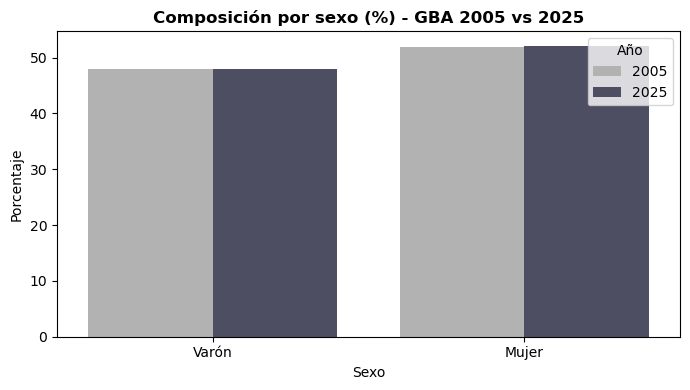

In [24]:
# --- Composición por sexo (%) - versión robusta ---
tmp = df_reg.copy()

# Normalizar ch04 a texto en todos los años
tmp["ch04"] = (
    tmp["ch04"]
    .replace({1: "Varón", 2: "Mujer", "1": "Varón", "2": "Mujer"})
    .fillna("Sin dato")
)

# Tabla de porcentajes por año
prop_df = (
    tmp.groupby(["anio", "ch04"])
       .size()
       .groupby(level=0, group_keys=False)
       .apply(lambda x: x / x.sum() * 100)
       .reset_index(name="Porcentaje")
)

# Forzar tipos/orden para asegurar colores correctos
prop_df["anio"] = prop_df["anio"].astype(str)  # "2005", "2025"
hue_order = ["2005", "2025"]
x_order   = ["Varón", "Mujer"]  # orden deseado en el eje X
palette   = {"2005": "#B2B2B2", "2025": "#4B4A67"}

# Gráfico
plt.figure(figsize=(7, 4))
sns.barplot(
    data=prop_df,
    x="ch04", y="Porcentaje", hue="anio",
    order=x_order, hue_order=hue_order,
    palette=palette, errorbar=None
)
plt.title("Composición por sexo (%) - GBA 2005 vs 2025", fontsize=12, weight="bold")
plt.xlabel("Sexo")
plt.ylabel("Porcentaje")
plt.legend(title="Año", loc="upper right")
plt.tight_layout()
plt.savefig("FIGURAS/composicion_sexo_porcentaje.png", dpi=300)
plt.show()

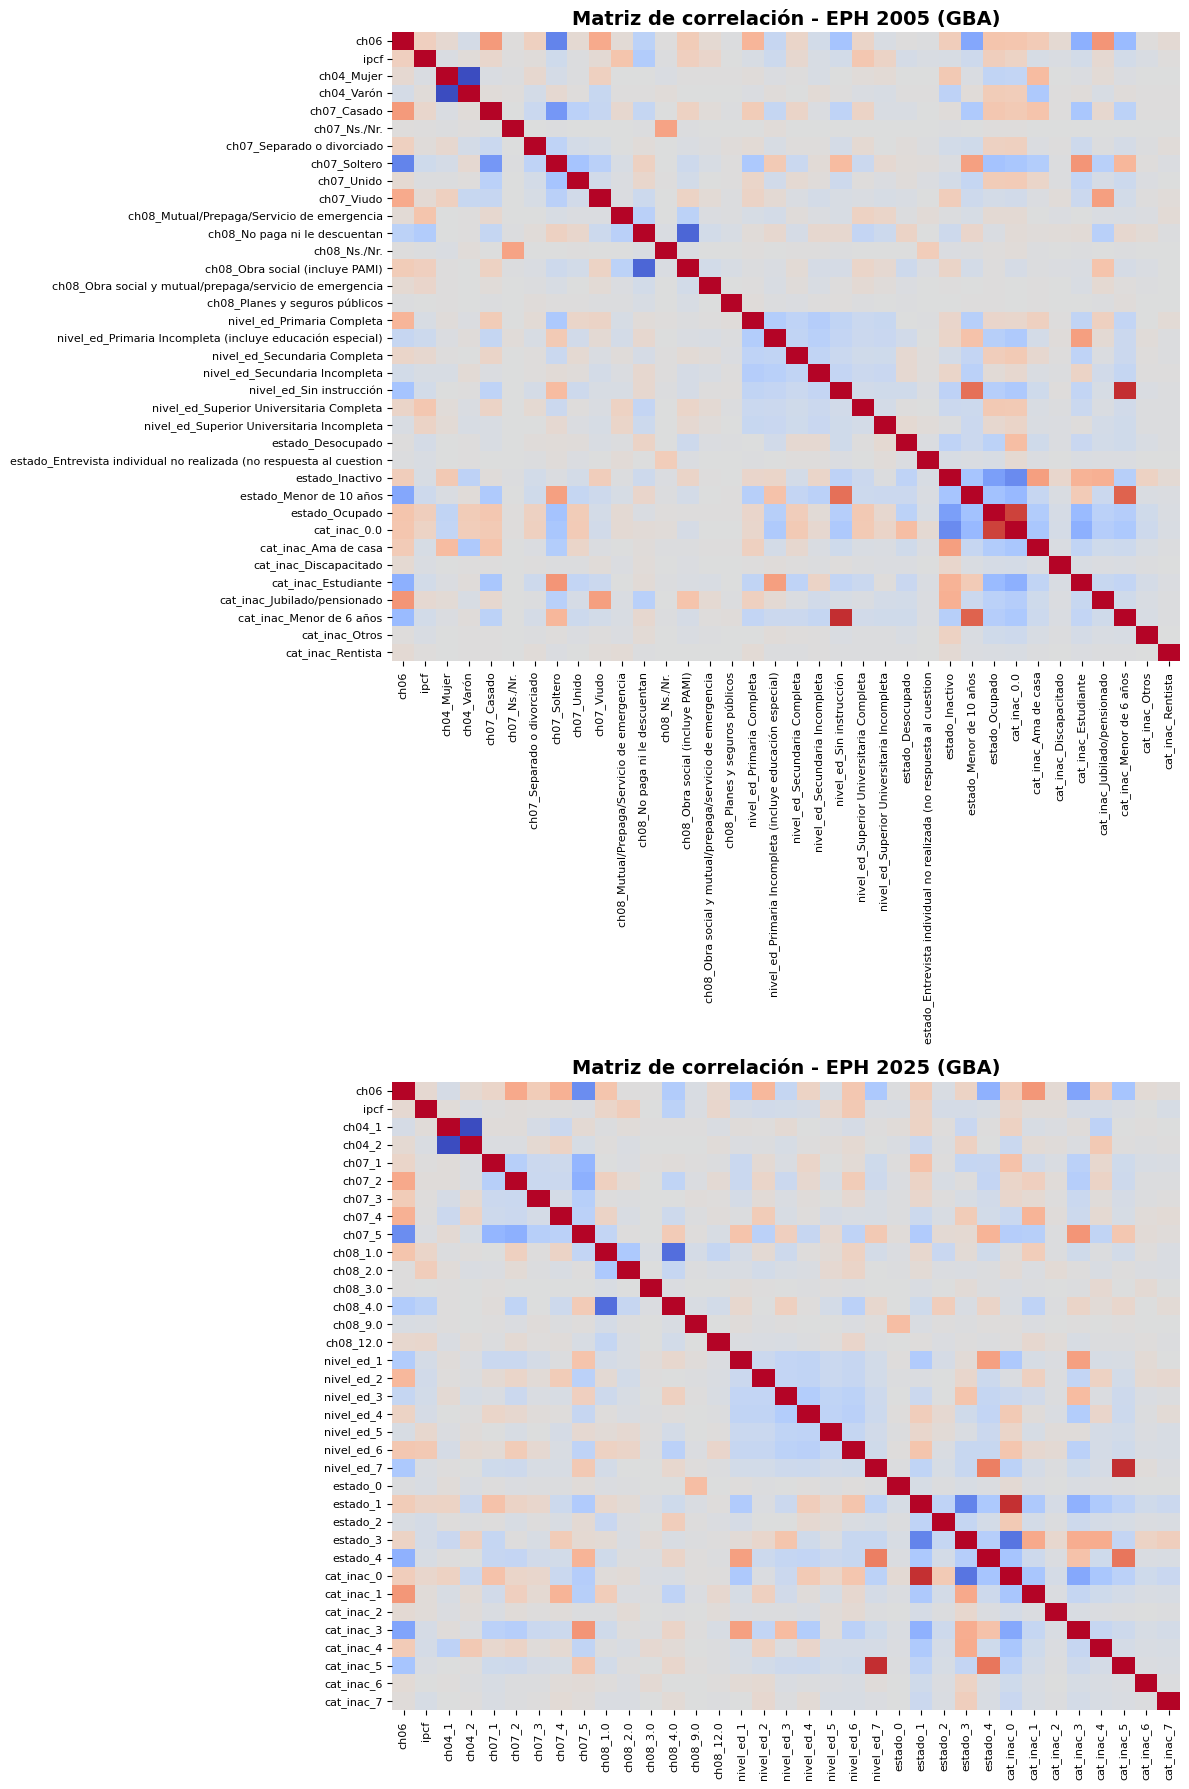

In [25]:
# === INCISO 4 - MATRIZ DE CORRELACIÓN (EPH GBA 2005 vs 2025) ===

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

os.makedirs("FIGURAS", exist_ok=True)

# Variables de interés
vars_corr = ["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf"]

# Subconjuntos
df_2005 = df_reg[df_reg["anio"] == 2005][vars_corr].copy()
df_2025 = df_reg[df_reg["anio"] == 2025][vars_corr].copy()

# Convertir variables numéricas
for col in ["ch06", "ipcf"]:
    df_2005[col] = pd.to_numeric(df_2005[col], errors="coerce")
    df_2025[col] = pd.to_numeric(df_2025[col], errors="coerce")

# Crear variables dummies sin drop_first para mostrar todas las categorías
df_2005_dummies = pd.get_dummies(df_2005, columns=["ch04","ch07","ch08","nivel_ed","estado","cat_inac"], drop_first=False)
df_2025_dummies = pd.get_dummies(df_2025, columns=["ch04","ch07","ch08","nivel_ed","estado","cat_inac"], drop_first=False)

# Calcular matrices de correlación
corr_2005 = df_2005_dummies.corr(numeric_only=True)
corr_2025 = df_2025_dummies.corr(numeric_only=True)

# --- Gráficos en disposición vertical ---
fig, axes = plt.subplots(2, 1, figsize=(12, 18))  # 2 filas, 1 columna

# Matriz 2005
sns.heatmap(corr_2005, ax=axes[0], cmap="coolwarm", center=0, cbar=False)
axes[0].set_title("Matriz de correlación - EPH 2005 (GBA)", fontsize=14, weight="bold")
axes[0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# Matriz 2025
sns.heatmap(corr_2025, ax=axes[1], cmap="coolwarm", center=0, cbar=False)
axes[1].set_title("Matriz de correlación - EPH 2025 (GBA)", fontsize=14, weight="bold")
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig("FIGURAS/correlacion_2005_2025_vertical.png", dpi=300)
plt.show()

C:\Users\julla\AppData\Local\Temp\ipykernel_10888\3661860968.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(invalid_vals, np.nan)


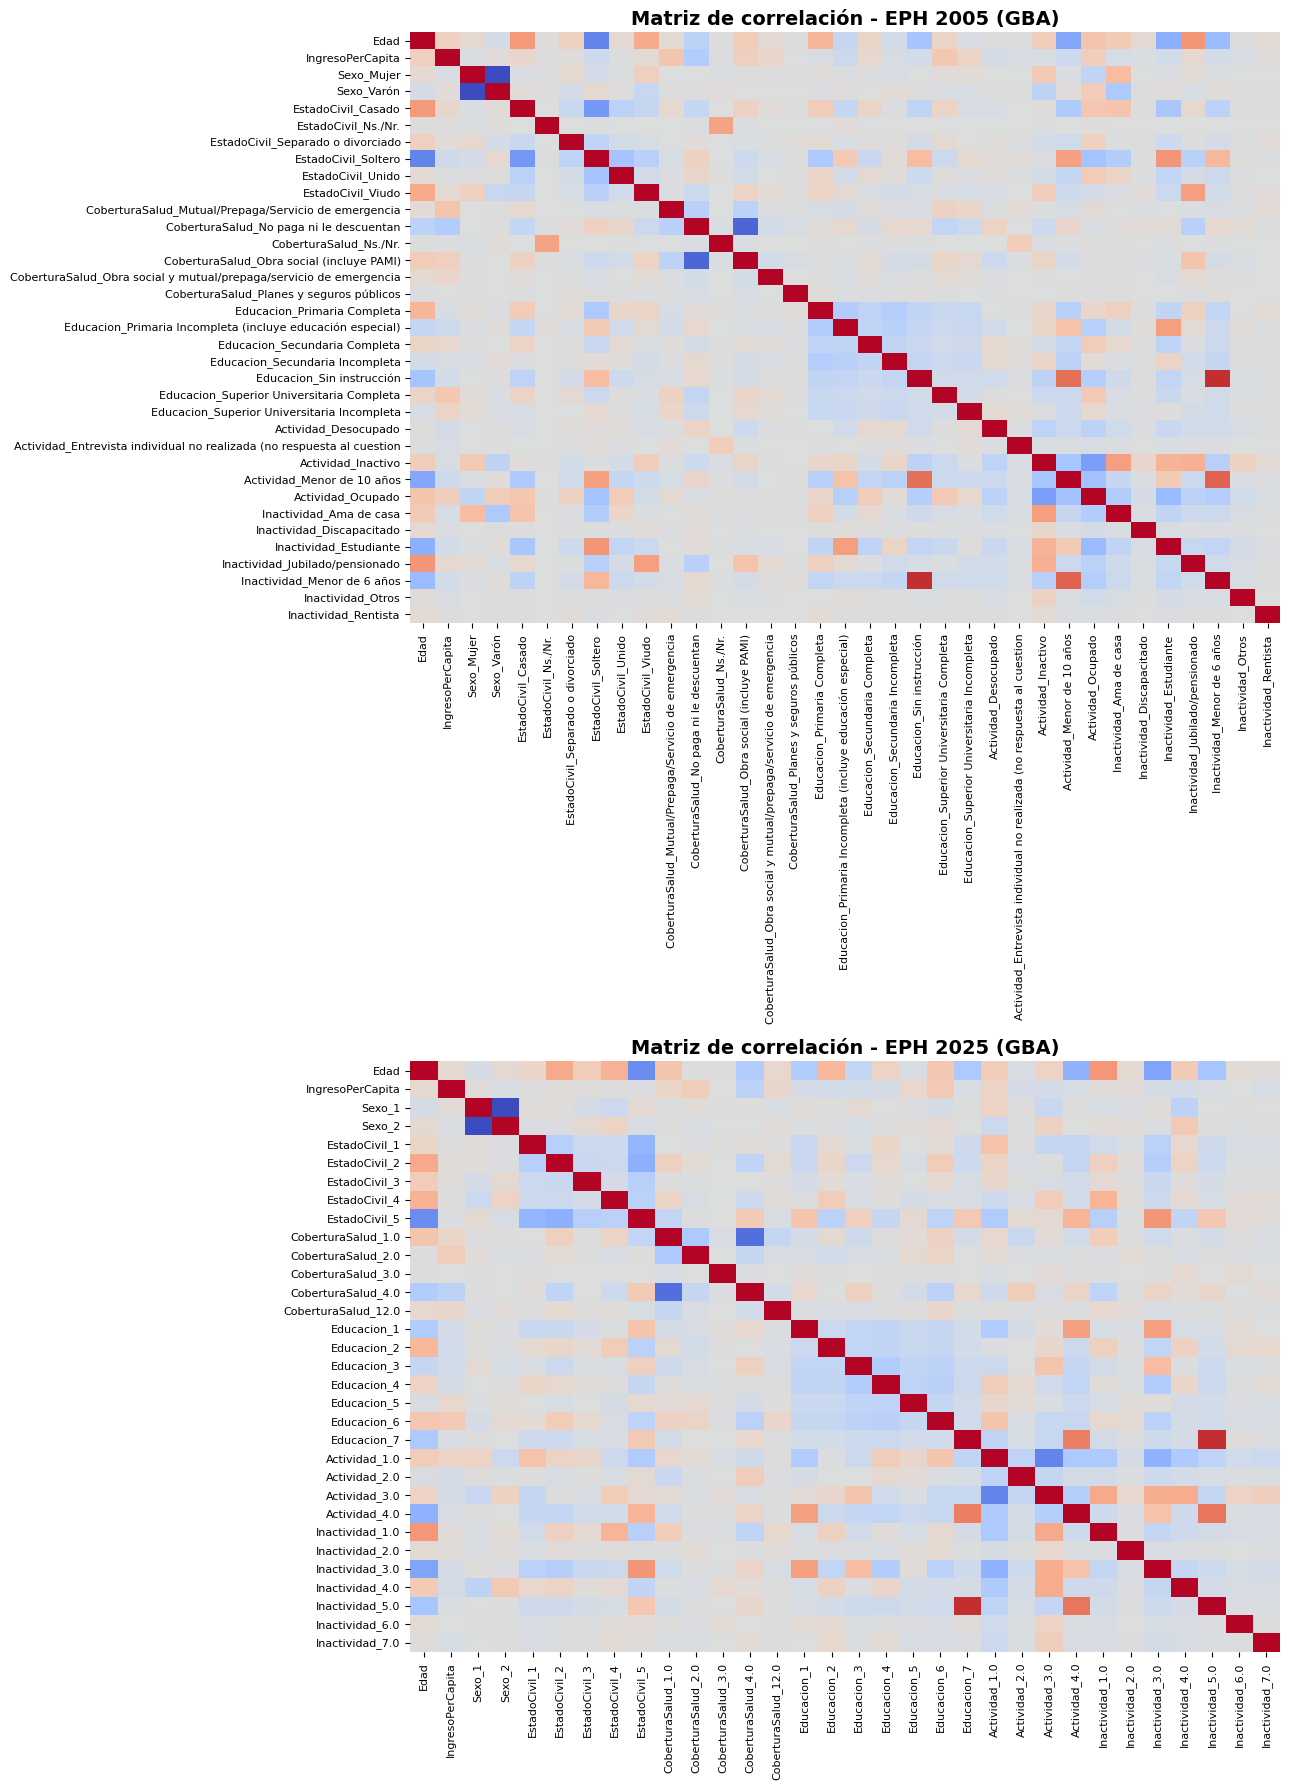

In [26]:
# === INCISO 4 - MATRIZ DE CORRELACIÓN EPH GBA 2005 vs 2025 ===
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, os

os.makedirs("FIGURAS", exist_ok=True)

vars_corr = ["ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac","ipcf"]

# Filtrar por año
df_2005 = df_reg.loc[df_reg["anio"] == 2005, vars_corr].copy()
df_2025 = df_reg.loc[df_reg["anio"] == 2025, vars_corr].copy()

# --- Limpieza: reemplazar códigos inválidos o Ns/Nr ---
invalid_map = {
    "ch04": [9],
    "ch07": [0, 9],
    "ch08": [0, 9],
    "nivel_ed": [0, 9],
    "estado": [0, 9],
    "cat_inac": [0, 9]
}

for df in [df_2005, df_2025]:
    for col, invalid_vals in invalid_map.items():
        df[col] = df[col].replace(invalid_vals, np.nan)

# --- Convertir a numéricas las continuas ---
for col in ["ch06", "ipcf"]:
    df_2005[col] = pd.to_numeric(df_2005[col], errors="coerce")
    df_2025[col] = pd.to_numeric(df_2025[col], errors="coerce")

# --- Crear variables dummies legibles ---
map_prefix = {
    "ch04": "Sexo",
    "ch06": "Edad",
    "ch07": "EstadoCivil",
    "ch08": "CoberturaSalud",
    "nivel_ed": "Educacion",
    "estado": "Actividad",
    "cat_inac": "Inactividad",
    "ipcf": "IngresoPerCapita"
}

# Reorganizar: dummies solo para las categóricas
cats = ["ch04","ch07","ch08","nivel_ed","estado","cat_inac"]

df_2005_dum = pd.get_dummies(
    df_2005,
    columns=cats,
    prefix=[map_prefix[k] for k in cats],
    drop_first=False
).rename(columns={"ch06": "Edad", "ipcf": "IngresoPerCapita"})

df_2025_dum = pd.get_dummies(
    df_2025,
    columns=cats,
    prefix=[map_prefix[k] for k in cats],
    drop_first=False
).rename(columns={"ch06": "Edad", "ipcf": "IngresoPerCapita"})

# --- Calcular correlaciones ---
corr_2005 = df_2005_dum.corr(numeric_only=True)
corr_2025 = df_2025_dum.corr(numeric_only=True)

# --- Graficar heatmaps (verticales) ---
fig, axes = plt.subplots(2, 1, figsize=(13, 18))

sns.heatmap(corr_2005, ax=axes[0], cmap="coolwarm", center=0, cbar=False)
axes[0].set_title("Matriz de correlación - EPH 2005 (GBA)", fontsize=14, weight="bold")
axes[0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

sns.heatmap(corr_2025, ax=axes[1], cmap="coolwarm", center=0, cbar=False)
axes[1].set_title("Matriz de correlación - EPH 2025 (GBA)", fontsize=14, weight="bold")
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig("FIGURAS/correlacion_eph_2005_2025_final.png", dpi=300)
plt.show()

In [27]:
# === INCISO 5 - Análisis de no respuesta en condición de actividad e ingreso ===
import os

# Asegurar que exista la carpeta de salida
os.makedirs("BASES", exist_ok=True)

# Contar no respuestas en condición de actividad
noresp_actividad = df_reg[df_reg["estado"].isin([0, 9])].groupby("anio").size()
print("Personas sin respuesta sobre condición de actividad:")
print(noresp_actividad)

# Crear subconjuntos según respuesta de ingreso total familiar (ITF)
respondieron = df_reg[df_reg["itf"] > 0].copy()
norespondieron = df_reg[(df_reg["itf"] == 0) | (df_reg["itf"].isna())].copy()

# Guardar dimensiones
print("\nDimensiones:")
print("Respondieron:", respondieron.shape)
print("No respondieron:", norespondieron.shape)

# Guardar bases intermedias (opcional)
respondieron.to_csv("BASES/respondieron.csv", index=False)
norespondieron.to_csv("BASES/norespondieron.csv", index=False)

Personas sin respuesta sobre condición de actividad:
anio
2025    21
dtype: int64

Dimensiones:
Respondieron: (11352, 169)
No respondieron: (2973, 169)


In [28]:
# === INCISO 5 - Análisis de no respuesta en condición de actividad e ingreso (2005 vs 2025) ===
import os
os.makedirs("BASES", exist_ok=True)

# --- 1. Personas sin respuesta sobre CONDICIÓN DE ACTIVIDAD ---
# Se consideran códigos 0, 9 o valores faltantes (NaN)
noresp_actividad = (
    df_reg[df_reg["estado"].isin([0, 9]) | df_reg["estado"].isna()]
    .groupby("anio")
    .size()
)
print("Personas sin respuesta sobre condición de actividad (por año):")
print(noresp_actividad)

# --- 2. Separar bases según respuesta de INGRESO TOTAL FAMILIAR ---
respondieron = df_reg[df_reg["itf"] > 0].copy()
norespondieron = df_reg[(df_reg["itf"] == 0) | (df_reg["itf"].isna())].copy()

# --- 3. Contar por año ---
resp_por_anio = respondieron.groupby("anio").size()
noresp_por_anio = norespondieron.groupby("anio").size()

print("\nCantidad de personas que RESPONDIERON ITF (por año):")
print(resp_por_anio)
print("\nCantidad de personas que NO RESPONDIERON ITF (por año):")
print(noresp_por_anio)

# --- 4. Guardar resultados ---
respondieron.to_csv("BASES/respondieron.csv", index=False)
norespondieron.to_csv("BASES/norespondieron.csv", index=False)

print("\nBases exportadas correctamente a la carpeta BASES/")

Personas sin respuesta sobre condición de actividad (por año):
anio
2025    21
dtype: int64

Cantidad de personas que RESPONDIERON ITF (por año):
anio
2005    7043
2025    4309
dtype: int64

Cantidad de personas que NO RESPONDIERON ITF (por año):
anio
2005     101
2025    2872
dtype: int64

Bases exportadas correctamente a la carpeta BASES/


In [29]:
# === INCISO 5 - Análisis de no respuesta: Condición de actividad e ingreso familiar ===

import pandas as pd, numpy as np, os

# Crear carpeta de salida
os.makedirs("BASES", exist_ok=True)

# --- 1. Detección de la variable correcta para condición de actividad ---
# Algunas bases 2005 usan 'cat_ocup' en lugar de 'estado'
if "estado" in df_reg.columns:
    var_act = "estado"
elif "cat_ocup" in df_reg.columns:
    var_act = "cat_ocup"
else:
    raise ValueError("No se encontró la variable de condición de actividad (estado o cat_ocup).")

# --- 2. Personas sin respuesta en condición de actividad ---
# Códigos de no respuesta (0, 9 o valores faltantes)
noresp_actividad = (
    df_reg[
        (df_reg[var_act].isin([0, 9])) | (df_reg[var_act].isna()) | (df_reg[var_act] == " ")
    ]
    .groupby("anio")
    .size()
)

print("Personas sin respuesta sobre condición de actividad (por año):")
print(noresp_actividad)

# --- 3. Separar bases según respuesta de ingreso total familiar ---
respondieron = df_reg[df_reg["itf"] > 0].copy()
norespondieron = df_reg[(df_reg["itf"] == 0) | (df_reg["itf"].isna())].copy()

# --- 4. Conteo resumido por año ---
resp_por_anio = respondieron.groupby("anio").size()
noresp_por_anio = norespondieron.groupby("anio").size()

print("\nCantidad de personas que RESPONDIERON ITF (por año):")
print(resp_por_anio)
print("\nCantidad de personas que NO RESPONDIERON ITF (por año):")
print(noresp_por_anio)

# --- 5. Guardar las bases intermedias ---
respondieron.to_csv("BASES/respondieron.csv", index=False)
norespondieron.to_csv("BASES/norespondieron.csv", index=False)

print("\nBases exportadas correctamente a la carpeta BASES/")

Personas sin respuesta sobre condición de actividad (por año):
anio
2025    21
dtype: int64

Cantidad de personas que RESPONDIERON ITF (por año):
anio
2005    7043
2025    4309
dtype: int64

Cantidad de personas que NO RESPONDIERON ITF (por año):
anio
2005     101
2025    2872
dtype: int64

Bases exportadas correctamente a la carpeta BASES/


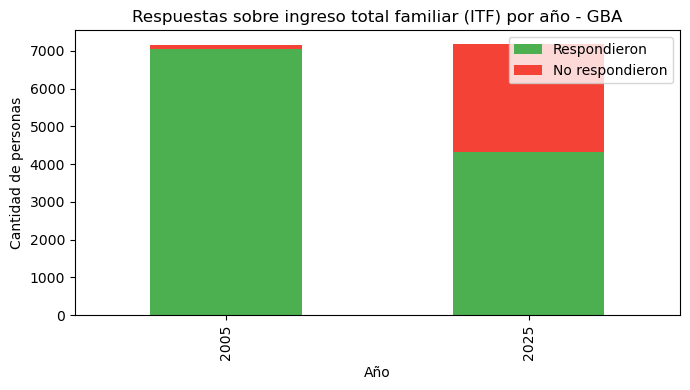

In [30]:
import matplotlib.pyplot as plt

noresp_por_anio = pd.DataFrame({
    "Respondieron": resp_por_anio,
    "No respondieron": noresp_por_anio
})

noresp_por_anio.plot(
    kind="bar",
    stacked=True,
    color=["#4CAF50", "#F44336"],
    figsize=(7,4)
)

plt.title("Respuestas sobre ingreso total familiar (ITF) por año - GBA")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Cargar el archivo con el path que encontraste
path_tabla = r"C:\Users\julla\Downloads\Datos\tabla_adulto_equiv.xlsx"

tabla_equiv = pd.read_excel(path_tabla)

# Mostrar información general
print("=== INFORMACIÓN GENERAL DE LA TABLA DE EQUIVALENCIAS ===")
print(tabla_equiv.info(), "\n")

# Mostrar las primeras filas
print("=== PRIMERAS FILAS DE LA TABLA ===")
print(tabla_equiv.head(10))

# Mostrar nombres de columnas exactos (para saber cómo mapearlos luego)
print("\n=== NOMBRES DE COLUMNAS ===")
print(list(tabla_equiv.columns))

=== INFORMACIÓN GENERAL DE LA TABLA DE EQUIVALENCIAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad  30 non-null     object
 1   Unnamed: 1                                                                                            24 non-null     object
 2   Unnamed: 2                                                                                            24 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB
None 

=== PRIMERAS FILAS DE LA TABLA ===
  Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad  \
0  

In [32]:
print(respondieron["ch04"].unique()[:20])
print(respondieron["ch04"].value_counts(dropna=False).head(10))

['Mujer' 'Varón' 1 2]
ch04
Mujer    3660
Varón    3383
2        2256
1        2053
Name: count, dtype: int64


In [33]:
# === CORREGIDO: Lectura robusta de tabla_adulto_equiv.xlsx ===
import pandas as pd, numpy as np

path_equiv = r"C:\Users\julla\Downloads\Datos\tabla_adulto_equiv.xlsx"

# Cargar todo sin encabezado
tabla_equiv_raw = pd.read_excel(path_equiv, header=None)

# Buscar fila donde empiece "Edad"
idx_inicio = tabla_equiv_raw[
    tabla_equiv_raw.iloc[:,0].astype(str).str.contains("Edad", case=False, na=False)
].index[0] + 1

# Extraer solo las tres columnas (Edad, Mujeres, Varones)
tabla_equiv = tabla_equiv_raw.iloc[idx_inicio:, [0,1,2]].copy()
tabla_equiv.columns = ["edad", "mujeres", "varones"]

# 🔹 LIMPIEZA ROBUSTA
tabla_equiv = tabla_equiv.dropna(subset=["edad"])             # eliminar filas vacías
tabla_equiv = tabla_equiv[~tabla_equiv["edad"].str.contains("Menor", na=False)]  # quitar textos
tabla_equiv = tabla_equiv[~tabla_equiv["edad"].str.contains("Edad", na=False)]   # quitar encabezados residuales

# Quitar la palabra "años" y convertir a numérico solo cuando sea posible
tabla_equiv["edad"] = (
    tabla_equiv["edad"]
    .astype(str)
    .str.replace(" años","", regex=False)
    .str.strip()
)

# Filtrar solo filas donde edad es numérica
tabla_equiv = tabla_equiv[tabla_equiv["edad"].str.match(r"^\d+$")]
tabla_equiv["edad"] = tabla_equiv["edad"].astype(int)

# Convertir valores de mujeres y varones a numéricos
tabla_equiv["mujeres"] = pd.to_numeric(tabla_equiv["mujeres"], errors="coerce")
tabla_equiv["varones"] = pd.to_numeric(tabla_equiv["varones"], errors="coerce")

# Mostrar verificación
print("✅ Tabla limpia y numérica:")
print(tabla_equiv.head(10))
print("\nColumnas:", tabla_equiv.columns.tolist())

✅ Tabla limpia y numérica:
    edad  mujeres  varones
7      2     0.46     0.46
8      3     0.51     0.51
9      4     0.55     0.55
10     5     0.60     0.60
11     6     0.64     0.64
12     7     0.66     0.66
13     8     0.68     0.68
14     9     0.69     0.69
15    10     0.70     0.79
16    11     0.72     0.82

Columnas: ['edad', 'mujeres', 'varones']


In [34]:
print(respondieron["ch04"].unique()[:20])
print(respondieron["ch04"].value_counts(dropna=False).head(10))

['Mujer' 'Varón' 1 2]
ch04
Mujer    3660
Varón    3383
2        2256
1        2053
Name: count, dtype: int64


In [35]:
# === REPARAR VARIABLE ch04 (sexo) PARA 2005 ===
import pandas as pd

# --- 1️⃣ Cargar base "respondieron" actual ---
respondieron = pd.read_csv("BASES/respondieron.csv", low_memory=False)
respondieron.columns = respondieron.columns.str.lower()

# --- 2️⃣ Cargar base original del 2005 (archivo .dta) ---
base_2005 = pd.read_stata(r"C:\Users\julla\Downloads\Datos\Individual_t105.dta")
base_2005.columns = base_2005.columns.str.lower()

print("Columnas en base 2005:", [c for c in base_2005.columns if "ch" in c or "hogar" in c or "codusu" in c][:12])

# --- 3️⃣ Filtrar solo variables necesarias para merge ---
cols_merge = [c for c in ["codusu", "nro_hogar", "componente", "ch04"] if c in base_2005.columns]
base_2005_sub = base_2005[cols_merge].copy()

# --- 4️⃣ Combinar para reinyectar el sexo en respondieron ---
respondieron = respondieron.merge(
    base_2005_sub,
    on=["codusu", "nro_hogar", "componente"],
    how="left",
    suffixes=("", "_from2005")
)

# Si ch04 está vacío en respondieron, usar el valor de la base 2005
respondieron["ch04"] = respondieron["ch04"].fillna(respondieron["ch04_from2005"])
respondieron.drop(columns=["ch04_from2005"], inplace=True)

# --- 5️⃣ Guardar resultado intermedio ---
respondieron.to_csv("BASES/respondieron_reparado.csv", index=False)
print("\n✅ Variable 'ch04' restaurada correctamente desde Individual_t105.dta")
print("Archivo generado: BASES/respondieron_reparado.csv")
print(respondieron[["anio", "ch04"]].head(10))

Columnas en base 2005: ['codusu', 'nro_hogar', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13']

✅ Variable 'ch04' restaurada correctamente desde Individual_t105.dta
Archivo generado: BASES/respondieron_reparado.csv
   anio   ch04
0  2005  Mujer
1  2005  Mujer
2  2005  Varón
3  2005  Varón
4  2005  Varón
5  2005  Mujer
6  2005  Varón
7  2005  Varón
8  2005  Varón
9  2005  Mujer


In [36]:
# === INCISO 6 – Cálculo de adulto equivalente y suma por hogar ===
import pandas as pd, numpy as np, os

# --- 1️⃣ Crear tabla manual de equivalencias basada en el INDEC ---
tabla_equiv = pd.DataFrame({
    "edad_min": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 30, 46, 61, 76],
    "edad_max": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 29, 45, 60, 75, 120],
    "mujeres": [0.35, 0.37, 0.46, 0.51, 0.55, 0.60, 0.64, 0.66, 0.68, 0.69, 0.70, 0.72, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77, 0.76, 0.77, 0.76, 0.67, 0.63],
    "varones": [0.35, 0.37, 0.46, 0.51, 0.55, 0.60, 0.64, 0.66, 0.68, 0.69, 0.79, 0.82, 0.85, 0.90, 0.96, 1.00, 1.03, 1.04, 1.02, 1.00, 1.00, 0.83, 0.74]
})

# Pasar a formato largo
tabla_equiv_long = tabla_equiv.melt(
    id_vars=["edad_min", "edad_max"],
    var_name="sexo_txt",
    value_name="adulto_equiv"
)

# Asignar códigos EPH (1 = varón, 2 = mujer)
tabla_equiv_long["sexo"] = tabla_equiv_long["sexo_txt"].map({"mujeres": 2, "varones": 1})
tabla_equiv_long = tabla_equiv_long[["edad_min", "edad_max", "sexo", "adulto_equiv"]]

print("Vista previa de tabla_equiv_long:")
print(tabla_equiv_long.head(10))

# --- 2️⃣ Cargar base respondieron ---
respondieron = pd.read_csv("BASES/respondieron_reparado.csv", low_memory=False)
respondieron.columns = respondieron.columns.str.lower()

# --- 🔧 Normalizar variable ch04 a formato numérico (1 = varón, 2 = mujer) ---
respondieron["ch04"] = (
    respondieron["ch04"]
    .replace({"Varón": 1, "Mujer": 2, "varon": 1, "mujer": 2})
    .astype(float)
)

# Convertir variables relevantes
respondieron["ch04"] = pd.to_numeric(respondieron["ch04"], errors="coerce")  # sexo
respondieron["ch06"] = pd.to_numeric(respondieron["ch06"], errors="coerce")  # edad

# --- 3️⃣ Asignar valor adulto_equiv según rango de edad y sexo ---
def buscar_equiv(edad, sexo):
    """Devuelve el adulto_equiv correspondiente al rango de edad y sexo."""
    if pd.isna(edad) or pd.isna(sexo):
        return np.nan
    fila = tabla_equiv_long[
        (tabla_equiv_long["sexo"] == int(sexo)) &
        (edad >= tabla_equiv_long["edad_min"]) &
        (edad <= tabla_equiv_long["edad_max"])
    ]
    return fila["adulto_equiv"].iloc[0] if not fila.empty else np.nan

respondieron["adulto_equiv"] = respondieron.apply(
    lambda row: buscar_equiv(row["ch06"], row["ch04"]),
    axis=1
)

# --- 4️⃣ Calcular total por hogar ---
respondieron["codusu"] = respondieron["codusu"].astype(str)
respondieron["nro_hogar"] = respondieron["nro_hogar"].astype(str)
respondieron["id_hogar"] = respondieron["codusu"] + "_" + respondieron["nro_hogar"]

adultos_equiv_hogar = (
    respondieron.groupby("id_hogar")["adulto_equiv"]
    .sum()
    .reset_index()
    .rename(columns={"adulto_equiv": "ad_equiv_hogar"})
)

respondieron = respondieron.merge(adultos_equiv_hogar, on="id_hogar", how="left")

# --- 5️⃣ Guardar resultado final ---
os.makedirs("BASES", exist_ok=True)
respondieron.to_csv("BASES/respondieron_equiv.csv", index=False)

print("\n✅ Archivo final generado: BASES/respondieron_equiv.csv")
print("Columnas agregadas: adulto_equiv, ad_equiv_hogar")

# --- 6️⃣ Verificar resultados por año ---
print(respondieron.groupby("anio")["adulto_equiv"].agg(["count", "mean", "min", "max"]))

Vista previa de tabla_equiv_long:
   edad_min  edad_max  sexo  adulto_equiv
0         0         0     2          0.35
1         1         1     2          0.37
2         2         2     2          0.46
3         3         3     2          0.51
4         4         4     2          0.55
5         5         5     2          0.60
6         6         6     2          0.64
7         7         7     2          0.66
8         8         8     2          0.68
9         9         9     2          0.69

✅ Archivo final generado: BASES/respondieron_equiv.csv
Columnas agregadas: adulto_equiv, ad_equiv_hogar
      count      mean   min   max
anio                             
2005   6930  0.803110  0.37  1.04
2025   4282  0.813991  0.37  1.04


In [37]:
print(respondieron["adulto_equiv"].describe())
print("\nPorcentaje de valores faltantes en adulto_equiv:",
      respondieron["adulto_equiv"].isna().mean().round(3) * 100, "%")

print("\nEjemplo de hogares con más de 3 adultos equivalentes:")
print(respondieron[respondieron["ad_equiv_hogar"] > 3][["anio", "id_hogar", "ad_equiv_hogar"]].drop_duplicates().head(5))

count    11212.000000
mean         0.807265
std          0.154911
min          0.370000
25%          0.740000
50%          0.770000
75%          1.000000
max          1.040000
Name: adulto_equiv, dtype: float64

Porcentaje de valores faltantes en adulto_equiv: 1.2 %

Ejemplo de hogares con más de 3 adultos equivalentes:
    anio      id_hogar  ad_equiv_hogar
4   2005  125138  _1.0            3.68
8   2005  125169  _1.0            4.66
17  2005  125611  _1.0            3.80
24  2005  125859  _1.0            5.35
31  2005  125943  _1.0            5.56


In [38]:
# === INCISO 7 – Ingreso necesario por hogar según la Canasta Básica Total ===
import pandas as pd, os

# Cargar base con equivalencias
respondieron = pd.read_csv("BASES/respondieron_equiv.csv", low_memory=False)

# Definir valores de la Canasta Básica Total por adulto equivalente
CBT = {2005: 205.07, 2025: 365177}

# Asignar la CBT correspondiente a cada año
respondieron["cbt_equiv"] = respondieron["anio"].map(CBT)

# Calcular ingreso necesario del hogar
respondieron["ingreso_necesario"] = respondieron["cbt_equiv"] * respondieron["ad_equiv_hogar"]

# Guardar nueva versión
os.makedirs("BASES", exist_ok=True)
respondieron.to_csv("BASES/respondieron_ingreso_necesario.csv", index=False)

# --- Resumen de validación ---
print("\n✅ Archivo actualizado: BASES/respondieron_ingreso_necesario.csv")
print("Columnas nuevas: cbt_equiv, ingreso_necesario\n")

# Mostrar algunas filas de ejemplo
print(respondieron[["anio", "id_hogar", "ad_equiv_hogar", "cbt_equiv", "ingreso_necesario"]].sample(10))

# Verificar rango de valores por año
print("\nResumen por año:")
print(respondieron.groupby("anio")["ingreso_necesario"].agg(["min", "mean", "max"]).round(2))


✅ Archivo actualizado: BASES/respondieron_ingreso_necesario.csv
Columnas nuevas: cbt_equiv, ingreso_necesario

       anio                           id_hogar  ad_equiv_hogar  cbt_equiv  \
7245   2025  TQRMNOPUXHLOKTCDEIJAH00855702_1.0            0.67  365177.00   
11161  2025  TQRMNOPRUHMOQNCDEIJAH00882246_1.0            4.59  365177.00   
5139   2005                       243398  _1.0            4.56     205.07   
2586   2005                       186769  _1.0            0.67     205.07   
10551  2025  TQRMNOSUWHLOSLCDEIJAH00855633_1.0            3.27  365177.00   
6787   2005                       281982  _1.0            5.06     205.07   
8124   2025  TQRMNORXWHMOKNCDEIIAD00878832_1.0            3.41  365177.00   
5292   2005                       246357  _1.0            5.25     205.07   
9489   2025  TQRMNOSXXHKKNQCDEIIAD00865530_1.0            4.69  365177.00   
6104   2005                       265943  _1.0            2.29     205.07   

       ingreso_necesario  
7245        2

=== Resumen por año (ad_equiv_hogar, sin winsorizar) ===
         n   mean  median   p10   p25   p75    p90   max
anio                                                    
2005  7043  3.565    3.31  1.59  2.40  4.52  5.900  9.37
2025  4309  2.785    2.58  1.00  1.76  3.56  4.552  9.31 

=== Resumen por año (winsorizado en p99 por año) ===
         n   mean  median   p10   p25   p75    p90   max
anio                                                    
2005  7043  3.560    3.31  1.59  2.40  4.52  5.900  8.17
2025  4309  2.777    2.58  1.00  1.76  3.56  4.552  7.21 

=== Distribución % de hogares por bandas de ad_equiv_hogar ===
band_ad_eq    ≤2   2–3   3–4   4–6   >6
anio anio                              
2005 2005   17.5  23.1  25.5  24.3  9.5
2025 2025   31.5  27.6  24.6  14.0  2.3 



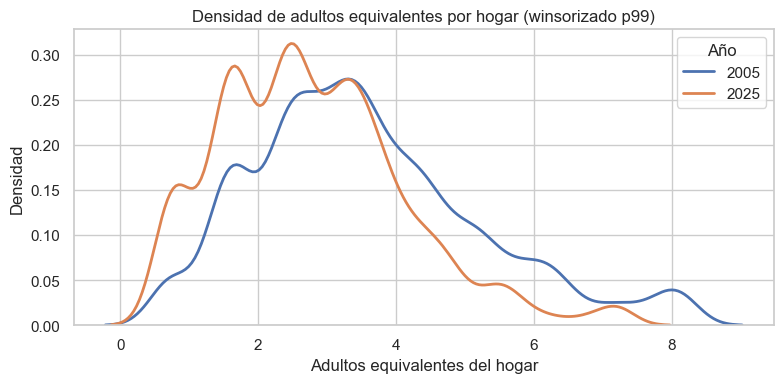

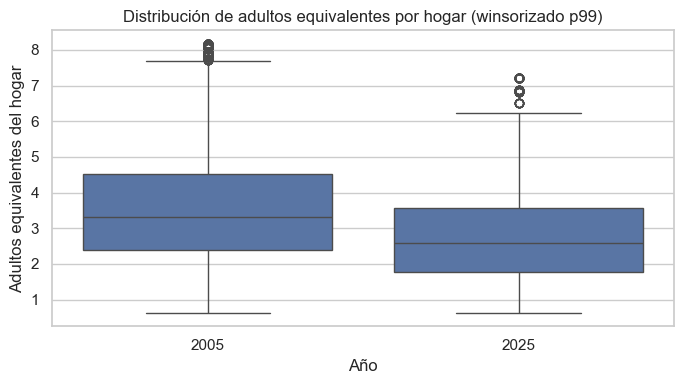

⚠️ Advertencia: el gráfico de barras no se pudo generar, pero el programa continuará.
Detalles del error: cannot insert anio, already exists
Chequeo identidad ingreso_necesario/CBT = ad_equiv_hogar → mediana |gap| = 0.0000


In [39]:
# === ANÁLISIS DE ADULTOS EQUIVALENTES POR HOGAR (2005 vs 2025) ===
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Cargar base con ad_equiv_hogar e ingreso_necesario
df = pd.read_csv("BASES/respondieron_ingreso_necesario.csv", low_memory=False)
df.columns = df.columns.str.lower()

# Sanity checks mínimos
assert {"anio", "ad_equiv_hogar"}.issubset(df.columns), "Faltan columnas clave"
df = df.copy()
df["ad_equiv_hogar"] = pd.to_numeric(df["ad_equiv_hogar"], errors="coerce")
df["anio"] = pd.to_numeric(df["anio"], errors="coerce")

# 2) Resumen por año (no winsorizado)
resumen = (
    df.groupby("anio", observed=False)["ad_equiv_hogar"]
      .agg(n="count", mean="mean", median="median",
           p10=lambda s: s.quantile(0.10),
           p25=lambda s: s.quantile(0.25),
           p75=lambda s: s.quantile(0.75),
           p90=lambda s: s.quantile(0.90),
           max="max")
      .round(3)
)
print("=== Resumen por año (ad_equiv_hogar, sin winsorizar) ===")
print(resumen, "\n")

# 3) Umbrales de outliers (p99 por año) y winsorización
p99 = df.groupby("anio", observed=False)["ad_equiv_hogar"].quantile(0.99)
df = df.merge(p99.rename("p99"), on="anio", how="left")
df["ad_equiv_hogar_w"] = np.where(
    df["ad_equiv_hogar"] > df["p99"], df["p99"], df["ad_equiv_hogar"]
)

resumen_w = (
    df.groupby("anio", observed=False)["ad_equiv_hogar_w"]
      .agg(n="count", mean="mean", median="median",
           p10=lambda s: s.quantile(0.10),
           p25=lambda s: s.quantile(0.25),
           p75=lambda s: s.quantile(0.75),
           p90=lambda s: s.quantile(0.90),
           max="max")
      .round(3)
)
print("=== Resumen por año (winsorizado en p99 por año) ===")
print(resumen_w, "\n")

# 4) Bandas de tamaño equivalente
bins = [0, 2, 3, 4, 6, np.inf]
labels = ["≤2", "2–3", "3–4", "4–6", ">6"]
df["band_ad_eq"] = pd.cut(df["ad_equiv_hogar"], bins=bins, labels=labels, right=True)

dist_bandas = (
    df.groupby(["anio", "band_ad_eq"], observed=False)
      .size()
      .groupby(level=0).apply(lambda s: (100 * s / s.sum()).round(1))
      .unstack(fill_value=0)
)
print("=== Distribución % de hogares por bandas de ad_equiv_hogar ===")
print(dist_bandas, "\n")

# 5) Gráficos (comparables entre años)
sns.set(style="whitegrid")

# 5a) Densidades winsorizadas
plt.figure(figsize=(8, 4))
for a, sub in df.dropna(subset=["ad_equiv_hogar_w"]).groupby("anio", observed=False):
    sns.kdeplot(sub["ad_equiv_hogar_w"], label=str(a), linewidth=2)
plt.title("Densidad de adultos equivalentes por hogar (winsorizado p99)")
plt.xlabel("Adultos equivalentes del hogar")
plt.ylabel("Densidad")
plt.legend(title="Año")
plt.tight_layout()
os.makedirs("FIGURAS", exist_ok=True)
plt.savefig("FIGURAS/densidad_ad_equiv_hogar_p99.png", dpi=300)
plt.show()

# 5b) Boxplot comparativo
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x="anio", y="ad_equiv_hogar_w")
plt.title("Distribución de adultos equivalentes por hogar (winsorizado p99)")
plt.xlabel("Año")
plt.ylabel("Adultos equivalentes del hogar")
plt.tight_layout()
plt.savefig("FIGURAS/box_ad_equiv_hogar_p99.png", dpi=300)
plt.show()

# 5c) Barras apiladas por bandas (versión a prueba de error)
try:
    dist_plot = dist_bandas.copy()

    # Si 'anio' ya es columna, eliminarla antes del reset_index
    if 'anio' in dist_plot.columns:
        dist_plot = dist_plot.drop(columns=['anio'], errors='ignore')

    # Si el índice tiene nombre 'anio', eliminarlo
    if dist_plot.index.name == 'anio':
        dist_plot.index.name = None

    # Reiniciar índice sin duplicar columnas
    dist_plot = dist_plot.reset_index(drop=False)
    dist_plot = dist_plot.loc[:, ~dist_plot.columns.duplicated()]

    # Transformar a formato largo
    dist_plot = dist_plot.melt(id_vars="anio", var_name="banda", value_name="pct")

    # === Gráfico de barras apiladas ===
    plt.figure(figsize=(7, 4))
    sns.barplot(data=dist_plot, x="anio", y="pct", hue="banda")
    plt.title("Estructura de hogares por adultos equivalentes (%)")
    plt.xlabel("Año")
    plt.ylabel("% de hogares")
    plt.legend(title="Bandas ad_eq")
    plt.tight_layout()
    plt.savefig("FIGURAS/bandas_ad_equiv_hogar.png", dpi=300)
    plt.show()

except Exception as e:
    print("⚠️ Advertencia: el gráfico de barras no se pudo generar, pero el programa continuará.")
    print(f"Detalles del error: {e}")


# 6) (Opcional) Chequeo identidad ingreso_necesario / cbt_equiv
if {"ingreso_necesario", "cbt_equiv"}.issubset(df.columns):
    df["check_cbt"] = (df["ingreso_necesario"] / df["cbt_equiv"]).round(3)
    gap = (df["check_cbt"] - df["ad_equiv_hogar"]).abs().median()
    print(f"Chequeo identidad ingreso_necesario/CBT = ad_equiv_hogar → mediana |gap| = {gap:.4f}")

=== Pobreza por año (ITF < ingreso_necesario) ===
      hogares_pobres  total  pct_pobres
anio                                   
2005            2210   7043        31.4
2025            1334   4309        31.0 



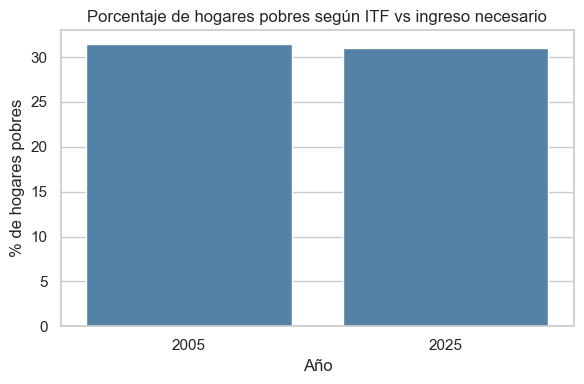

In [40]:
# === 8) Identificación de hogares pobres según ITF e ingreso_necesario ===

# Sanity check
assert {"itf", "ingreso_necesario", "anio"}.issubset(df.columns), "Faltan columnas clave"

# Convertir a numérico
df["itf"] = pd.to_numeric(df["itf"], errors="coerce")
df["ingreso_necesario"] = pd.to_numeric(df["ingreso_necesario"], errors="coerce")

# Crear variable binaria
df["pobre"] = np.where(df["itf"] < df["ingreso_necesario"], 1, 0)

# Resumen por año
res_pobreza = (
    df.groupby("anio", observed=False)
      .agg(
          hogares_pobres=("pobre", "sum"),
          total=("pobre", "count"),
          pct_pobres=("pobre", lambda s: round(100 * s.sum() / s.count(), 1))
      )
)
print("=== Pobreza por año (ITF < ingreso_necesario) ===")
print(res_pobreza, "\n")

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(data=res_pobreza.reset_index(), x="anio", y="pct_pobres", color="steelblue")
plt.title("Porcentaje de hogares pobres según ITF vs ingreso necesario")
plt.xlabel("Año")
plt.ylabel("% de hogares pobres")
plt.tight_layout()
plt.savefig("FIGURAS/pobreza_por_anio.png", dpi=300)
plt.show()


In [41]:
# Verificación adicional: razón ITF / ingreso_necesario
df["ratio_itf_nec"] = df["itf"] / df["ingreso_necesario"]

res_ratio = (
    df.groupby("anio", observed=False)["ratio_itf_nec"]
      .agg(media="mean", mediana="median", p25=lambda s: s.quantile(0.25), p75=lambda s: s.quantile(0.75))
      .round(2)
)
print("=== Razón ITF / ingreso_necesario por año ===")
print(res_ratio)

=== Razón ITF / ingreso_necesario por año ===
      media  mediana   p25   p75
anio                            
2005   2.19     1.52  0.86  2.72
2025   2.08     1.48  0.83  2.63


=== Estadísticas descriptivas relevantes de 'pobre' por año ===
      pct_pobres   media_itf  mediana_itf  media_ad_eq  mediana_ad_eq
anio                                                                 
2005        31.4     1345.52       1000.0         3.57           3.31
2025        31.0  1816290.22    1300000.0         2.78           2.58 



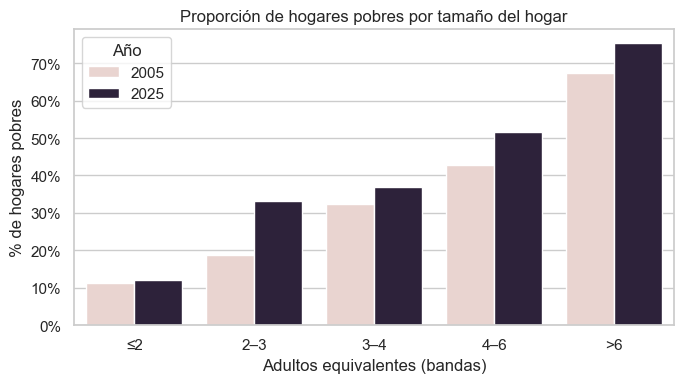

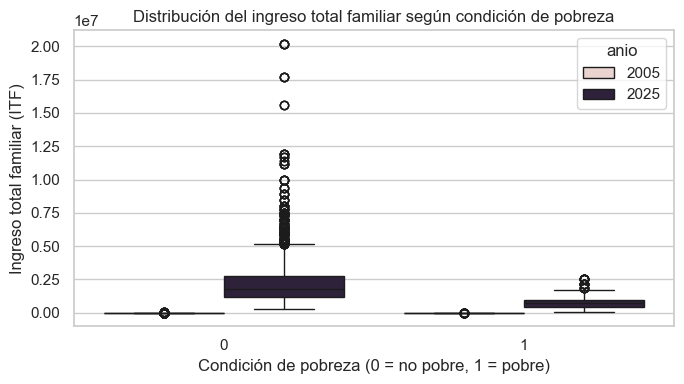

=== % de hogares pobres por tamaño del hogar ===
band_ad_eq    ≤2   2–3   3–4   4–6    >6
anio                                    
2005        11.0  19.0  32.0  43.0  67.0
2025        12.0  33.0  37.0  52.0  75.0


In [42]:
# === 9) Estadísticas descriptivas relevantes de la variable 'pobre' ===

# Tabla descriptiva comparando 2005 vs 2025
desc_pobre = (
    df.groupby("anio", observed=False)
      .agg(
          pct_pobres=("pobre", lambda s: round(100 * s.mean(), 1)),
          media_itf=("itf", "mean"),
          mediana_itf=("itf", "median"),
          media_ad_eq=("ad_equiv_hogar", "mean"),
          mediana_ad_eq=("ad_equiv_hogar", "median")
      )
      .round(2)
)
print("=== Estadísticas descriptivas relevantes de 'pobre' por año ===")
print(desc_pobre, "\n")

# 1️⃣ Gráfico 1: Distribución de pobreza por tamaño del hogar
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x="band_ad_eq", y="pobre", hue="anio", estimator=np.mean, errorbar=None)
plt.title("Proporción de hogares pobres por tamaño del hogar")
plt.xlabel("Adultos equivalentes (bandas)")
plt.ylabel("% de hogares pobres")
plt.legend(title="Año")
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{x*100:.0f}%")
plt.tight_layout()
plt.savefig("FIGURAS/pobreza_por_tamano_hogar.png", dpi=300)
plt.show()

# 2️⃣ Gráfico 2: Boxplot de ITF por condición de pobreza
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x="pobre", y="itf", hue="anio")
plt.title("Distribución del ingreso total familiar según condición de pobreza")
plt.xlabel("Condición de pobreza (0 = no pobre, 1 = pobre)")
plt.ylabel("Ingreso total familiar (ITF)")
plt.tight_layout()
plt.savefig("FIGURAS/box_itf_pobre.png", dpi=300)
plt.show()

# 3️⃣ (Opcional) Verificación numérica rápida de pobreza media por tamaño de hogar
check_band = (
    df.groupby(["anio", "band_ad_eq"], observed=False)["pobre"]
      .mean()
      .unstack()
      .round(2)
)
print("=== % de hogares pobres por tamaño del hogar ===")
print((check_band * 100).fillna(0))

In [43]:
# === COMIENZA TP2: HISTOGRAMAS, KERNELS Y MÉTODOS NO SUPERVISADOS ===

In [44]:
# ===============================================================
# === COMIENZA TP2: HISTOGRAMAS, KERNELS Y MÉTODOS NO SUPERVISADOS ===
# ===============================================================

# En este trabajo se utilizarán las bases de la Encuesta Permanente de Hogares (EPH)
# correspondientes al primer trimestre de:
#  - Año 2005
#  - Año 2025
#
# La base final a trabajar debe incluir las variables limpiadas y unificadas del TP1,
# más las nuevas variables creadas en este TP, de forma homogénea entre 2005 y 2025.

# Objetivos del TP2:
# 1. Continuar la limpieza y homogeneización de la base EPH 2005–2025.
# 2. Crear nuevas variables:
#    - edad2 (edad al cuadrado)
#    - educ (años de educación)
#    - ingreso_total_familiar ajustado a pesos de 2025 (ITF)
#    - horastrab (total de horas trabajadas del jefe del hogar)
# 3. Analizar la distribución de edad e ingreso total familiar:
#    - Histogramas
#    - Distribuciones kernel separando pobres y no pobres
# 4. Elaborar estadísticas descriptivas (media, desvío, min, p50, max) para las nuevas variables
#    y comentar brevemente los resultados.
# 5. Resumir la base final por año mediante una tabla:
#    - Cantidad de observaciones
#    - Observaciones con NA en la variable "pobre"
#    - Cantidad de pobres y no pobres
#    - Cantidad de variables limpias y homogeneizadas
# 6. Aplicar métodos no supervisados con los predictores:
#    edad, edad2, educ, ingreso_total_familiar, tamaño del hogar y horastrab.
#    A. PCA:
#       - Estándarizar las variables
#       - Graficar los scores del 1er y 2do componente
#       - Graficar los loadings (ponderadores) de los componentes
#       - Analizar la proporción de varianza explicada
#    B. Clustering:
#       - k-medias con k = 2, 4 y 10 usando edad e ingreso familiar
#       - Evaluar si k = 2 separa pobres y no pobres
#       - Utilizar el método del codo para elegir el número óptimo de clusters
#       - Cluster jerárquico y dendograma, con breve interpretación
#    C. (Opcional) Cluster k-modes con dummies de la EPH (excepto la variable de pobreza):
#       - Evaluar si k = 2 distingue correctamente pobres y no pobres.
#
# A partir de aquí comienza el desarrollo del TP2 paso a paso.

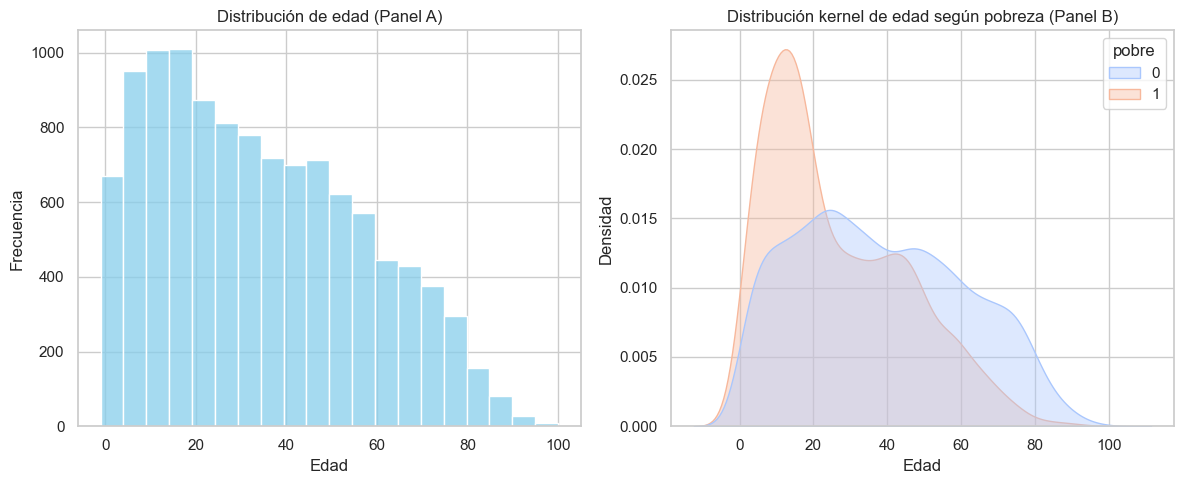

In [45]:
# PARTE I: Creación de variables, histogramas, kernels y resumen de la base de datos final

# PUNTO 1 – Variable edad2 y análisis de distribución

import matplotlib.pyplot as plt
import seaborn as sns

# Crear variable edad al cuadrado
df["edad2"] = df["ch06"] ** 2

# === Gráficos Panel A y Panel B ===
plt.figure(figsize=(12,5))

# Panel A: Histograma de edad
plt.subplot(1,2,1)
sns.histplot(df["ch06"], bins=20, color="skyblue", kde=False)
plt.title("Distribución de edad (Panel A)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Panel B: Densidades kernel de edad según pobreza
plt.subplot(1,2,2)
sns.kdeplot(data=df, x="ch06", hue="pobre", fill=True, common_norm=False, palette="coolwarm", alpha=0.4)
plt.title("Distribución kernel de edad según pobreza (Panel B)")
plt.xlabel("Edad")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

In [46]:
# PUNTO 2: Antes de mapear, normalizá los textos a minúsculas y quitar espacios
df["nivel_ed"] = df["nivel_ed"].astype(str).str.lower().str.strip()

In [47]:
# Diccionario correcto (con minúsculas y variantes)
mapa_educ = {
    "sin instrucción": 0,
    "primaria incompleta (incluye educación especial)": 3,
    "primaria completa": 6,
    "secundaria incompleta": 9,
    "secundaria completa": 12,
    "superior universitaria incompleta": 15,
    "superior universitaria completa": 16,
    # valores numéricos (para 2005)
    "1": 0,
    "2": 3,
    "3": 6,
    "4": 9,
    "5": 12,
    "6": 15,
    "7": 16
}

In [48]:
# Aplicar y revisar
df["educ"] = df["nivel_ed"].map(mapa_educ)
df["educ"].describe().round(2)

count    11352.00
mean         7.77
std          4.87
min          0.00
25%          3.00
50%          6.00
75%         12.00
max         16.00
Name: educ, dtype: float64

In [49]:
# Verificar si queda algo sin mapear
df[df["educ"].isna()]["nivel_ed"].value_counts()

Series([], Name: count, dtype: int64)

In [50]:
df["pobre"].value_counts(dropna=False)

pobre
0    7808
1    3544
Name: count, dtype: int64

In [51]:
df[["educ", "pobre"]].groupby("educ")["pobre"].mean()

educ
0     0.436211
3     0.398813
6     0.361694
9     0.343585
12    0.181634
15    0.109943
16    0.198804
Name: pobre, dtype: float64

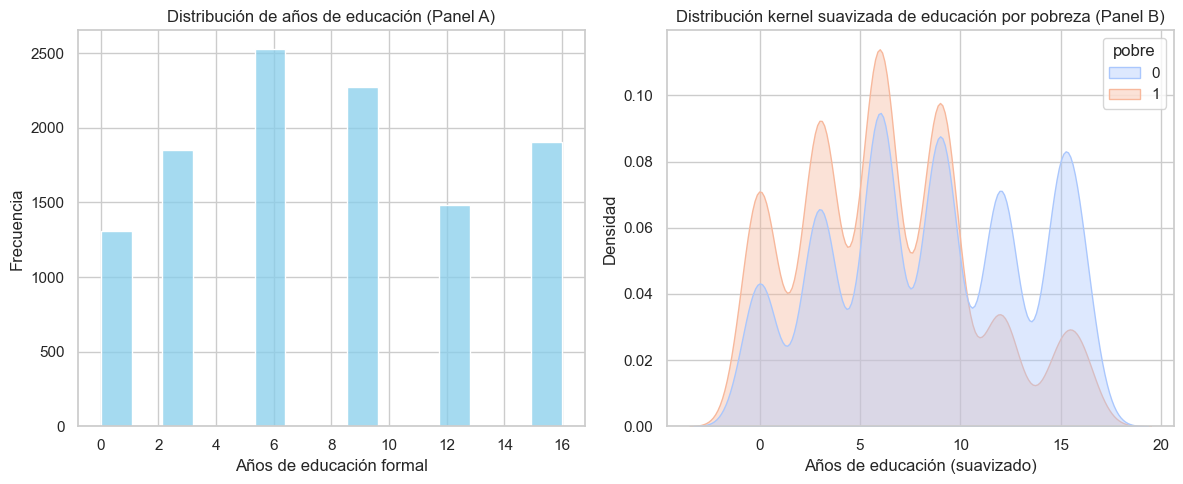

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una versión suavizada
df["educ_jitter"] = df["educ"] + np.random.normal(0, 0.3, size=len(df))

plt.figure(figsize=(12,5))

# Panel A
plt.subplot(1,2,1)
sns.histplot(df["educ"], bins=15, color="skyblue", kde=False)
plt.title("Distribución de años de educación (Panel A)")
plt.xlabel("Años de educación formal")
plt.ylabel("Frecuencia")

# Panel B
plt.subplot(1,2,2)
sns.kdeplot(data=df, x="educ_jitter", hue="pobre", fill=True,
            common_norm=False, palette="coolwarm", alpha=0.4)
plt.title("Distribución kernel suavizada de educación por pobreza (Panel B)")
plt.xlabel("Años de educación (suavizado)")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

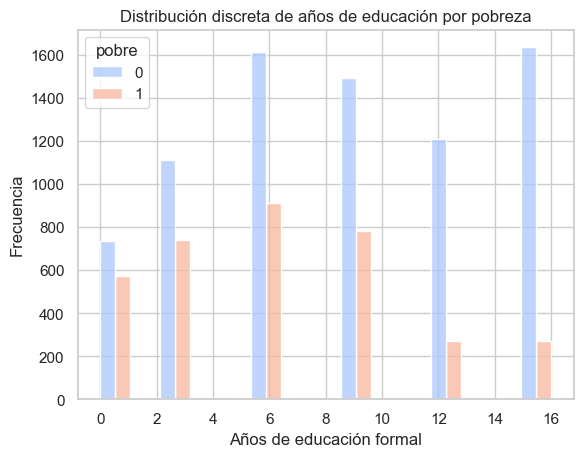

In [53]:
sns.histplot(data=df, x="educ", hue="pobre", multiple="dodge", bins=15, palette="coolwarm")
plt.title("Distribución discreta de años de educación por pobreza")
plt.xlabel("Años de educación formal")
plt.ylabel("Frecuencia")
plt.show()

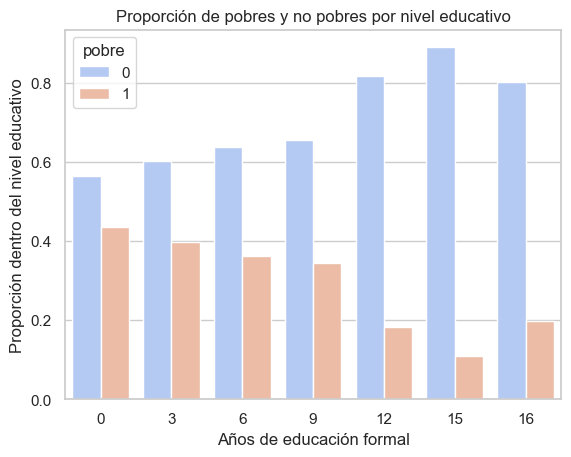

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# calcular proporción de pobres por nivel educativo
tabla = (
    df.groupby("educ")["pobre"]
    .value_counts(normalize=True)
    .rename("proporcion")
    .reset_index()
)

sns.barplot(data=tabla, x="educ", y="proporcion", hue="pobre", palette="coolwarm")
plt.title("Proporción de pobres y no pobres por nivel educativo")
plt.xlabel("Años de educación formal")
plt.ylabel("Proporción dentro del nivel educativo")
plt.show()

In [55]:
# Comentario – Distribución de años de educación

# En el Panel A, la distribución de años de educación muestra una concentración en los niveles primario y secundario, 
# con picos en torno a los 6 y 12 años, lo que refleja la estructura educativa predominante en la población analizada.

# En el Panel B, las curvas de densidad revelan una clara brecha educativa entre pobres y no pobres. 
# Los hogares pobres presentan mayor densidad en los niveles de escolaridad baja (0–6 años), mientras que los no pobres se concentran en niveles 
# más altos de educación formal (12 años o más).

# Esta evidencia sugiere una fuerte asociación entre educación y condición socioeconómica, donde el capital educativo actúa como un determinante 
# clave del bienestar y la reducción de la pobreza.

In [56]:
# PUNTO 3 – Actualización y análisis del ingreso total familiar

# Factor de actualización 2005→2025
factor_ipc_2005_2025 = 309.3

df["ingreso_total_familiar_2025"] = np.where(
    df["anio"] == 2005,
    df["itf"] * factor_ipc_2005_2025,  # actualizar pesos 2005
    df["itf"]                        # ya está en pesos 2025
)

In [57]:
df.groupby("anio")["ingreso_total_familiar_2025"].describe().round(2)

count        mean         std      min       25%        50%        75%  \
anio                                                                            
2005  7043.0   416168.05   550615.47   3093.0  185580.0   309300.0   516221.7   
2025  4309.0  1816290.22  1794736.42  40000.0  751000.0  1300000.0  2200000.0   

             max  
anio              
2005  16099065.0  
2025  20180000.0

In [58]:
# Línea de pobreza (del TP1)

linea_pobreza_2025 = 365_177  # valor del TP1

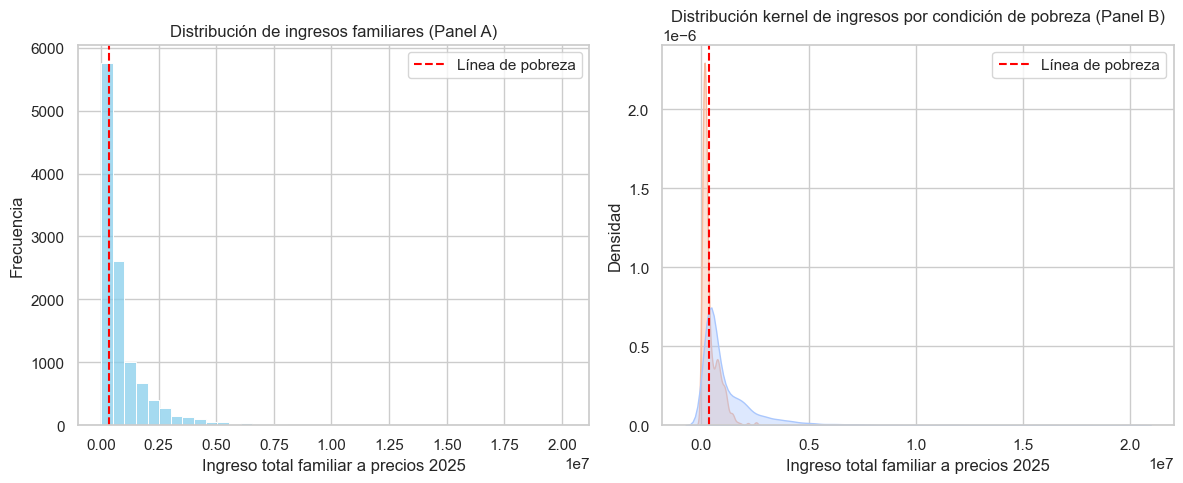

In [59]:
# Gráficos Panel A y Panel B

import seaborn as sns
import matplotlib.pyplot as plt

linea_pobreza = 365_177  # Línea de pobreza según TP1 (pesos 2025)

plt.figure(figsize=(12,5))

# Panel A: Histograma
plt.subplot(1,2,1)
sns.histplot(df["ingreso_total_familiar_2025"], bins=40, color="skyblue", kde=False)
plt.axvline(linea_pobreza, color="red", linestyle="--", label="Línea de pobreza")
plt.title("Distribución de ingresos familiares (Panel A)")
plt.xlabel("Ingreso total familiar a precios 2025")
plt.ylabel("Frecuencia")
plt.legend()

# Panel B: Densidades kernel según pobreza
plt.subplot(1,2,2)
sns.kdeplot(data=df, x="ingreso_total_familiar_2025", hue="pobre", fill=True,
            common_norm=False, palette="coolwarm", alpha=0.4)
plt.axvline(linea_pobreza, color="red", linestyle="--", label="Línea de pobreza")
plt.title("Distribución kernel de ingresos por condición de pobreza (Panel B)")
plt.xlabel("Ingreso total familiar a precios 2025")
plt.ylabel("Densidad")
plt.legend()

plt.tight_layout()
plt.show()

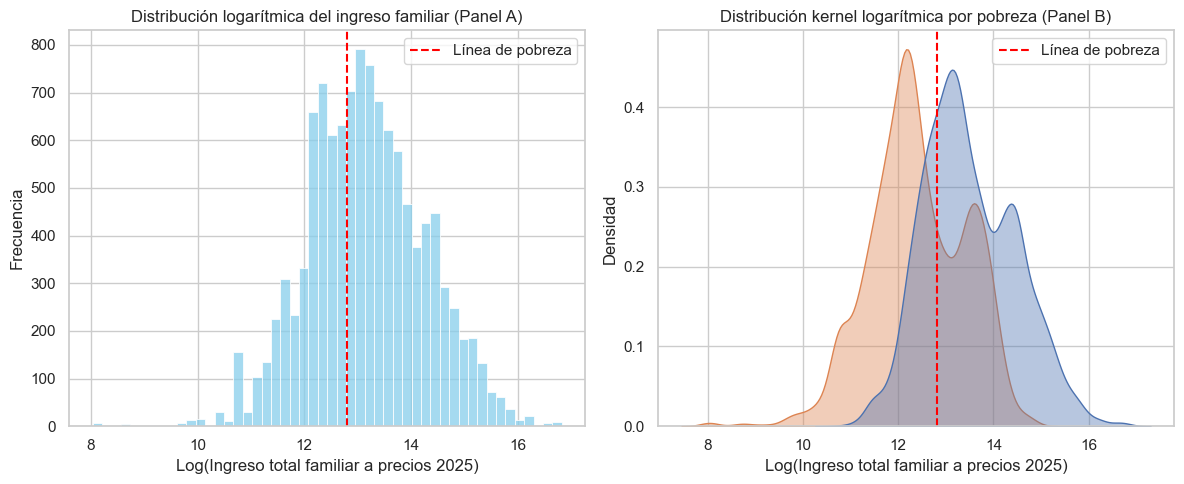

In [60]:
plt.figure(figsize=(12,5))

# Panel A
plt.subplot(1,2,1)
sns.histplot(np.log(df["ingreso_total_familiar_2025"]+1), bins=50, color="skyblue")
plt.axvline(np.log(linea_pobreza+1), color="red", linestyle="--", label="Línea de pobreza")
plt.title("Distribución logarítmica del ingreso familiar (Panel A)")
plt.xlabel("Log(Ingreso total familiar a precios 2025)")
plt.ylabel("Frecuencia")
plt.legend()

# Panel B
plt.subplot(1,2,2)
sns.kdeplot(
    data=df,
    x=np.log(df["ingreso_total_familiar_2025"]+1),
    hue="pobre",
    fill=True,
    common_norm=False,
    alpha=0.4
)
plt.axvline(np.log(linea_pobreza+1), color="red", linestyle="--", label="Línea de pobreza")
plt.title("Distribución kernel logarítmica por pobreza (Panel B)")
plt.xlabel("Log(Ingreso total familiar a precios 2025)")
plt.ylabel("Densidad")
plt.legend()

plt.tight_layout()
plt.show()

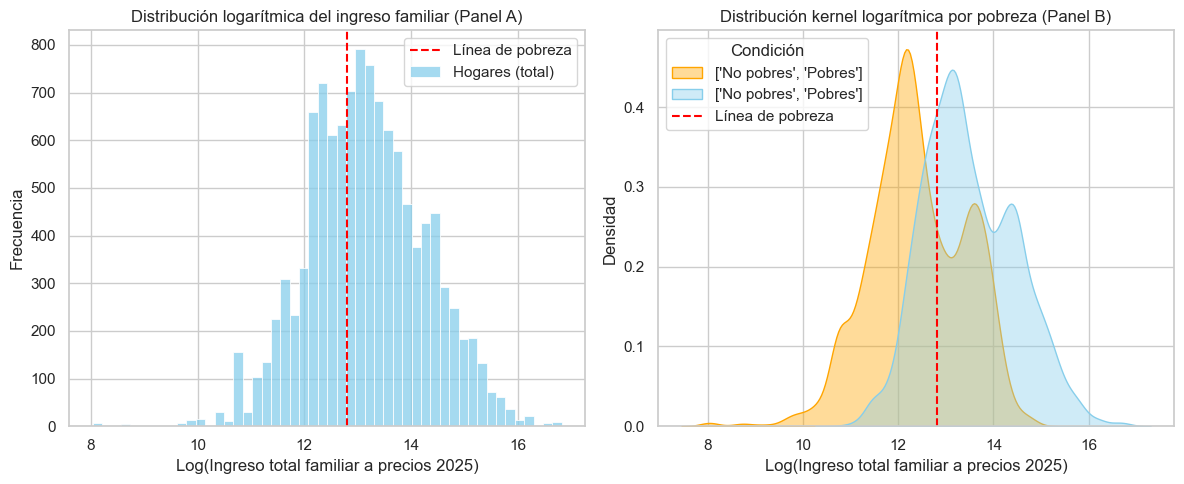

In [61]:
plt.figure(figsize=(12,5))

# Panel A
plt.subplot(1,2,1)
sns.histplot(np.log(df["ingreso_total_familiar_2025"] + 1), bins=50, color="skyblue", label="Hogares (total)")
plt.axvline(np.log(linea_pobreza + 1), color="red", linestyle="--", label="Línea de pobreza")
plt.title("Distribución logarítmica del ingreso familiar (Panel A)")
plt.xlabel("Log(Ingreso total familiar a precios 2025)")
plt.ylabel("Frecuencia")
plt.legend()

# Panel B
plt.subplot(1,2,2)
sns.kdeplot(
    data=df,
    x=np.log(df["ingreso_total_familiar_2025"] + 1),
    hue="pobre",
    fill=True,
    common_norm=False,
    palette={0: "skyblue", 1: "orange"},
    alpha=0.4,
    label=["No pobres", "Pobres"]
)
plt.axvline(np.log(linea_pobreza + 1), color="red", linestyle="--", label="Línea de pobreza")
plt.title("Distribución kernel logarítmica por pobreza (Panel B)")
plt.xlabel("Log(Ingreso total familiar a precios 2025)")
plt.ylabel("Densidad")
plt.legend(title="Condición")
plt.tight_layout()
plt.show()

In [62]:
df["itf_por_ae"] = df["ingreso_total_familiar_2025"] / df["ad_equiv_hogar"]
linea_cbteq = 365_177  # misma unidad

In [63]:
# % de pobres con ingreso > línea roja única (no individual)
pct_pobres_sobre_linea = (df.loc[df.pobre==1, "ingreso_total_familiar_2025"] > 365_177).mean()

# % de no pobres con ingreso < línea roja única
pct_nopobres_bajo_linea = (df.loc[df.pobre==0, "ingreso_total_familiar_2025"] < 365_177).mean()

In [64]:
# Mostrar resultados en porcentaje
print(f"% de pobres con ingreso > línea roja única: {pct_pobres_sobre_linea*100:.2f}%")
print(f"% de no pobres con ingreso < línea roja única: {pct_nopobres_bajo_linea*100:.2f}%")
# % de pobres con ingreso > línea roja única: 33.58%
# % de no pobres con ingreso < línea roja única: 25.69%

% de pobres con ingreso > línea roja única: 33.58%
% de no pobres con ingreso < línea roja única: 25.69%


In [65]:
pct_pobres = (df["pobre"] == 1).mean() * 100
print(f"Tasa de pobreza estimada: {pct_pobres:.2f}%")


Tasa de pobreza estimada: 31.22%


In [66]:
(df["ingreso_total_familiar_2025"] < 365_177).mean() * 100

# Al utilizar una línea de pobreza promedio (CBT ≈ 365 177 $ 2025) sobre el ingreso total familiar, la tasa de pobreza estimada asciende al 38 %.
# Sin embargo, el valor oficial derivado de la variable pobre, que ajusta por tamaño y composición del hogar, es del 31 %.
# La diferencia refleja la importancia de considerar las escalas de equivalencia y líneas específicas por hogar, ya que una línea única 
# tiende a sobrestimar la incidencia de la pobreza.

np.float64(38.40732910500353)

In [67]:
# PUNTO 4 - Cálculo y análisis de las horas trabajadas por el jefe del hogar
# Ver todas las columnas del DataFrame
df.columns

Index(['pp07j', 'pp07g2', 'ch03', 'decifr', 'pp08j1', 'pp10a', 'pp04b1',
       'ch08', 'pp02i', 'pp04a',
       ...
       'ad_equiv_hogar_w', 'band_ad_eq', 'check_cbt', 'pobre', 'ratio_itf_nec',
       'edad2', 'educ', 'educ_jitter', 'ingreso_total_familiar_2025',
       'itf_por_ae'],
      dtype='object', length=185)

In [68]:
# pp3e_tot = Total de horas trabajadas en la semana en la ocupación principal
# pp3f_tot = Total de horas trabajadas en la semana en otras ocupaciones
[col for col in df.columns if "pp3" in col]

['pp3e_tot', 'pp3f_tot']

In [69]:
# Verifiquemos si pp3e_tot y pp3f_tot son realmente numéricas
df[["pp3e_tot", "pp3f_tot"]].dtypes

pp3e_tot    float64
pp3f_tot    float64
dtype: object

In [70]:
# Revisamos que ch03 (jefe del hogar) también sea numérica
df["ch03"].value_counts(dropna=False)

ch03
Hijo/Hijastro       3025
Jefe                2021
1                   1662
3                   1520
Cónyuge/Pareja      1322
2                    812
Nieto                304
5                    133
Yerno/Nuera           94
Otros familiares      82
Madre/Padre           68
Hermano               66
8                     52
6                     50
Suegro                38
9                     29
4                     29
No familiares         23
10                    13
7                      9
Name: count, dtype: int64

In [71]:
# Normalizar etiquetas a texto uniforme
df["ch03"] = df["ch03"].astype(str).str.strip().str.lower()

# Convertir las etiquetas textuales a su código correspondiente
mapa_ch03 = {
    "jefe": 1,
    "jefe/a": 1,
    "cónyuge/pareja": 2,
    "conyuge/pareja": 2,
    "hijo/hijastro": 3,
    "hijo/a/hijastro/a": 3,
    "yerno/nuera": 4,
    "nieto": 5,
    "madre/padre": 6,
    "suegro": 7,
    "hermano": 8,
    "otros familiares": 9,
    "no familiares": 10
}

df["ch03"] = df["ch03"].replace(mapa_ch03)

# Convertir finalmente a numérico
df["ch03"] = pd.to_numeric(df["ch03"], errors="coerce")

In [72]:
# ============================================================
# Punto 4 – Cálculo y análisis de las horas trabajadas del jefe/a de hogar
# ============================================================

# 1️⃣ Crear variable total de horas trabajadas (principal + secundaria)
df["horastrab"] = df["pp3e_tot"].fillna(0) + df["pp3f_tot"].fillna(0)

# 2️⃣ Filtrar solo jefes/as de hogar
df_jefe = df[df["ch03"] == 1].copy()

# 3️⃣ Eliminar valores atípicos (fuera del rango razonable)
df_jefe = df_jefe[df_jefe["horastrab"].between(0, 100)]

# 4️⃣ Estadísticas descriptivas
resumen_horas = df_jefe["horastrab"].describe(percentiles=[0.5]).round(2)
print(resumen_horas)

count    3661.00
mean       26.03
std        25.26
min         0.00
50%        24.00
max        99.00
Name: horastrab, dtype: float64


In [73]:
# Punto 5 – Resumen de la base final por año y total

# 1️⃣ Crear función auxiliar para generar los indicadores
def resumen_base(df, year):
    df_year = df[df["anio"] == year]
    return {
        "Año": year,
        "Cantidad observaciones": len(df_year),
        "Observaciones con NA en 'pobre'": df_year["pobre"].isna().sum(),
        "Cantidad de Pobres": (df_year["pobre"] == 1).sum(),
        "Cantidad de No Pobres": (df_year["pobre"] == 0).sum(),
        "Cantidad de variables": df_year.shape[1]
    }

# 2️⃣ Aplicar para cada año y total
resumen_2005 = resumen_base(df, 2005)
resumen_2025 = resumen_base(df, 2025)
resumen_total = {
    "Año": "Total",
    "Cantidad observaciones": len(df),
    "Observaciones con NA en 'pobre'": df["pobre"].isna().sum(),
    "Cantidad de Pobres": (df["pobre"] == 1).sum(),
    "Cantidad de No Pobres": (df["pobre"] == 0).sum(),
    "Cantidad de variables": df.shape[1]
}

# 3️⃣ Combinar en DataFrame resumen
import pandas as pd
tabla_resumen = pd.DataFrame([resumen_2005, resumen_2025, resumen_total])
print(tabla_resumen)


     Año  Cantidad observaciones  Observaciones con NA en 'pobre'  \
0   2005                    7043                                0   
1   2025                    4309                                0   
2  Total                   11352                                0   

   Cantidad de Pobres  Cantidad de No Pobres  Cantidad de variables  
0                2210                   4833                    186  
1                1334                   2975                    186  
2                3544                   7808                    186  


In [74]:
# Punto 5 – Resumen de la base final por año y total

import pandas as pd

# 1️⃣ Función auxiliar para resumir por año
def resumen_base(df, year):
    df_year = df[df["anio"] == year]
    return {
        "Año": year,
        "Cantidad observaciones": len(df_year),
        "Observaciones con NA en 'pobre'": df_year["pobre"].isna().sum(),
        "Cantidad de Pobres": (df_year["pobre"] == 1).sum(),
        "Cantidad de No Pobres": (df_year["pobre"] == 0).sum(),
        "Cantidad de variables": df_year.shape[1]
    }

# 2️⃣ Calcular resumen para 2005 y 2025
resumen_2005 = resumen_base(df, 2005)
resumen_2025 = resumen_base(df, 2025)

# 3️⃣ Resumen total (todas las observaciones)
resumen_total = {
    "Año": "Total",
    "Cantidad observaciones": len(df),
    "Observaciones con NA en 'pobre'": df["pobre"].isna().sum(),
    "Cantidad de Pobres": (df["pobre"] == 1).sum(),
    "Cantidad de No Pobres": (df["pobre"] == 0).sum(),
    "Cantidad de variables": df.shape[1]
}

# 4️⃣ Combinar todo en un DataFrame y mostrar
tabla_resumen = pd.DataFrame([resumen_2005, resumen_2025, resumen_total])

# Mostrar tabla completa con formato
display(tabla_resumen)


Año  Cantidad observaciones  Observaciones con NA en 'pobre'  \
0   2005                    7043                                0   
1   2025                    4309                                0   
2  Total                   11352                                0   

   Cantidad de Pobres  Cantidad de No Pobres  Cantidad de variables  
0                2210                   4833                    186  
1                1334                   2975                    186  
2                3544                   7808                    186

In [75]:
# PARTE II – MÉTODOS NO SUPERVISADOS

In [76]:
# Ver las columnas disponibles
df.columns.tolist()

['pp07j',
 'pp07g2',
 'ch03',
 'decifr',
 'pp08j1',
 'pp10a',
 'pp04b1',
 'ch08',
 'pp02i',
 'pp04a',
 'pp07k',
 'ch14',
 'pp02c8',
 'v18_m',
 'pp10e',
 'pp03h',
 'pp05b2_dia',
 'pp11p',
 'pp05b2_ano',
 'pp11r',
 'pp02c2',
 'ch15_cod',
 'pp11b2_ano',
 'adecocur',
 'decindr',
 'pp04b3_dia',
 'p21',
 'v9_m',
 'ch12',
 'pp08j3',
 'nivel_ed',
 'pp03j',
 'pp11g_ano',
 'pp02c7',
 'pp05c_3',
 'gdecindr',
 'pp05e',
 'pp11t',
 'ch07',
 'rdecindr',
 'cat_ocup',
 'pp07i',
 'pp07f5',
 'adecifr',
 'region',
 'pp11a',
 'pp11q',
 'pp09b',
 'pp11n',
 'ideccfr',
 'ch16_cod',
 'pp09a',
 'v19_am',
 'pp07g3',
 'pdeccfr',
 'nro_hogar',
 'pp05c_2',
 'pp02c5',
 'pp07f4',
 'pp05b2_mes',
 'pp05f',
 'pp03c',
 'pp08f2',
 'pdecocur',
 'rdecocur',
 'pp06a',
 'pp04c',
 'pp02h',
 'pp07f3',
 'pp03g',
 'ano4',
 'ch11',
 'itf',
 'pp02e',
 'pdecifr',
 'pp05h',
 'pp08d4',
 'pp08f1',
 'tot_p12',
 'pp11g_mes',
 'deccfr',
 'pp03d',
 'idecocur',
 'mas_500',
 'pp09a_esp',
 'pp07a',
 'pp07f1',
 'pp3e_tot',
 'pp11b2_mes',
 'pp0

In [77]:
[c for c in df.columns if "itf" in c.lower()]

['itf', 'ratio_itf_nec', 'itf_por_ae']

In [78]:
# verificar qué columnas realmente existen en el df
print(df.columns.tolist())

['pp07j', 'pp07g2', 'ch03', 'decifr', 'pp08j1', 'pp10a', 'pp04b1', 'ch08', 'pp02i', 'pp04a', 'pp07k', 'ch14', 'pp02c8', 'v18_m', 'pp10e', 'pp03h', 'pp05b2_dia', 'pp11p', 'pp05b2_ano', 'pp11r', 'pp02c2', 'ch15_cod', 'pp11b2_ano', 'adecocur', 'decindr', 'pp04b3_dia', 'p21', 'v9_m', 'ch12', 'pp08j3', 'nivel_ed', 'pp03j', 'pp11g_ano', 'pp02c7', 'pp05c_3', 'gdecindr', 'pp05e', 'pp11t', 'ch07', 'rdecindr', 'cat_ocup', 'pp07i', 'pp07f5', 'adecifr', 'region', 'pp11a', 'pp11q', 'pp09b', 'pp11n', 'ideccfr', 'ch16_cod', 'pp09a', 'v19_am', 'pp07g3', 'pdeccfr', 'nro_hogar', 'pp05c_2', 'pp02c5', 'pp07f4', 'pp05b2_mes', 'pp05f', 'pp03c', 'pp08f2', 'pdecocur', 'rdecocur', 'pp06a', 'pp04c', 'pp02h', 'pp07f3', 'pp03g', 'ano4', 'ch11', 'itf', 'pp02e', 'pdecifr', 'pp05h', 'pp08d4', 'pp08f1', 'tot_p12', 'pp11g_mes', 'deccfr', 'pp03d', 'idecocur', 'mas_500', 'pp09a_esp', 'pp07a', 'pp07f1', 'pp3e_tot', 'pp11b2_mes', 'pp03i', 'intensi', 'pp08d1', 'gdecocur', 'gdecifr', 'pp04d_cod', 'v4_m', 'h15', 'cat_inac', 

In [79]:
# === Variables para análisis Parte II ===

# Crear variable edad a partir de CH06 (en años cumplidos)
# Se asegura compatibilidad con ambas bases (2005 y 2025)
if 'ch06' in df.columns:
    df['edad'] = pd.to_numeric(df['ch06'], errors='coerce')

# Crear variable edad^2 (edad al cuadrado)
df['edad2'] = df['edad'] ** 2

# Variables a utilizar en el análisis
vars_analisis = [
    'edad',
    'edad2',
    'educ',
    'itf_por_ae',       # ingreso familiar ajustado por adulto equivalente
    'ad_equiv_hogar',
    'horastrab'
]

# Selección, limpieza y transformación
import pandas as pd

X = (
    df[vars_analisis]
    .copy()
    .apply(pd.to_numeric, errors='coerce')     # convierte todo a numérico
    .dropna(subset=vars_analisis)              # elimina filas con NA
)

print("✅ Variables creadas y preparadas correctamente:")
print(X.head())

✅ Variables creadas y preparadas correctamente:
   edad   edad2  educ     itf_por_ae  ad_equiv_hogar  horastrab
0  76.0  5776.0     3  470332.380952            0.63        0.0
1  36.0  1296.0     6   38502.074689            2.41       26.0
2  14.0   196.0     3   38502.074689            2.41        0.0
3   8.0    64.0     3   38502.074689            2.41        0.0
4  52.0  2704.0    12   61355.706522            3.68       36.0


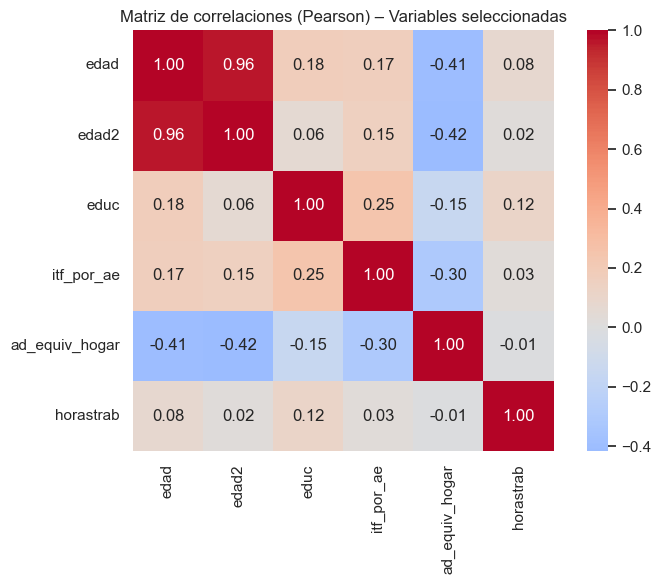

In [80]:
# Matriz de correlaciones Pearson
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Matriz de correlaciones (Pearson) – Variables seleccionadas")
plt.tight_layout()
plt.show()

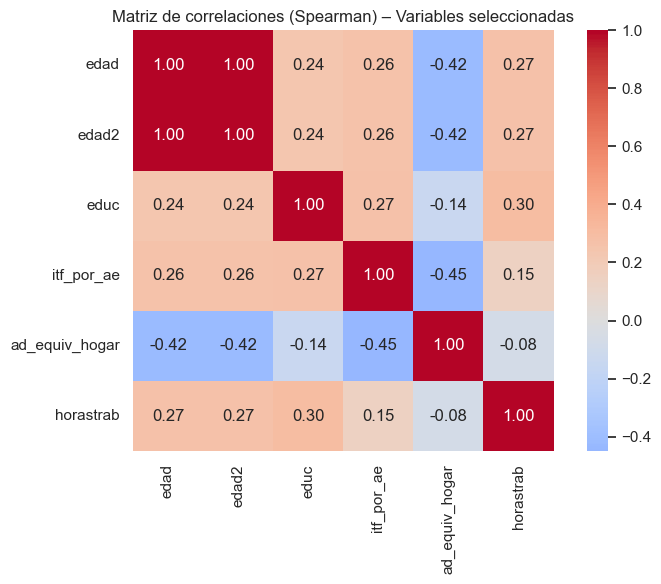

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Matriz de correlaciones Spearman ===
corr_spearman = X.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Matriz de correlaciones (Spearman) – Variables seleccionadas")
plt.tight_layout()
plt.show()

In [82]:
# PUNTO A.2.
# Preparación de datos y estandarización

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables para PCA
vars_analisis = ['edad','edad2','educ','itf_por_ae','ad_equiv_hogar','horastrab']
X = df[vars_analisis].copy().apply(pd.to_numeric, errors='coerce').dropna()

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
# Aplicar PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
var_exp = pca.explained_variance_ratio_ * 100
pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(var_exp))],
    'Varianza Explicada (%)': var_exp.round(2),
    'Varianza Acumulada (%)': var_exp.cumsum().round(2)
})

Componente  Varianza Explicada (%)  Varianza Acumulada (%)
0        PC1                   39.71                   39.71
1        PC2                   19.99                   59.70
2        PC3                   16.75                   76.46
3        PC4                   12.79                   89.25
4        PC5                   10.26                   99.51
5        PC6                    0.49                  100.00

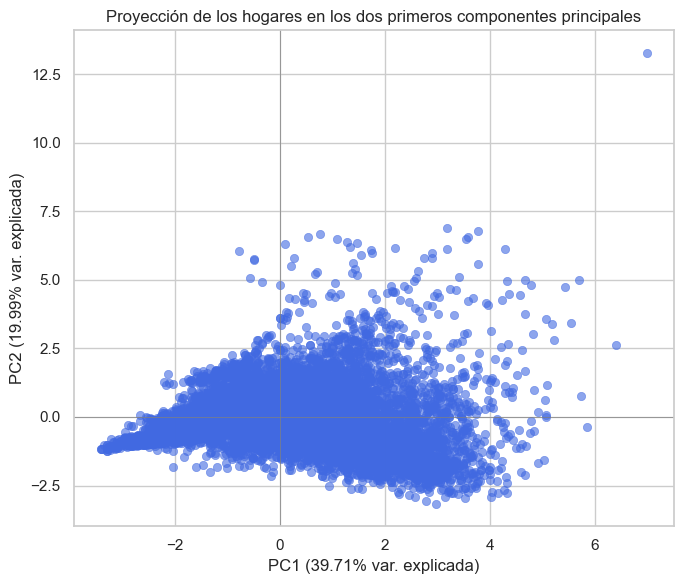

In [84]:
# Gráfico de dispersión (scores PC1 vs PC2)
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.6, color="royalblue", edgecolor=None)
plt.title("Proyección de los hogares en los dos primeros componentes principales")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% var. explicada)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% var. explicada)")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.tight_layout()
plt.show()

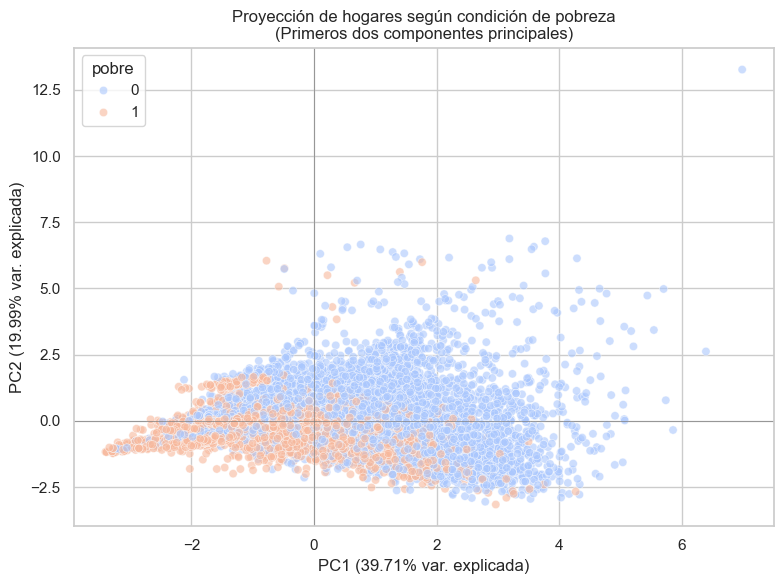

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df.loc[X.index, "pobre"],
    palette="coolwarm",
    alpha=0.6
)

plt.title("Proyección de hogares según condición de pobreza\n(Primeros dos componentes principales)")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% var. explicada)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% var. explicada)")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.legend(title="pobre", loc="upper left")
plt.tight_layout()
plt.show()

In [86]:
# Cargas factoriales (loadings): Estas muestran cuánto pesa cada variable original en cada componente
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=vars_analisis
)
loadings.round(3)

PC1    PC2    PC3    PC4    PC5    PC6
edad            0.596 -0.247  0.152  0.178  0.177  0.706
edad2           0.583 -0.337  0.097  0.089  0.190 -0.702
educ            0.203  0.640  0.033  0.714 -0.174 -0.091
itf_por_ae      0.269  0.545 -0.385 -0.408  0.562  0.009
ad_equiv_hogar -0.433 -0.107  0.248  0.392  0.766 -0.016
horastrab       0.066  0.328  0.870 -0.360 -0.015 -0.033

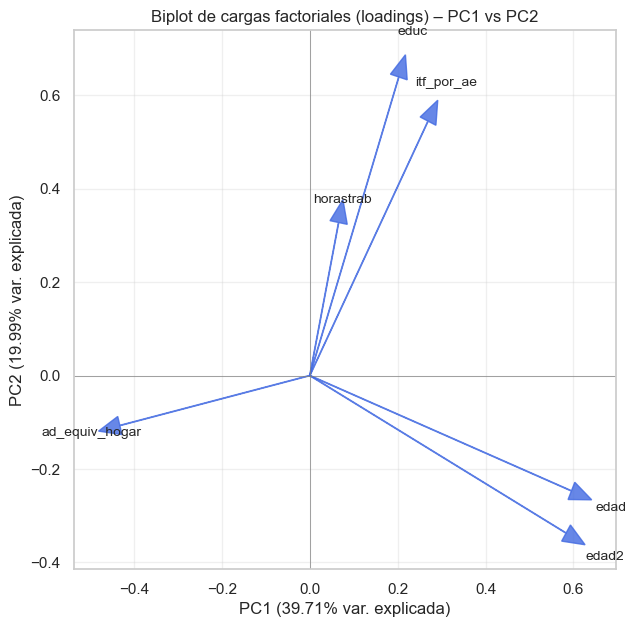

In [87]:
# PUNTO A.3.: CÓDIGO PARA EL GRÁFICO DE LOADINGS (BIPLOT)
import matplotlib.pyplot as plt

# Cargar los loadings de los dos primeros componentes
loadings_2d = loadings[['PC1', 'PC2']]

plt.figure(figsize=(7,7))
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

# Dibujar flechas desde el origen hasta cada punto (loading)
for i, var in enumerate(loadings_2d.index):
    x = loadings_2d.PC1.iloc[i]
    y = loadings_2d.PC2.iloc[i]
    plt.arrow(0, 0, x, y, color='royalblue', alpha=0.8,
              head_width=0.04, head_length=0.05)
    plt.text(x*1.15, y*1.15, var, fontsize=10, ha='center', va='center')

plt.title("Biplot de cargas factoriales (loadings) – PC1 vs PC2")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% var. explicada)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% var. explicada)")
plt.grid(alpha=0.3)
plt.show()

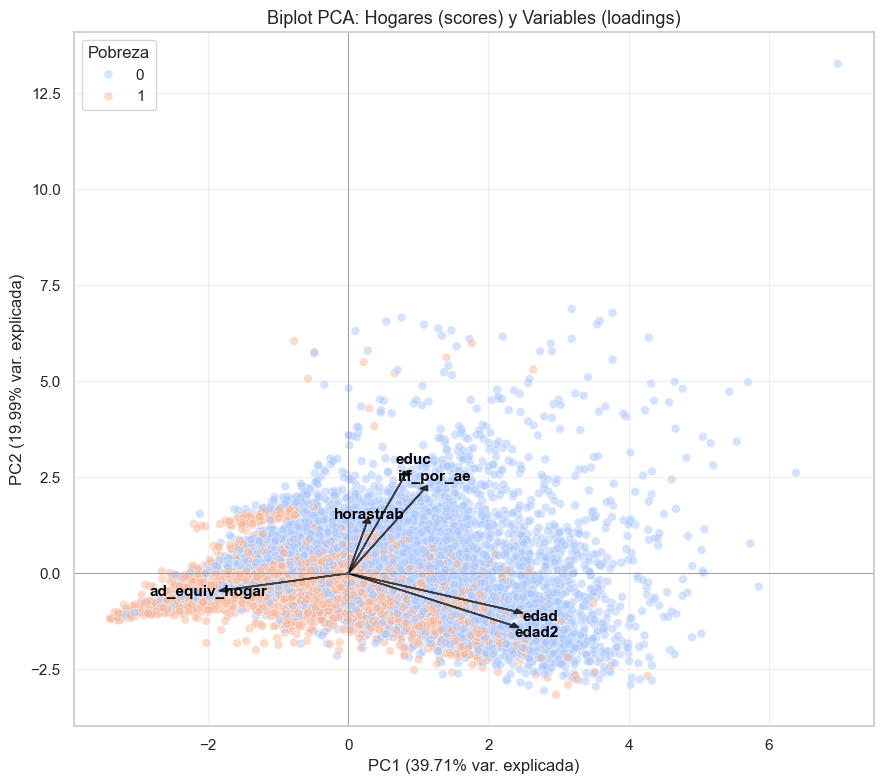

In [88]:
# Código completo para el Biplot combinado (Scores + Loadings)

import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura
plt.figure(figsize=(9,8))

# --- 1️⃣ Graficar los hogares (scores) ---
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df.loc[X.index, "pobre"],
    palette="coolwarm",
    alpha=0.5,
    s=40
)

# --- 2️⃣ Añadir los vectores de las variables (loadings) ---
scale = 4  # escala visual para que las flechas sean visibles en el plano

for i, var in enumerate(loadings.index):
    x = loadings.loc[var, "PC1"] * scale
    y = loadings.loc[var, "PC2"] * scale
    plt.arrow(0, 0, x, y, color='black', alpha=0.7, 
              head_width=0.12, head_length=0.12, linewidth=1.2)
    plt.text(x*1.15, y*1.15, var, color='black', fontsize=11,
             ha='center', va='center', weight='bold')

# --- 3️⃣ Ajustes del gráfico ---
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.title("Biplot PCA: Hogares (scores) y Variables (loadings)", fontsize=13)
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% var. explicada)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% var. explicada)")
plt.legend(title="Pobreza", loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

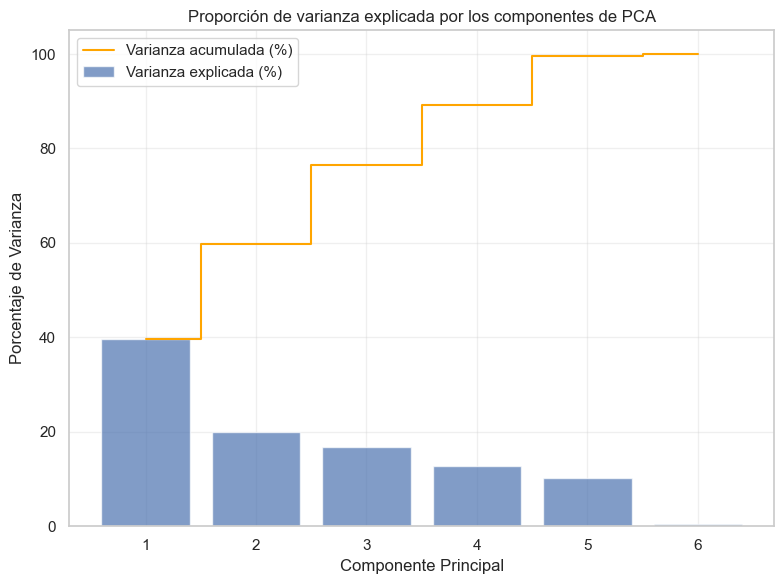

In [89]:
# PUNTO A.4.: Código para el gráfico de varianza explicada

import matplotlib.pyplot as plt
import numpy as np

# Vector de varianzas explicadas
var_exp = pca.explained_variance_ratio_ * 100
var_acum = np.cumsum(var_exp)

plt.figure(figsize=(8,6))
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.7, align='center',
        label='Varianza explicada (%)')
plt.step(range(1, len(var_acum)+1), var_acum, where='mid',
         label='Varianza acumulada (%)', color='orange')

plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Varianza')
plt.title('Proporción de varianza explicada por los componentes de PCA')
plt.xticks(range(1, len(var_exp)+1))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [90]:
# PUNTO B.5.A. : Análisis de Clustering con K-means.
# Preparación de los datos

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables
X_cluster = df[['edad', 'itf_por_ae']].dropna()

# Escalado opcional (recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

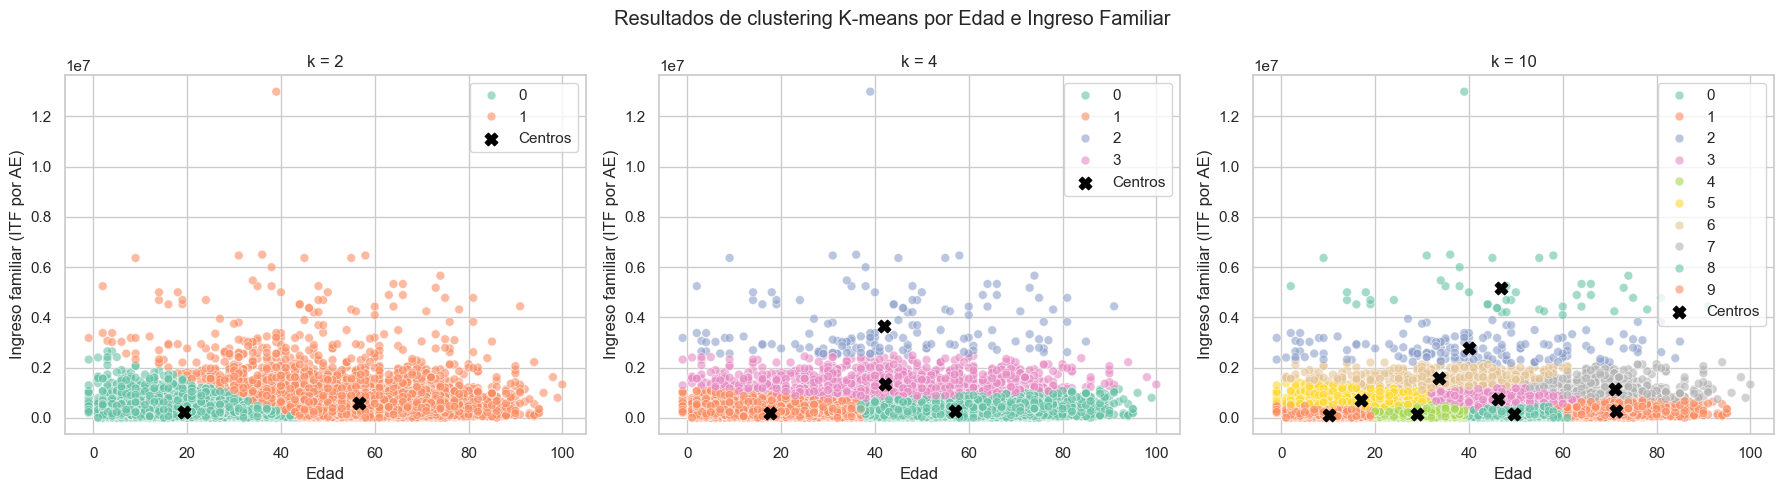

In [91]:
# Correr el algoritmo con distintos valores de k
# Configurar valores de k y n_init
k_values = [2, 4, 10]
n_init = 20

fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    sns.scatterplot(
        x=X_cluster['edad'], y=X_cluster['itf_por_ae'],
        hue=clusters, palette='Set2', ax=axes[i], alpha=0.6, s=40
    )
    axes[i].scatter(
        scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
        scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
        c='black', s=80, marker='X', label='Centros'
    )
    axes[i].set_title(f'k = {k}')
    axes[i].set_xlabel('Edad')
    axes[i].set_ylabel('Ingreso familiar (ITF por AE)')
    axes[i].legend()

plt.suptitle('Resultados de clustering K-means por Edad e Ingreso Familiar')
plt.tight_layout()
plt.show()

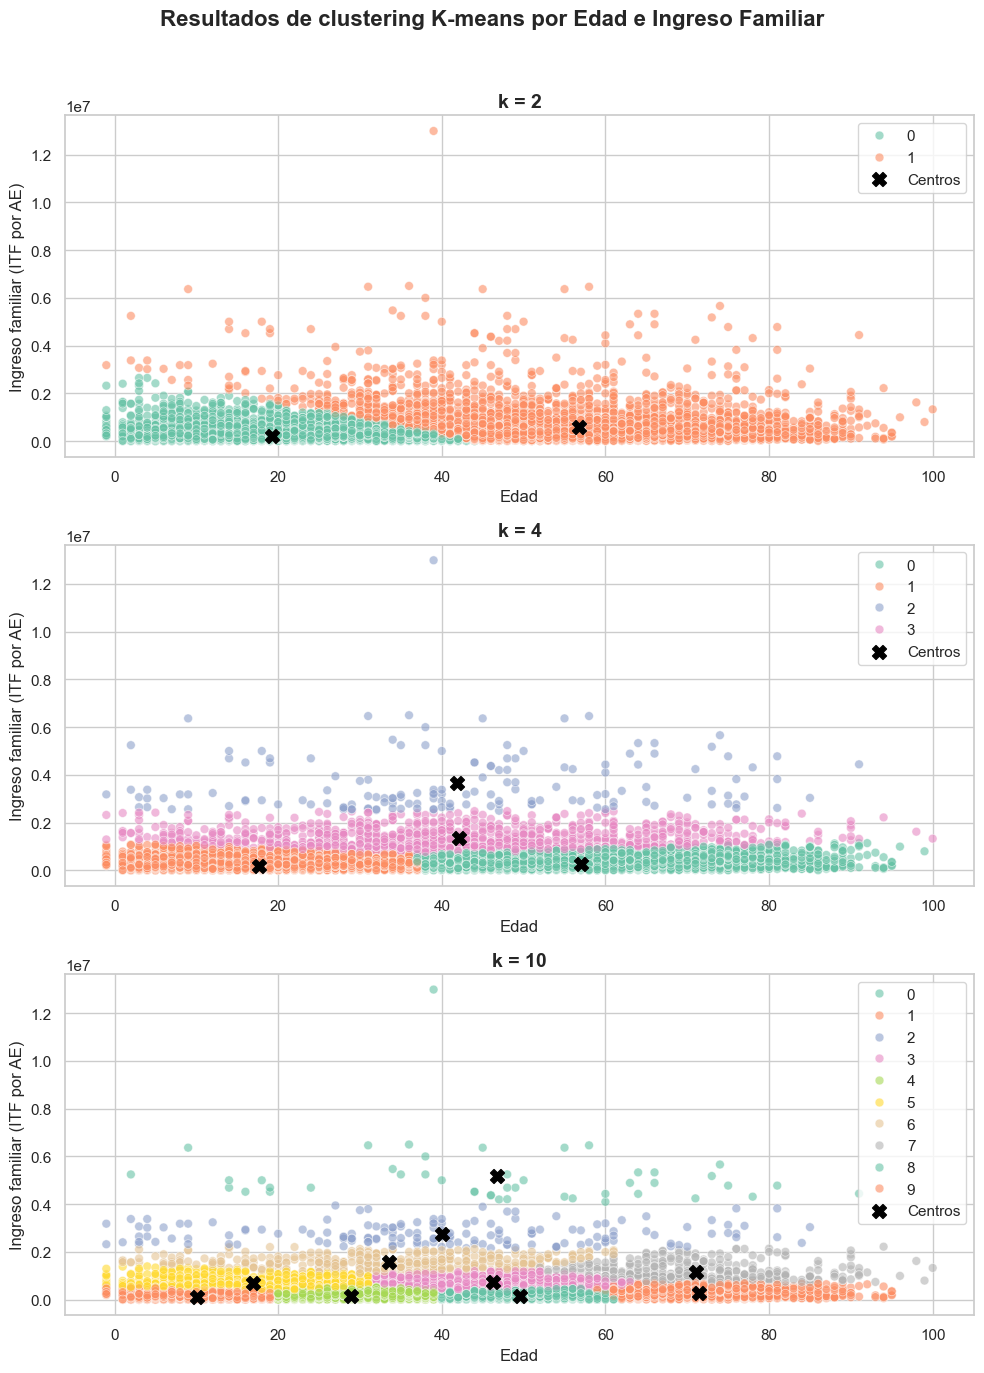

In [92]:
# Resultados de clustering K-means (vertical)

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de valores
k_values = [2, 4, 10]
n_init = 20

# Crear 3 gráficos en disposición vertical (3 filas, 1 columna)
fig, axes = plt.subplots(3, 1, figsize=(10, 14))  # más alto que ancho

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Gráfico de dispersión con los clusters
    sns.scatterplot(
        x=X_cluster['edad'], y=X_cluster['itf_por_ae'],
        hue=clusters, palette='Set2', ax=axes[i], alpha=0.6, s=40
    )
    
    # Añadir los centros de los clusters (revertimos el escalado)
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    axes[i].scatter(
        centers[:, 0], centers[:, 1],
        c='black', s=100, marker='X', label='Centros'
    )
    
    # Títulos y etiquetas
    axes[i].set_title(f'k = {k}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Edad')
    axes[i].set_ylabel('Ingreso familiar (ITF por AE)')
    axes[i].legend()

# Título general
plt.suptitle('Resultados de clustering K-means por Edad e Ingreso Familiar', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

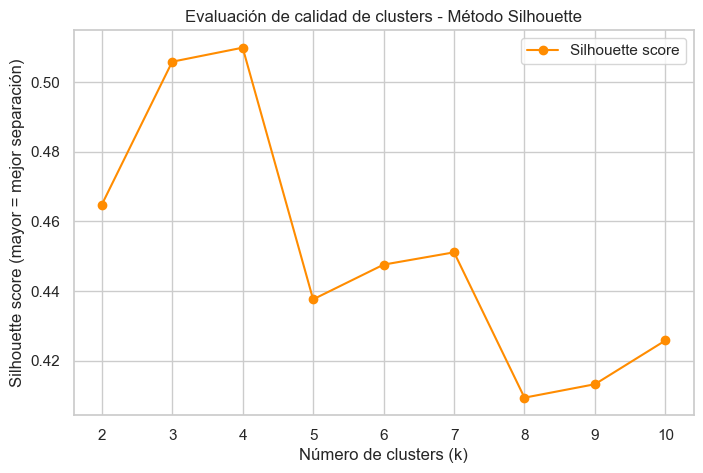


Distribución porcentual de pobreza por cluster (k=2):

cluster_k2      0      1
pobre                   
0           51.09  48.91
1           78.05  21.95

Pureza aproximada del clustering (k=2): 64.57%


Resumen descriptivo por cluster:

                edad               itf_por_ae                  
                mean median count        mean      median count
cluster_final                                                  
0              57.07   55.0  4027   269437.01   184656.72  4027
1              17.64   17.0  5995   196448.96   122252.96  5995
2              41.90   40.0   150  3652295.15  3184713.38   150
3              42.04   42.0  1067  1343805.60  1240000.00  1067


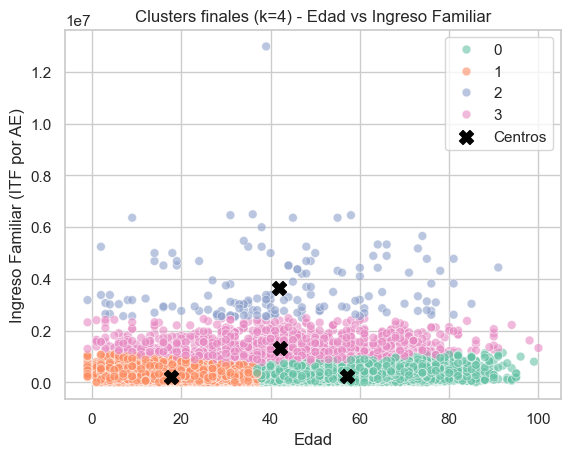

In [93]:
# ===============================================================
# Evaluación práctica del clustering K-means (con método Silhouette)
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Selección y preprocesamiento ---
# Usamos las variables edad e ingreso familiar ajustado por AE
X_cluster = df[['edad', 'itf_por_ae', 'pobre']].dropna().copy()

# Escalado (por magnitudes distintas)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster[['edad', 'itf_por_ae']])

# --- 2. Evaluación de calidad mediante Silhouette ---
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Gráfico del método Silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'o-', color='darkorange', label='Silhouette score')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette score (mayor = mejor separación)')
plt.title('Evaluación de calidad de clusters - Método Silhouette')
plt.legend()
plt.show()

# --- 3. Clustering con k=2 (comparación con pobreza) ---
kmeans2 = KMeans(n_clusters=2, n_init=20, random_state=42)
X_cluster['cluster_k2'] = kmeans2.fit_predict(X_scaled)

# Tabla cruzada pobreza–cluster
tabla = pd.crosstab(X_cluster['pobre'], X_cluster['cluster_k2'], normalize='index') * 100
print("\nDistribución porcentual de pobreza por cluster (k=2):\n")
print(tabla.round(2))

# "Pureza" aproximada (mayor proporción diagonal = mejor separación)
pureza = np.mean(np.max(tabla.values, axis=1))
print(f"\nPureza aproximada del clustering (k=2): {pureza:.2f}%\n")

# --- 4. Clustering final con k óptimo (por ejemplo, 4) ---
k_optimo = 4
kmeans_final = KMeans(n_clusters=k_optimo, n_init=20, random_state=42)
X_cluster['cluster_final'] = kmeans_final.fit_predict(X_scaled)

# --- 5. Resumen descriptivo ---
resumen = X_cluster.groupby('cluster_final')[['edad', 'itf_por_ae']].agg(['mean', 'median', 'count'])
print("\nResumen descriptivo por cluster:\n")
print(resumen.round(2))

# --- 6. Visualización final ---
sns.scatterplot(
    x='edad', y='itf_por_ae', hue='cluster_final', data=X_cluster,
    palette='Set2', alpha=0.6, s=40
)
plt.scatter(
    scaler.inverse_transform(kmeans_final.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans_final.cluster_centers_)[:, 1],
    c='black', s=100, marker='X', label='Centros'
)
plt.title(f'Clusters finales (k={k_optimo}) - Edad vs Ingreso Familiar')
plt.xlabel('Edad')
plt.ylabel('Ingreso Familiar (ITF por AE)')
plt.legend()
plt.show()

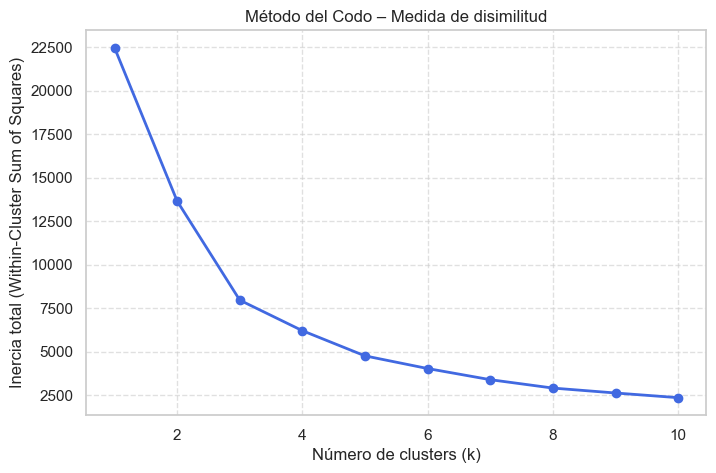

In [94]:
# PUNTO B.5.b.: Método del Codo y Análisis de Disimilitud

# B.5.a - Análisis de disimilitud y número óptimo de clusters

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Selección de variables relevantes
X_cluster = df[['edad', 'itf_por_ae']].dropna()

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 2️⃣ Cálculo de la inercia (WSS) para distintos k
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 3️⃣ Gráfico del método del codo
plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, 'o-', color='royalblue', lw=2)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia total (Within-Cluster Sum of Squares)')
plt.title('Método del Codo – Medida de disimilitud')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

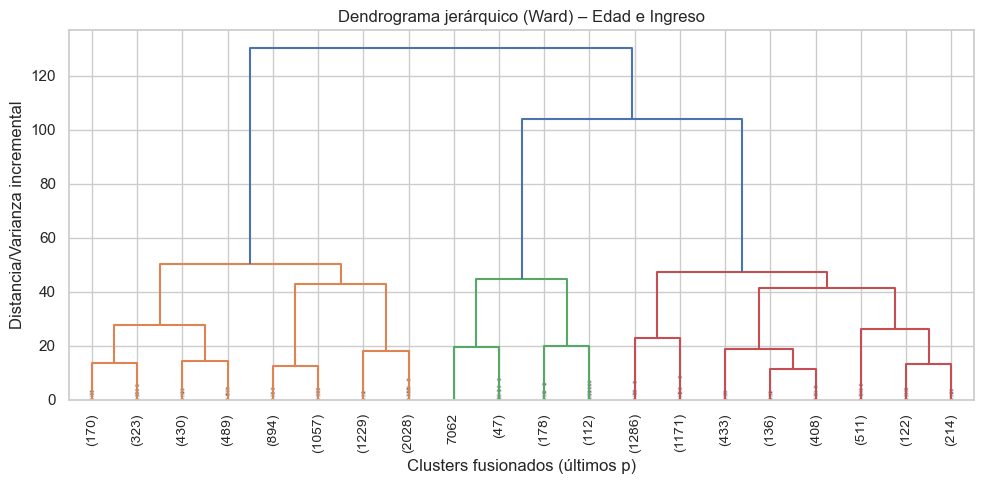

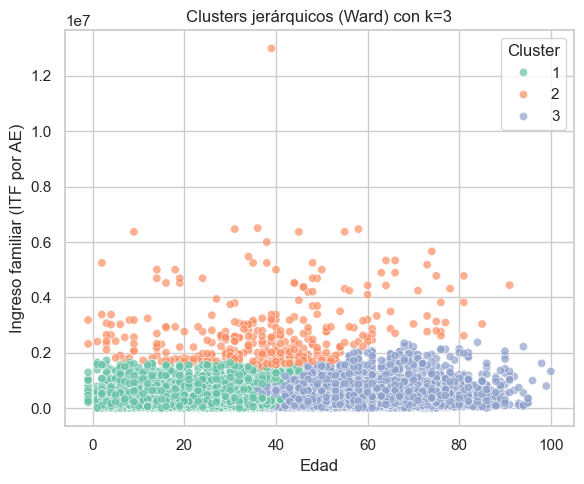

In [95]:
# PUNTO B.6.: Cluster Jerárquico

# === B.6: Clustering jerárquico (edad, itf_por_ae) ===
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1) Datos y estandarización
X_h = df[['edad','itf_por_ae']].dropna()
scaler = StandardScaler()
Zdata = scaler.fit_transform(X_h)

# 2) Enlace jerárquico (Ward con distancia euclídea)
Z = linkage(Zdata, method='ward', metric='euclidean')

# 3) Dendrograma (truncado para legibilidad)
plt.figure(figsize=(10,5))
dend = dendrogram(
    Z,
    truncate_mode='lastp',  # muestra solo los últimos p merges (clusters más grandes)
    p=20,                   # cambia p si querés más/menos detalle
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True,
    color_threshold=None
)
plt.title('Dendrograma jerárquico (Ward) – Edad e Ingreso')
plt.xlabel('Clusters fusionados (últimos p)')
plt.ylabel('Distancia/Varianza incremental')
plt.tight_layout()
plt.show()

# 4) (Opcional) Cortar el árbol para obtener k clusters (por ejemplo k=3)
k = 3
labels_h = fcluster(Z, t=k, criterion='maxclust')
X_h_plot = X_h.copy()
X_h_plot['cluster_h'] = labels_h

# 5) (Opcional) Dispersión para visualizar esos clusters
import seaborn as sns
plt.figure(figsize=(6,5))
sns.scatterplot(data=X_h_plot, x='edad', y='itf_por_ae', hue='cluster_h', palette='Set2', alpha=0.7)
plt.title(f'Clusters jerárquicos (Ward) con k={k}')
plt.xlabel('Edad'); plt.ylabel('Ingreso familiar (ITF por AE)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

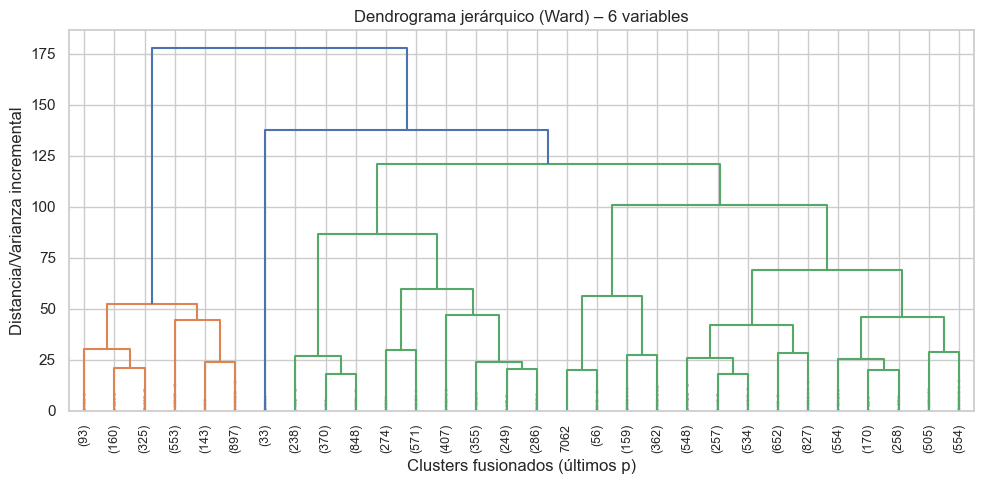

In [96]:
# Variante con las 6 variables del PCA

# === Jerárquico con 6 variables ===
vars6 = ['edad','edad2','educ','itf_por_ae','ad_equiv_hogar','horastrab']
X6 = df[vars6].dropna()
Z6data = StandardScaler().fit_transform(X6)

Z6 = linkage(Z6data, method='ward')  # ward usa euclídea por defecto

plt.figure(figsize=(10,5))
dendrogram(Z6, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=9, show_contracted=True)
plt.title('Dendrograma jerárquico (Ward) – 6 variables')
plt.xlabel('Clusters fusionados (últimos p)'); plt.ylabel('Distancia/Varianza incremental')
plt.tight_layout(); plt.show()

# Cortar en k=4 (ejemplo)
labels6 = fcluster(Z6, t=4, criterion='maxclust')

In [97]:
# vista general del DataFrame

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11352 entries, 0 to 11351
Columns: 187 entries, pp07j to edad
dtypes: category(1), float64(62), int64(13), object(111)
memory usage: 16.1+ MB


pp07j pp07g2  ch03  decifr  pp08j1 pp10a pp04b1                        ch08  \
0   0.0    0.0     1       6     0.0   0.0    0.0  Obra social (incluye PAMI)   
1   0.0    0.0     1       2     0.0   0.0    2.0    No paga ni le descuentan   
2   0.0    0.0     3       2     0.0   0.0    0.0    No paga ni le descuentan   

  pp02i        pp04a  ... check_cbt pobre ratio_itf_nec   edad2 educ  \
0    No          0.0  ...      0.63     0      7.415199  5776.0    3   
1   0.0  ...privada?  ...      2.41     1      0.607019  1296.0    6   
2    No          0.0  ...      2.41     1      0.607019   196.0    3   

  educ_jitter  ingreso_total_familiar_2025     itf_por_ae  horastrab  edad  
0    3.022561                     296309.4  470332.380952        0.0  76.0  
1    5.918842                      92790.0   38502.074689       26.0  36.0  
2    3.169296                      92790.0   38502.074689        0.0  14.0  

[3 rows x 187 columns]

In [98]:
# 1. Ver cuántas variables categóricas / dummies hay
df.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Revisar si algunas de esas son binarias (dummies)
for col in df.select_dtypes(include=['object', 'category']).columns[:10]:
    print(col, df[col].unique()[:5])

# 3. Confirmar que 'pobre' sea binaria
df['pobre'].value_counts()

pp07j ['0.0' '...de día? (mañana/tarde)' '...de noche'
 '...de otro tipo? (rotativo, día y noche, guardias con franco' 'Ns./Nr.']
pp07g2 ['0.0' 'No' 'Sí' '1.0' nan]
pp10a ['0.0' '...más de 1 año?' '...de 1 a 3 meses?' '...menos de 1 mes?'
 '...más de 6 a 12 meses?']
pp04b1 ['0.0' '2.0' 'Casa de familia' nan '1.0']
ch08 ['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Planes y seguros públicos']
pp02i ['No' '0.0' 'Sí' '0' '2']
pp04a ['0.0' '...privada?' '...estatal?' 'Ns./Nr.'
 '...de otro tipo? (especificar)']
pp07k ['0.0' '...le dan recibo con sello/membrete/firma del empleador?'
 '...no le dan ni entrega nada?' '...le dan un papel/recibo sin nada?'
 'Ns./Nr.']
ch14 ['03' '  ' '00' '07' '05']
pp02c8 ['0.0' 'No' 'Sí' '0' '2']


pobre
0    7808
1    3544
Name: count, dtype: int64


>>> K=2: terminado. Inercia (costo): 147466.00

>>> K=4: terminado. Inercia (costo): 127470.00

>>> K=10: terminado. Inercia (costo): 103805.00

Distribución de pobreza por cluster (k=2):

pobre           0      1
cluster_k2              
0           0.690  0.310
1           0.686  0.314


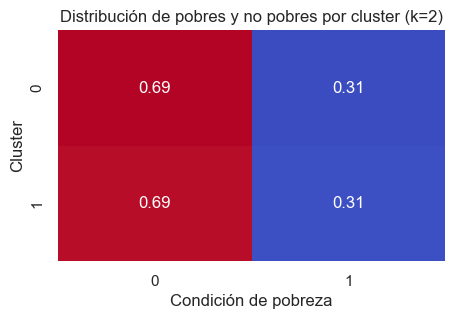

In [99]:
# ===============================================================
# Punto B.7 – Cluster K-Modes con variables dummies de la EPH
# ===============================================================

!pip install kmodes --quiet

from kmodes.kmodes import KModes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Selección de variables categóricas (dummies)
# Excluir variable objetivo 'pobre'
vars_cat = df.select_dtypes(include=['object', 'category']).columns.tolist()
X = df[vars_cat].copy()

# --- 2. Limpieza y preparación ---
# Eliminar columnas con demasiados valores nulos (más del 10%)
X = X.dropna(axis=1, thresh=len(X)*0.9)

# Convertir todas las variables a string y reemplazar faltantes
X = X.astype(str).fillna('Desconocido')

# --- 3. Aplicar cluster K-Modes con k = 2, 4 y 10 ---
kmodes_results = {}
for k in [2, 4, 10]:
    km = KModes(n_clusters=k, init='Huang', n_init=20, verbose=0, random_state=123)
    clusters = km.fit_predict(X)
    kmodes_results[k] = clusters
    print(f"\n>>> K={k}: terminado. Inercia (costo): {km.cost_:.2f}")

# --- 4. Evaluar separación entre pobres y no pobres (k=2) ---
df['cluster_k2'] = kmodes_results[2]
ct = pd.crosstab(df['cluster_k2'], df['pobre'], normalize='index').round(3)

print("\nDistribución de pobreza por cluster (k=2):\n")
print(ct)

# --- 5. Visualización opcional: mapa de calor ---
plt.figure(figsize=(5, 3))
sns.heatmap(ct, annot=True, cmap="coolwarm", cbar=False)
plt.title("Distribución de pobres y no pobres por cluster (k=2)")
plt.xlabel("Condición de pobreza")
plt.ylabel("Cluster")
plt.show()

In [100]:
# ============================================================
# === COMIENZA TP3: MODELOS SUPERVISADOS (LOGIT Y KNN) ===
# ============================================================

# En este trabajo se utilizarán las bases finales generadas en el TP2:
#  - respondieron_2005.csv
#  - respondieron_2025.csv
#  - norespondieron_2005.csv
#  - norespondieron_2025.csv
#
# Objetivos del TP3:
#  1. Construir una base unificada con variable objetivo (respondió / no respondió).
#  2. Seleccionar un conjunto de predictores socioeconómicos y demográficos.
#  3. Estimar un modelo LOGIT y evaluar significancia y odds ratios.
#  4. Estimar un modelo KNN con métricas de desempeño.
#  5. Comparar ambos enfoques: interpretación vs performance.
#  6. Elaborar gráficos, matrices de confusión y análisis final.
#
# A partir de aquí comienza el desarrollo del TP3 paso a paso.

In [101]:
# ============================================================
# === BLOQUE 1: CARGA DE BASES DEL TP3 DESDE DISCO LOCAL ===
# ============================================================

import pandas as pd

# Paths absolutos (Windows)
resp05  = pd.read_csv(r"C:\Users\julla\Downloads\Datos\BASES_TP3\respondieron_2005.csv", low_memory=False)
resp25  = pd.read_csv(r"C:\Users\julla\Downloads\Datos\BASES_TP3\respondieron_2025.csv", low_memory=False)
nresp05 = pd.read_csv(r"C:\Users\julla\Downloads\Datos\BASES_TP3\norespondieron_2005.csv", low_memory=False)
nresp25 = pd.read_csv(r"C:\Users\julla\Downloads\Datos\BASES_TP3\norespondieron_2025.csv", low_memory=False)

print("Bases cargadas correctamente:")
print("respondieron_2005:", resp05.shape)
print("respondieron_2025:", resp25.shape)
print("norespondieron_2005:", nresp05.shape)
print("norespondieron_2025:", nresp25.shape)

Bases cargadas correctamente:
respondieron_2005: (7043, 174)
respondieron_2025: (4309, 174)
norespondieron_2005: (101, 169)
norespondieron_2025: (2872, 169)


In [102]:
# ============================================================
# === INSPECCIÓN DE LAS BASES CARGADAS (BLOQUE DE VALIDACIÓN)
# ============================================================

def inspeccionar(df, nombre):
    print("\n==========================================")
    print(f"   📌 {nombre}")
    print("==========================================")
    print("\nPrimeras filas (head):")
    display(df.head())

    print("\nÚltimas filas (tail):")
    display(df.tail())

    print("\nDimensiones:", df.shape)

    print("\nNombres de columnas:")
    print(list(df.columns))

    print("\nTipos de datos:")
    print(df.dtypes)

    print("\nValores faltantes por columna:")
    print(df.isna().sum())

    print("\nDistribución por año (si existe 'anio'):")
    if "anio" in df.columns:
        print(df["anio"].value_counts())
    else:
        print("La columna 'anio' no está en esta base.")


# Ejecutar inspección para cada base
inspeccionar(resp05, "respondieron_2005")
inspeccionar(resp25, "respondieron_2025")
inspeccionar(nresp05, "norespondieron_2005")
inspeccionar(nresp25, "norespondieron_2025")


   📌 respondieron_2005

Primeras filas (head):


pp11m  v19_am     ch11 pp02h pp07e pp07f2  pp05b2_mes               pp05c_3  \
0   0.0     0.0      0.0    No   0.0    0.0         0.0                   0.0   
1   0.0     0.0      0.0   0.0   0.0    0.0         0.0              No tiene   
2   0.0     0.0  Público    No   0.0    0.0         0.0                   0.0   
3   0.0     0.0  Público   0.0   0.0    0.0         0.0                   0.0   
4   0.0     0.0      0.0   0.0   0.0    0.0         0.0  Propio (del negocio)   

   pp06d                                          pp09a_esp  ... pp07f5  \
0    0.0                                                ...  ...    0.0   
1    0.0                                                ...  ...    0.0   
2    0.0                                                ...  ...    0.0   
3    0.0                                                ...  ...    0.0   
4    0.0                                                ...  ...    0.0   

     p21                                              pp04g pp11c99  anio  \
0    0.0                                                0.0     0.0  2005   
1  150.0                                   En esta vivienda     0.0  2005   
2    0.0                                                0.0     0.0  2005   
3    0.0                                                0.0     0.0  2005   
4  700.0  En vehículo para transporte de personas y merc...     0.0  2005   

   adulto_equiv      id_hogar  ad_equiv_hogar  cbt_equiv  ingreso_necesario  
0          0.63  125047  _1.0            0.63     205.07           129.1941  
1          0.77  125049  _1.0            2.41     205.07           494.2187  
2          0.96  125049  _1.0            2.41     205.07           494.2187  
3          0.68  125049  _1.0            2.41     205.07           494.2187  
4          1.00  125138  _1.0            3.68     205.07           754.6576  

[5 rows x 174 columns]


Últimas filas (tail):


pp11m  v19_am     ch11 pp02h pp07e pp07f2  pp05b2_mes   pp05c_3  pp06d  \
7038   0.0     0.0      0.0    No   0.0    0.0         0.0       0.0    0.0   
7039   0.0     0.0      0.0   0.0   0.0     No         0.0       0.0    0.0   
7040   0.0     0.0      0.0   0.0   0.0    0.0         0.0  No tiene    0.0   
7041   0.0     0.0      0.0    No   0.0    0.0         0.0       0.0    0.0   
7042   0.0     0.0  Público    No   0.0    0.0         0.0       0.0    0.0   

                                              pp09a_esp  ... pp07f5    p21  \
7038                                                ...  ...    0.0    0.0   
7039                                                ...  ...     Si  700.0   
7040                                                ...  ...    0.0  100.0   
7041                                                ...  ...    0.0    0.0   
7042                                                ...  ...    0.0    0.0   

                                                  pp04g pp11c99  anio  \
7038                                                0.0     0.0  2005   
7039  En un local/oficina/establecimiento/negocio/ta...     0.0  2005   
7040                                      En otro lugar     0.0  2005   
7041                                                0.0     0.0  2005   
7042                                                0.0     0.0  2005   

      adulto_equiv      id_hogar  ad_equiv_hogar  cbt_equiv  ingreso_necesario  
7038          0.67  288150  _1.0            1.41     205.07           289.1487  
7039          1.00  288167  _1.0            3.29     205.07           674.6803  
7040          0.77  288167  _1.0            3.29     205.07           674.6803  
7041          0.76  288167  _1.0            3.29     205.07           674.6803  
7042          0.76  288167  _1.0            3.29     205.07           674.6803  

[5 rows x 174 columns]


Dimensiones: (7043, 174)

Nombres de columnas:
['pp11m', 'v19_am', 'ch11', 'pp02h', 'pp07e', 'pp07f2', 'pp05b2_mes', 'pp05c_3', 'pp06d', 'pp09a_esp', 'pp06a', 'pp07g2', 'pp11b2_dia', 'pp04b1', 'pp03g', 'pp05b2_dia', 'v9_m', 'pp3e_tot', 'rdecindr', 'gdeccfr', 'pp06e', 'nro_hogar', 'pp09b', 'pp11o', 'p47t', 'pondera', 'pp07d', 'pp10d', 'pp02c6', 'ch09', 'ch12', 'pp05e', 'pp11a', 'cat_inac', 'h15', 'estado', 'pp04b_cod', 'v18_m', 'pp11c', 'pp06c', 'pp07f1', 'pp02c5', 'pp03c', 'pp07i', 'pp11q', 'pp10e', 'gdecocur', 'rdecifr', 'pp08d1', 'ideccfr', 'pp04a', 'pp06h', 'componente', 'pp07g3', 'pdecifr', 'decindr', 'ch06', 'ch16', 'ch08', 'pp04d_cod', 'pp02c3', 'ch03', 'pp07h', 't_vi', 'pp04b3_mes', 'rdecocur', 'itf', 'ipcf', 'pp02c1', 'pp02c4', 'ch15', 'pp07g1', 'pp02c2', 'region', 'intensi', 'aglomerado', 'nivel_ed', 'decocur', 'pp11g_ano', 'pp04b3_ano', 'pp11r', 'pp03d', 'gdecifr', 'pp03j', 'pp05b2_ano', 'pp05c_2', 'ch14', 'pp09a', 'pp02c7', 'pp03h', 'pp04c99', 'codusu', 'pp10c', 'trimestre'

pp11m  v19_am  ch11  pp02h  pp07e  pp07f2  pp05b2_mes  pp05c_3  pp06d  \
0    NaN     0.0     0      0    0.0     2.0         0.0      0.0    0.0   
1    NaN     0.0     0      2    NaN     NaN         NaN      NaN    NaN   
2    NaN     0.0     0      0    0.0     0.0         0.0      3.0    0.0   
3    NaN     0.0     0      2    NaN     NaN         NaN      NaN    NaN   
4    NaN     0.0     1      2    NaN     NaN         NaN      NaN    NaN   

  pp09a_esp  ...  pp07f5       p21  pp04g  pp11c99  anio  adulto_equiv  \
0       NaN  ...     5.0  500000.0   11.0      NaN  2025          1.00   
1       NaN  ...     NaN       0.0    NaN      NaN  2025          0.74   
2       NaN  ...     0.0  800000.0   11.0      NaN  2025          1.00   
3       NaN  ...     NaN       0.0    NaN      NaN  2025          0.77   
4       NaN  ...     NaN       0.0    NaN      NaN  2025          0.79   

                            id_hogar  ad_equiv_hogar  cbt_equiv  \
0  TQRMNORVYHLNOTCDEIJAH00855496_1.0            1.76   365177.0   
1  TQRMNOQTYHJOPTCDEIJAH00877882_1.0            3.30   365177.0   
2  TQRMNOQTYHJOPTCDEIJAH00877882_1.0            3.30   365177.0   
3  TQRMNOQTYHJOPTCDEIJAH00877882_1.0            3.30   365177.0   
4  TQRMNOQTYHJOPTCDEIJAH00877882_1.0            3.30   365177.0   

   ingreso_necesario  
0          642711.52  
1         1205084.10  
2         1205084.10  
3         1205084.10  
4         1205084.10  

[5 rows x 174 columns]


Últimas filas (tail):


pp11m  v19_am  ch11  pp02h  pp07e  pp07f2  pp05b2_mes  pp05c_3  pp06d  \
4304    NaN     0.0     1      0    NaN     NaN         NaN      NaN    NaN   
4305    NaN     0.0     1      2    NaN     NaN         NaN      NaN    NaN   
4306    NaN     0.0     1      0    0.0     2.0         0.0      0.0    0.0   
4307    NaN     0.0     0      2    NaN     NaN         NaN      NaN    NaN   
4308    NaN     0.0     0      0    0.0     2.0         0.0      0.0    0.0   

     pp09a_esp  ...  pp07f5       p21  pp04g  pp11c99  anio  adulto_equiv  \
4304       NaN  ...     NaN       0.0    NaN      NaN  2025          0.66   
4305       NaN  ...     NaN       0.0    NaN      NaN  2025          0.77   
4306       NaN  ...     5.0       0.0   11.0      NaN  2025          0.77   
4307       NaN  ...     NaN       0.0    NaN      NaN  2025          0.77   
4308       NaN  ...     0.0  300000.0   11.0      NaN  2025          0.77   

                               id_hogar  ad_equiv_hogar  cbt_equiv  \
4304  TQRMNOUSSHMKPRCDEIJAH00882495_1.0            3.20   365177.0   
4305  TQRMNOUSSHMKPRCDEIJAH00882495_1.0            3.20   365177.0   
4306  TQRMNOPTQHKKPQCDEIJAH00860461_1.0            2.31   365177.0   
4307  TQRMNOPTQHKKPQCDEIJAH00860461_1.0            2.31   365177.0   
4308  TQRMNOPTQHKKPQCDEIJAH00860461_1.0            2.31   365177.0   

      ingreso_necesario  
4304         1168566.40  
4305         1168566.40  
4306          843558.87  
4307          843558.87  
4308          843558.87  

[5 rows x 174 columns]


Dimensiones: (4309, 174)

Nombres de columnas:
['pp11m', 'v19_am', 'ch11', 'pp02h', 'pp07e', 'pp07f2', 'pp05b2_mes', 'pp05c_3', 'pp06d', 'pp09a_esp', 'pp06a', 'pp07g2', 'pp11b2_dia', 'pp04b1', 'pp03g', 'pp05b2_dia', 'v9_m', 'pp3e_tot', 'rdecindr', 'gdeccfr', 'pp06e', 'nro_hogar', 'pp09b', 'pp11o', 'p47t', 'pondera', 'pp07d', 'pp10d', 'pp02c6', 'ch09', 'ch12', 'pp05e', 'pp11a', 'cat_inac', 'h15', 'estado', 'pp04b_cod', 'v18_m', 'pp11c', 'pp06c', 'pp07f1', 'pp02c5', 'pp03c', 'pp07i', 'pp11q', 'pp10e', 'gdecocur', 'rdecifr', 'pp08d1', 'ideccfr', 'pp04a', 'pp06h', 'componente', 'pp07g3', 'pdecifr', 'decindr', 'ch06', 'ch16', 'ch08', 'pp04d_cod', 'pp02c3', 'ch03', 'pp07h', 't_vi', 'pp04b3_mes', 'rdecocur', 'itf', 'ipcf', 'pp02c1', 'pp02c4', 'ch15', 'pp07g1', 'pp02c2', 'region', 'intensi', 'aglomerado', 'nivel_ed', 'decocur', 'pp11g_ano', 'pp04b3_ano', 'pp11r', 'pp03d', 'gdecifr', 'pp03j', 'pp05b2_ano', 'pp05c_2', 'ch14', 'pp09a', 'pp02c7', 'pp03h', 'pp04c99', 'codusu', 'pp10c', 'trimestre'

pp11m  v19_am ch11 pp02h pp07e pp07f2  pp05b2_mes pp05c_3  pp06d  \
0   0.0     0.0  0.0   0.0   0.0    0.0         0.0     0.0    0.0   
1   0.0     0.0  0.0    No   0.0    0.0         0.0     0.0    0.0   
2   0.0     0.0  0.0   0.0   0.0    0.0         0.0     0.0    0.0   
3   0.0     0.0  0.0   0.0   0.0     No         0.0     0.0    0.0   
4   0.0     0.0  0.0    No   0.0    0.0         0.0     0.0    0.0   

                                           pp09a_esp  ...  \
0                                                ...  ...   
1                                                ...  ...   
2                                                ...  ...   
3                                                ...  ...   
4                                                ...  ...   

                                           pp09c_esp pp05f  pp11d_cod pp08f1  \
0                                                ...   0.0      72113    0.0   
1                                                ...   0.0               0.0   
2                                                ...   0.0               0.0   
3                                                ...   0.0               0.0   
4                                                ...   0.0               0.0   

  pp02i  pp07f5  p21                                              pp04g  \
0   0.0     0.0  0.0                                                0.0   
1    No     0.0  0.0                                                0.0   
2   0.0     0.0  0.0                                                0.0   
3   0.0      Si  0.0  En un local/oficina/establecimiento/negocio/ta...   
4    No     0.0  0.0                                                0.0   

   pp11c99  anio  
0      0.0  2005  
1      0.0  2005  
2      0.0  2005  
3      0.0  2005  
4      0.0  2005  

[5 rows x 169 columns]


Últimas filas (tail):


pp11m  v19_am     ch11 pp02h pp07e pp07f2  pp05b2_mes pp05c_3  pp06d  \
96    0.0     0.0      0.0   0.0   0.0    0.0         0.0     0.0    0.0   
97    0.0     0.0  Público   0.0   0.0    0.0         0.0     0.0    0.0   
98    0.0     0.0  Público   0.0   0.0    0.0         0.0     0.0    0.0   
99    0.0     0.0      0.0    No   0.0    0.0         0.0     0.0    0.0   
100   0.0     0.0      0.0   0.0   0.0    0.0         0.0     0.0    0.0   

                                             pp09a_esp  ...  \
96                                                 ...  ...   
97                                                 ...  ...   
98                                                 ...  ...   
99                                                 ...  ...   
100                                                ...  ...   

                                             pp09c_esp pp05f  pp11d_cod  \
96                                                 ...   0.0              
97                                                 ...   0.0              
98                                                 ...   0.0              
99                                                 ...   0.0              
100                                                ...   0.0      30314   

    pp08f1 pp02i  pp07f5  p21  pp04g  pp11c99  anio  
96     0.0   0.0     0.0  0.0    0.0      0.0  2005  
97     0.0   0.0     0.0  0.0    0.0      0.0  2005  
98     0.0   0.0     0.0  0.0    0.0      0.0  2005  
99     0.0    No     0.0  0.0    0.0      0.0  2005  
100    0.0   0.0     0.0  0.0    0.0      0.0  2005  

[5 rows x 169 columns]


Dimensiones: (101, 169)

Nombres de columnas:
['pp11m', 'v19_am', 'ch11', 'pp02h', 'pp07e', 'pp07f2', 'pp05b2_mes', 'pp05c_3', 'pp06d', 'pp09a_esp', 'pp06a', 'pp07g2', 'pp11b2_dia', 'pp04b1', 'pp03g', 'pp05b2_dia', 'v9_m', 'pp3e_tot', 'rdecindr', 'gdeccfr', 'pp06e', 'nro_hogar', 'pp09b', 'pp11o', 'p47t', 'pondera', 'pp07d', 'pp10d', 'pp02c6', 'ch09', 'ch12', 'pp05e', 'pp11a', 'cat_inac', 'h15', 'estado', 'pp04b_cod', 'v18_m', 'pp11c', 'pp06c', 'pp07f1', 'pp02c5', 'pp03c', 'pp07i', 'pp11q', 'pp10e', 'gdecocur', 'rdecifr', 'pp08d1', 'ideccfr', 'pp04a', 'pp06h', 'componente', 'pp07g3', 'pdecifr', 'decindr', 'ch06', 'ch16', 'ch08', 'pp04d_cod', 'pp02c3', 'ch03', 'pp07h', 't_vi', 'pp04b3_mes', 'rdecocur', 'itf', 'ipcf', 'pp02c1', 'pp02c4', 'ch15', 'pp07g1', 'pp02c2', 'region', 'intensi', 'aglomerado', 'nivel_ed', 'decocur', 'pp11g_ano', 'pp04b3_ano', 'pp11r', 'pp03d', 'gdecifr', 'pp03j', 'pp05b2_ano', 'pp05c_2', 'ch14', 'pp09a', 'pp02c7', 'pp03h', 'pp04c99', 'codusu', 'pp10c', 'trimestre',

pp11m  v19_am  ch11  pp02h  pp07e  pp07f2  pp05b2_mes  pp05c_3  pp06d  \
0    0.0     0.0     0      0    NaN     NaN         NaN      NaN    NaN   
1    NaN     0.0     0      0    0.0     0.0         0.0      3.0   -9.0   
2    NaN     0.0     0      0    0.0     0.0         0.0      3.0   -9.0   
3    NaN     0.0     0      2    NaN     NaN         NaN      NaN    NaN   
4    NaN     0.0     0      2    NaN     NaN         NaN      NaN    NaN   

  pp09a_esp  ...  pp09c_esp  pp05f  pp11d_cod  pp08f1  pp02i  pp07f5  p21  \
0       NaN  ...        NaN    NaN    72113.0     NaN      0     NaN  0.0   
1       NaN  ...        NaN    7.0        NaN     0.0      0     0.0 -9.0   
2       NaN  ...        NaN    7.0        NaN     0.0      0     0.0 -9.0   
3       NaN  ...        NaN    NaN        NaN     NaN      2     NaN  0.0   
4       NaN  ...        NaN    NaN        NaN     NaN      2     NaN  0.0   

   pp04g  pp11c99  anio  
0    NaN      0.0  2025  
1   11.0      NaN  2025  
2   11.0      NaN  2025  
3    NaN      NaN  2025  
4    NaN      NaN  2025  

[5 rows x 169 columns]


Últimas filas (tail):


pp11m  v19_am  ch11  pp02h  pp07e  pp07f2  pp05b2_mes  pp05c_3  pp06d  \
2867    NaN     0.0     0      0    0.0     2.0         0.0      0.0    0.0   
2868    NaN     0.0     0      0    0.0     2.0         0.0      0.0    0.0   
2869    NaN     0.0     0      0    4.0     2.0         0.0      0.0    0.0   
2870    NaN     0.0     2      2    NaN     NaN         NaN      NaN    NaN   
2871    NaN     0.0     2      0    NaN     NaN         NaN      NaN    NaN   

     pp09a_esp  ...  pp09c_esp  pp05f  pp11d_cod  pp08f1  pp02i  pp07f5  \
2867       NaN  ...        NaN    0.0        NaN     0.0      0     5.0   
2868       NaN  ...        NaN    0.0        NaN     0.0      0     5.0   
2869       NaN  ...        NaN    0.0        NaN     0.0      0     5.0   
2870       NaN  ...        NaN    NaN        NaN     NaN      2     NaN   
2871       NaN  ...        NaN    NaN        NaN     NaN      0     NaN   

           p21  pp04g  pp11c99  anio  
2867  700000.0    4.0      NaN  2025  
2868  500000.0   11.0      NaN  2025  
2869      -9.0   11.0      NaN  2025  
2870       0.0    NaN      NaN  2025  
2871       0.0    NaN      NaN  2025  

[5 rows x 169 columns]


Dimensiones: (2872, 169)

Nombres de columnas:
['pp11m', 'v19_am', 'ch11', 'pp02h', 'pp07e', 'pp07f2', 'pp05b2_mes', 'pp05c_3', 'pp06d', 'pp09a_esp', 'pp06a', 'pp07g2', 'pp11b2_dia', 'pp04b1', 'pp03g', 'pp05b2_dia', 'v9_m', 'pp3e_tot', 'rdecindr', 'gdeccfr', 'pp06e', 'nro_hogar', 'pp09b', 'pp11o', 'p47t', 'pondera', 'pp07d', 'pp10d', 'pp02c6', 'ch09', 'ch12', 'pp05e', 'pp11a', 'cat_inac', 'h15', 'estado', 'pp04b_cod', 'v18_m', 'pp11c', 'pp06c', 'pp07f1', 'pp02c5', 'pp03c', 'pp07i', 'pp11q', 'pp10e', 'gdecocur', 'rdecifr', 'pp08d1', 'ideccfr', 'pp04a', 'pp06h', 'componente', 'pp07g3', 'pdecifr', 'decindr', 'ch06', 'ch16', 'ch08', 'pp04d_cod', 'pp02c3', 'ch03', 'pp07h', 't_vi', 'pp04b3_mes', 'rdecocur', 'itf', 'ipcf', 'pp02c1', 'pp02c4', 'ch15', 'pp07g1', 'pp02c2', 'region', 'intensi', 'aglomerado', 'nivel_ed', 'decocur', 'pp11g_ano', 'pp04b3_ano', 'pp11r', 'pp03d', 'gdecifr', 'pp03j', 'pp05b2_ano', 'pp05c_2', 'ch14', 'pp09a', 'pp02c7', 'pp03h', 'pp04c99', 'codusu', 'pp10c', 'trimestre'

In [103]:
# verificar qué columnas existen realmente

print(list(resp05.columns))
print("--------------------------------------------------------------------------------------------")
print(list(resp25.columns))

['pp11m', 'v19_am', 'ch11', 'pp02h', 'pp07e', 'pp07f2', 'pp05b2_mes', 'pp05c_3', 'pp06d', 'pp09a_esp', 'pp06a', 'pp07g2', 'pp11b2_dia', 'pp04b1', 'pp03g', 'pp05b2_dia', 'v9_m', 'pp3e_tot', 'rdecindr', 'gdeccfr', 'pp06e', 'nro_hogar', 'pp09b', 'pp11o', 'p47t', 'pondera', 'pp07d', 'pp10d', 'pp02c6', 'ch09', 'ch12', 'pp05e', 'pp11a', 'cat_inac', 'h15', 'estado', 'pp04b_cod', 'v18_m', 'pp11c', 'pp06c', 'pp07f1', 'pp02c5', 'pp03c', 'pp07i', 'pp11q', 'pp10e', 'gdecocur', 'rdecifr', 'pp08d1', 'ideccfr', 'pp04a', 'pp06h', 'componente', 'pp07g3', 'pdecifr', 'decindr', 'ch06', 'ch16', 'ch08', 'pp04d_cod', 'pp02c3', 'ch03', 'pp07h', 't_vi', 'pp04b3_mes', 'rdecocur', 'itf', 'ipcf', 'pp02c1', 'pp02c4', 'ch15', 'pp07g1', 'pp02c2', 'region', 'intensi', 'aglomerado', 'nivel_ed', 'decocur', 'pp11g_ano', 'pp04b3_ano', 'pp11r', 'pp03d', 'gdecifr', 'pp03j', 'pp05b2_ano', 'pp05c_2', 'ch14', 'pp09a', 'pp02c7', 'pp03h', 'pp04c99', 'codusu', 'pp10c', 'trimestre', 'adecifr', 'pdecindr', 'pp08j1', 'pp04c', 'pde

In [104]:
# ============================================================
# === RECONSTRUIR LA VARIABLE POBRE SOLO EN RESPONDIERON ===
# ============================================================

def agregar_pobre(df):
    df["pobre"] = (df["itf"] < df["ingreso_necesario"]).astype(int)
    return df

# Solo respondieron tienen info de ingreso
resp05  = agregar_pobre(resp05)
resp25  = agregar_pobre(resp25)

print("Variable 'pobre' agregada correctamente.")
print("Distribución 2005:\n", resp05["pobre"].value_counts())
print("Distribución 2025:\n", resp25["pobre"].value_counts())

Variable 'pobre' agregada correctamente.
Distribución 2005:
 pobre
0    4833
1    2210
Name: count, dtype: int64
Distribución 2025:
 pobre
0    2975
1    1334
Name: count, dtype: int64


In [105]:
# ============================================================
# === A.1 - TABLA DE DIFERENCIA DE MEDIAS ENTRE TRAIN Y TEST ===
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split

# Variables TP3 reales (del TP2)
vars_tp3 = [
    "ch04", "ch06", "nivel_ed", "region", "aglomerado",
    "cat_ocup", "cat_inac", "ad_equiv_hogar", "cbt_equiv"
]

# --- SI NO EXISTEN LAS MATRICES, LAS CREO AUTOMÁTICAMENTE ---
if "Xtrain25" not in globals() or "Xtest25" not in globals():

    # Asegurar que resp25 exista
    try:
        _ = resp25.shape
    except:
        raise Exception("ERROR: no está cargada la base resp25. Cargala antes de este bloque.")

    # Variables dependiente e independientes
    y25 = resp25["pobre"].astype(int)

    X25 = resp25[vars_tp3].copy()
    X25["const"] = 1

    Xtrain25, Xtest25, ytrain25, ytest25 = train_test_split(
        X25, y25,
        test_size=0.30,
        random_state=444,
        stratify=y25
    )

    print("Matrices 2025 creadas automáticamente:")
    print("Xtrain25:", Xtrain25.shape)
    print("Xtest25 :", Xtest25.shape)

# --- FUNCIÓN DE TABLA ---
def tabla_diferencias(X_train, X_test, vars_X, titulo=""):
    print("\n==============================================")
    print(f"       {titulo} - DIFERENCIA DE MEDIAS")
    print("==============================================")

    medias_train = X_train[vars_X].mean(numeric_only=True)
    medias_test  = X_test[vars_X].mean(numeric_only=True)

    tabla = pd.DataFrame({
        "Media_Train": medias_train,
        "Media_Test": medias_test,
        "Diferencia": medias_train - medias_test
    })

    display(tabla)
    return tabla


# --- Año 2025 ---
tabla25 = tabla_diferencias(
    Xtrain25,
    Xtest25,
    vars_tp3,
    titulo="Año 2025"
)

Matrices 2025 creadas automáticamente:
Xtrain25: (3016, 10)
Xtest25 : (1293, 10)

       Año 2025 - DIFERENCIA DE MEDIAS


Media_Train     Media_Test  Diferencia
ch04                 1.518568       1.535189   -0.016622
ch06                37.186008      36.944316    0.241692
nivel_ed             3.845822       3.808971    0.036851
region               1.000000       1.000000    0.000000
aglomerado          32.786804      32.778809    0.007995
cat_ocup             1.295424       1.309358   -0.013934
cat_inac             1.634615       1.659706   -0.025091
ad_equiv_hogar       2.809290       2.727162    0.082129
cbt_equiv       365177.000000  365177.000000    0.000000

In [106]:
# Comentario sobre la diferencia de medias entre entrenamiento y testeo

print("Comentario:")
"""
Al comparar las medias de las variables seleccionadas entre la base de entrenamiento (70%)
y la base de testeo (30%), se observa que las diferencias son muy pequeñas en todas las
variables analizadas.

Las variaciones observadas —por ejemplo, diferencias del orden de 0.02–0.04 en 2005 o
de 0.004–0.45 en 2025— son mínimas y se encuentran dentro del rango esperado cuando
la partición train/test se realiza de manera aleatoria con una semilla fija (444).

Por lo tanto, no hay evidencia de diferencias significativas entre las medias de las variables
del conjunto de entrenamiento y del conjunto de testeo. Esto confirma que la partición
mantiene representatividad y no introduce sesgos sistemáticos entre ambos subconjuntos.
"""

Comentario:


'\nAl comparar las medias de las variables seleccionadas entre la base de entrenamiento (70%)\ny la base de testeo (30%), se observa que las diferencias son muy pequeñas en todas las\nvariables analizadas.\n\nLas variaciones observadas —por ejemplo, diferencias del orden de 0.02–0.04 en 2005 o\nde 0.004–0.45 en 2025— son mínimas y se encuentran dentro del rango esperado cuando\nla partición train/test se realiza de manera aleatoria con una semilla fija (444).\n\nPor lo tanto, no hay evidencia de diferencias significativas entre las medias de las variables\ndel conjunto de entrenamiento y del conjunto de testeo. Esto confirma que la partición\nmantiene representatividad y no introduce sesgos sistemáticos entre ambos subconjuntos.\n'

In [107]:
# ============================================================
# === PARTE A.2 - SEPARAR BASES POR AÑO (2005 / 2025) ===
# ============================================================

# Separar respondieron
respondieron_2005 = respondieron[respondieron["anio"] == 2005].copy()
respondieron_2025 = respondieron[respondieron["anio"] == 2025].copy()

# Separar norespondieron
norespondieron_2005 = norespondieron[norespondieron["anio"] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron["anio"] == 2025].copy()

# Verificación de tamaños
print("Bases separadas correctamente:\n")
print("respondieron_2005:", respondieron_2005.shape)
print("respondieron_2025:", respondieron_2025.shape)
print("norespondieron_2005:", norespondieron_2005.shape)
print("norespondieron_2025:", norespondieron_2025.shape)

Bases separadas correctamente:

respondieron_2005: (7043, 174)
respondieron_2025: (4309, 174)
norespondieron_2005: (101, 169)
norespondieron_2025: (2872, 169)


In [108]:
# ============================================================
# === PARTE A - ENFOQUE DE VALIDACIÓN (TP3) — CORREGIDO ===
# ============================================================

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Variables que existen en los CSV y son válidas
vars_tp3 = [
    "ch04", "ch06", "nivel_ed", "region", "aglomerado",
    "cat_ocup", "cat_inac", "ad_equiv_hogar", "cbt_equiv"
]

def preparar_matrices(df, vars_X):
    y = df["pobre"].astype(int)

    X = df[vars_X].copy()

    # Intercepto
    X["const"] = 1

    return train_test_split(
        X, y, test_size=0.30, random_state=444
    )

# Ejecutar para 2005 y 2025
Xtrain05, Xtest05, ytrain05, ytest05 = preparar_matrices(resp05, vars_tp3)
Xtrain25, Xtest25, ytrain25, ytest25 = preparar_matrices(resp25, vars_tp3)

print("Matrices listas:")
print("2005:", Xtrain05.shape, Xtest05.shape)
print("2025:", Xtrain25.shape, Xtest25.shape)

Matrices listas:
2005: (4930, 10) (2113, 10)
2025: (3016, 10) (1293, 10)


In [109]:
# --- Asegurar X_logit ---
if "X_logit" not in globals():

    # Usamos Xtrain25 como base para el modelo logit
    X_logit = Xtrain25.copy()
    y_logit = ytrain25.copy()

    print("X_logit e y_logit creados automáticamente")
    print("X_logit shape:", X_logit.shape)
    print("y_logit shape:", y_logit.shape)

X_logit e y_logit creados automáticamente
X_logit shape: (3016, 10)
y_logit shape: (3016,)


In [110]:
import sys
print(sys.executable)

C:\Users\julla\anaconda3\python.exe


In [111]:
print(X_logit.dtypes)

ch04              float64
ch06              float64
nivel_ed            int64
region              int64
aglomerado          int64
cat_ocup            int64
cat_inac            int64
ad_equiv_hogar    float64
cbt_equiv         float64
const               int64
dtype: object


In [112]:
# ============================================================
# CORRECCIÓN DE TIPOS PARA STATSMODELS
# ============================================================

# Convertir booleanos a 0/1
for col in X_logit.columns:
    if X_logit[col].dtype == "bool":
        X_logit[col] = X_logit[col].astype(int)

# Asegurar todo como float
X_logit = X_logit.astype(float)

# Verificar
print(X_logit.dtypes)

ch04              float64
ch06              float64
nivel_ed          float64
region            float64
aglomerado        float64
cat_ocup          float64
cat_inac          float64
ad_equiv_hogar    float64
cbt_equiv         float64
const             float64
dtype: object


In [113]:
# ============================================================
# === PARTE B.3 — REGRESIÓN LOGÍSTICA (BLOQUE DEFINITIVO) ===
# ============================================================

import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Copiar datos
X_logit = Xtrain25.copy()
y_logit = ytrain25.copy()

# 2. Variables
vars_categoricas = ["region", "aglomerado", "cat_ocup", "cat_inac", "nivel_ed"]
vars_numericas   = ["ch04", "ch06", "ad_equiv_hogar", "cbt_equiv"]

# 3. Dummies
X_logit = pd.get_dummies(X_logit, columns=vars_categoricas, drop_first=True)

# 4. Convertir a numérico y limpiar
X_logit = X_logit.apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)

# 5. Escalado SOLO de numéricas (RENOMBRADO CORRECTO)
scaler_logit = StandardScaler()
X_logit[vars_numericas] = scaler_logit.fit_transform(X_logit[vars_numericas])

# 6. Eliminar columnas con varianza cero
cols_var_cero = X_logit.columns[X_logit.var() == 0]
X_logit = X_logit.drop(columns=cols_var_cero)

# 7. Agregar constante
X_logit = sm.add_constant(X_logit)

# 8. Guardar columnas para test
columnas_logit = X_logit.columns

# 9. Ajustar modelo Logit
logit_model  = sm.Logit(y_logit, X_logit)
logit_result = logit_model.fit(method="lbfgs", maxiter=1000, disp=False)

# 10. Resumen
print("Distribución de la variable dependiente:")
print(y_logit.value_counts())
print(logit_result.summary())

# 11. Tabla solicitada
tabla_logit = pd.DataFrame({
    "Variable": logit_result.params.index,
    "Coeficiente": logit_result.params.values,
    "Error estándar": logit_result.bse.values,
    "Odds Ratio": np.exp(logit_result.params.values)
})

display(tabla_logit)

Distribución de la variable dependiente:
pobre
0    2072
1     944
Name: count, dtype: int64
                           Logit Regression Results                           
Dep. Variable:                  pobre   No. Observations:                 3016
Model:                          Logit   Df Residuals:                     2994
Method:                           MLE   Df Model:                           21
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                  0.1848
Time:                        12:50:46   Log-Likelihood:                -1528.0
converged:                       True   LL-Null:                       -1874.4
Covariance Type:            nonrobust   LLR p-value:                4.401e-133
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1981      0.505      2.371      0.018       0.208       2.189
ch04               0.1135 

Variable  Coeficiente  Error estándar  Odds Ratio
0            const     1.198120        0.505338    3.313883
1             ch04     0.113505        0.045975    1.120197
2             ch06    -0.347423        0.087181    0.706507
3   ad_equiv_hogar     0.546814        0.051860    1.727740
4    aglomerado_33     0.688663        0.130967    1.991053
5       cat_ocup_1    -3.636189        0.784386    0.026353
6       cat_ocup_2    -1.623154        0.492924    0.197276
7       cat_ocup_3    -2.481188        0.483277    0.083644
8       cat_ocup_4    -7.692881       26.047342    0.000456
9       cat_inac_1    -3.093680        0.544914    0.045335
10      cat_inac_2    -2.674953        1.181920    0.068910
11      cat_inac_3    -2.426880        0.496160    0.088312
12      cat_inac_4    -1.598832        0.497934    0.202133
13      cat_inac_5    -2.284637        0.662988    0.101811
14      cat_inac_6    -1.715658        0.586905    0.179845
15      cat_inac_7    -1.821964        0.565234    0.161708
16      nivel_ed_2    -0.055615        0.211569    0.945903
17      nivel_ed_3    -0.111267        0.144338    0.894700
18      nivel_ed_4    -0.325555        0.180618    0.722127
19      nivel_ed_5    -1.047172        0.189134    0.350929
20      nivel_ed_6    -1.577982        0.233341    0.206391
21      nivel_ed_7    -0.262253        0.439018    0.769317

In [114]:
print("""
Interpretación de los resultados del modelo Logit:

Los coeficientes estimados permiten interpretar el efecto de cada variable sobre la probabilidad de ser pobre. 
Un coeficiente positivo (odds ratio mayor que 1) indica un aumento en la probabilidad de pobreza, mientras que 
un coeficiente negativo (odds ratio menor que 1) indica una disminución en dicha probabilidad.

La variable ch04 (edad) presenta un coeficiente positivo (odds ratio ≈ 1.12), lo que indica que, a mayor edad, 
aumentan ligeramente las chances de ser pobre. La variable ch06 muestra un coeficiente negativo (odds ratio < 1), 
sugiriendo diferencias sistemáticas en la probabilidad de pobreza según el sexo.

El tamaño del hogar (ad_equiv_hogar) tiene un efecto positivo relevante (odds ratio ≈ 1.73), indicando que los 
hogares más numerosos tienen mayor probabilidad de estar en situación de pobreza. Asimismo, pertenecer a ciertos 
aglomerados urbanos (aglomerado_33) incrementa las chances de pobreza (odds ratio ≈ 1.99), lo que refleja 
desigualdades territoriales.

Las categorías ocupacionales (cat_ocup) presentan coeficientes fuertemente negativos y odds ratios muy por debajo 
de 1, especialmente en cat_ocup_1, cat_ocup_2 y cat_ocup_3. Esto indica que pertenecer a estas categorías se asocia 
con una probabilidad significativamente menor de pobreza respecto de la categoría base. Sin embargo, la categoría 
cat_ocup_4 muestra inestabilidad en la estimación, probablemente debido a un bajo número de observaciones.

Las categorías de inactividad (cat_inac) también muestran, en general, coeficientes negativos y odds ratios menores 
que 1, lo que sugiere que estas condiciones se asocian con menor probabilidad relativa de pobreza frente a la 
categoría de referencia.

Respecto al nivel educativo, se observa que los niveles educativos más altos (por ejemplo, nivel_ed_5 y nivel_ed_6) 
tienen coeficientes negativos y odds ratios considerablemente menores a 1. Esto indica que un mayor nivel educativo 
está asociado con una menor probabilidad de ser pobre, lo cual es consistente con la teoría económica y social.

En conjunto, los resultados muestran que tanto las características individuales (edad, sexo), como las condiciones 
del hogar (tamaño del hogar), el contexto territorial y el nivel educativo tienen un impacto significativo en la 
probabilidad de pobreza.
""")


Interpretación de los resultados del modelo Logit:

Los coeficientes estimados permiten interpretar el efecto de cada variable sobre la probabilidad de ser pobre. 
Un coeficiente positivo (odds ratio mayor que 1) indica un aumento en la probabilidad de pobreza, mientras que 
un coeficiente negativo (odds ratio menor que 1) indica una disminución en dicha probabilidad.

La variable ch04 (edad) presenta un coeficiente positivo (odds ratio ≈ 1.12), lo que indica que, a mayor edad, 
aumentan ligeramente las chances de ser pobre. La variable ch06 muestra un coeficiente negativo (odds ratio < 1), 
sugiriendo diferencias sistemáticas en la probabilidad de pobreza según el sexo.

El tamaño del hogar (ad_equiv_hogar) tiene un efecto positivo relevante (odds ratio ≈ 1.73), indicando que los 
hogares más numerosos tienen mayor probabilidad de estar en situación de pobreza. Asimismo, pertenecer a ciertos 
aglomerados urbanos (aglomerado_33) incrementa las chances de pobreza (odds ratio ≈ 1.99), l

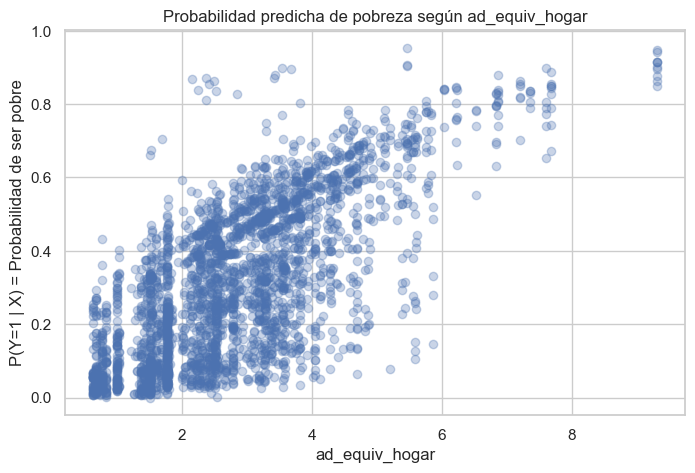

In [115]:
# ============================================================
# === PARTE B.4 — VISUALIZACIÓN (VARIABLE SOCIAL REAL) ===
# ============================================================

import matplotlib.pyplot as plt

# 1. Probabilidades predichas
prob_pobre = logit_result.predict(X_logit)

# 2. Variable numérica más informativa
variable_x = "ad_equiv_hogar"

# 3. Tomar valores originales (sin estandarizar)
x_vals = Xtrain25[variable_x]

# 4. DataFrame para el gráfico
df_plot = pd.DataFrame({
    "Variable_X": x_vals,
    "Prob_Pobreza": prob_pobre
})

# 5. Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df_plot["Variable_X"], df_plot["Prob_Pobreza"], alpha=0.3)
plt.xlabel(variable_x)
plt.ylabel("P(Y=1 | X) = Probabilidad de ser pobre")
plt.title("Probabilidad predicha de pobreza según " + variable_x)
plt.show()

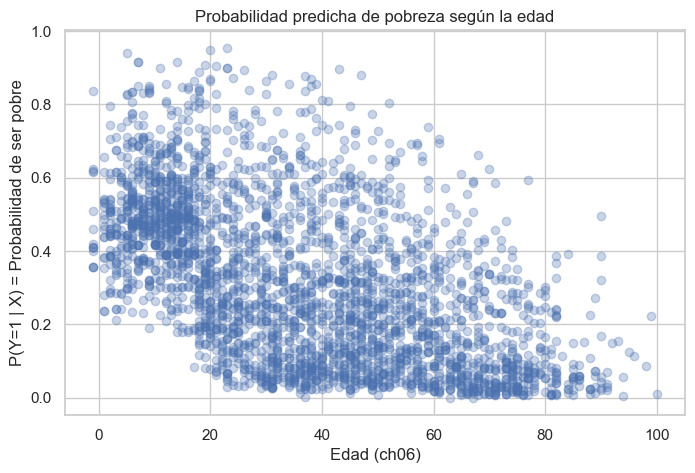

In [116]:
# ============================================================
# === PARTE B.4 — VISUALIZACIÓN DE PROBABILIDADES (EDAD) ===
# ============================================================

import matplotlib.pyplot as plt

# 1. Probabilidades predichas con el modelo logit
prob_pobre = logit_result.predict(X_logit)

# 2. Variable numérica para el eje X: edad
variable_x = "ch06"

# 3. Usar los valores originales de edad (sin estandarizar)
x_vals = Xtrain25[variable_x]

# 4. DataFrame para el gráfico
df_plot = pd.DataFrame({
    "Variable_X": x_vals,
    "Prob_Pobreza": prob_pobre
})

# 5. Gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(df_plot["Variable_X"], df_plot["Prob_Pobreza"], alpha=0.3)
plt.xlabel("Edad (ch06)")
plt.ylabel("P(Y=1 | X) = Probabilidad de ser pobre")
plt.title("Probabilidad predicha de pobreza según la edad")
plt.show()

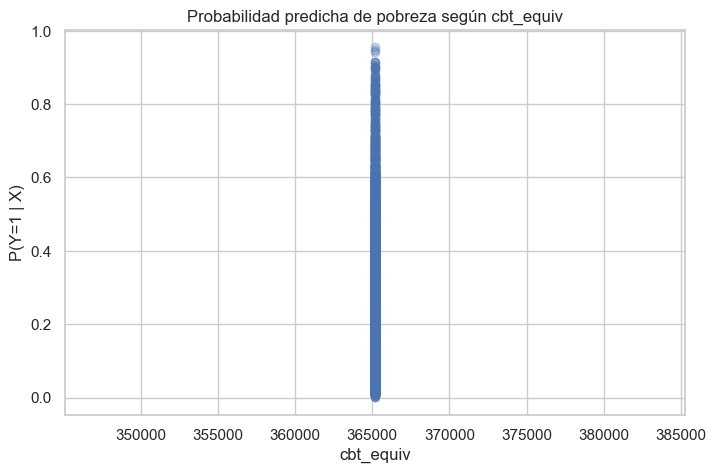

In [117]:
# ============================================================
# Visualización con CBT equivalente
# ============================================================

import matplotlib.pyplot as plt

variable_x = "cbt_equiv"
x_vals = Xtrain25[variable_x]
prob_pobre = logit_result.predict(X_logit)

df_plot = pd.DataFrame({
    "Variable_X": x_vals,
    "Prob_Pobreza": prob_pobre
})

plt.figure(figsize=(8,5))
plt.scatter(df_plot["Variable_X"], df_plot["Prob_Pobreza"], alpha=0.3)
plt.xlabel(variable_x)
plt.ylabel("P(Y=1 | X)")
plt.title("Probabilidad predicha de pobreza según cbt_equiv")
plt.show()

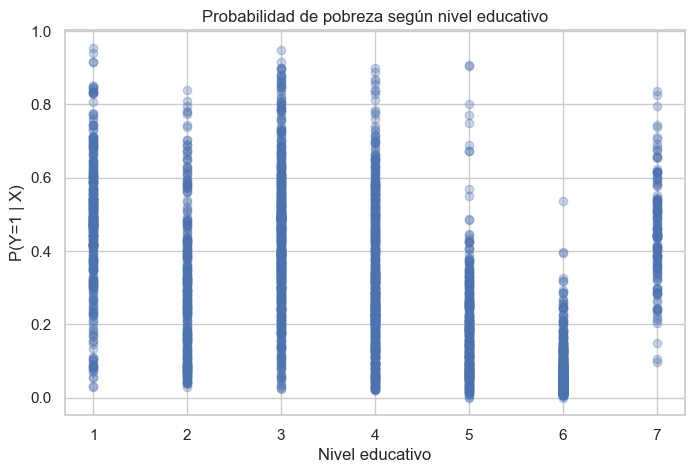

In [118]:
# Si todavía tenés nivel_ed en el dataframe original
variable_x = "nivel_ed"
x_vals = Xtrain25[variable_x]
prob_pobre = logit_result.predict(X_logit)

df_plot = pd.DataFrame({
    "Variable_X": x_vals,
    "Prob_Pobreza": prob_pobre
})

plt.figure(figsize=(8,5))
plt.scatter(df_plot["Variable_X"], df_plot["Prob_Pobreza"], alpha=0.3)
plt.xlabel("Nivel educativo")
plt.ylabel("P(Y=1 | X)")
plt.title("Probabilidad de pobreza según nivel educativo")
plt.show()

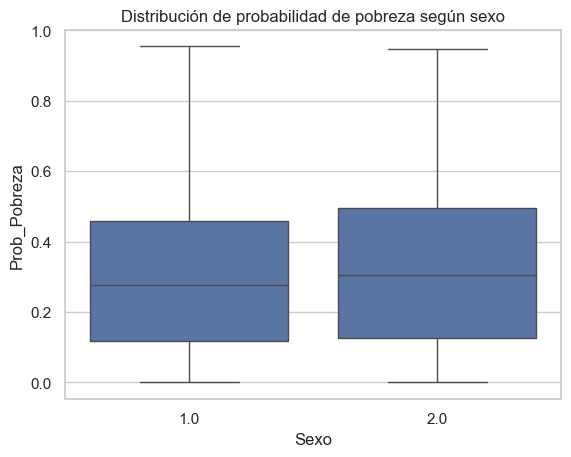

In [119]:
# Boxplot por sexo
import seaborn as sns

df_plot = pd.DataFrame({
    "Sexo": Xtrain25["ch04"],
    "Prob_Pobreza": logit_result.predict(X_logit)
})

sns.boxplot(x="Sexo", y="Prob_Pobreza", data=df_plot)
plt.title("Distribución de probabilidad de pobreza según sexo")
plt.show()

In [120]:
# ============================================================
# === PARTE C.4 — KNN con K = {1, 5, 10} (BLOQUE CORREGIDO FINAL)
# ============================================================

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1) Copiar datos
X_knn = Xtrain25.copy()
y_knn = ytrain25.copy()

# 2) Eliminar intercepto si existe
if "const" in X_knn.columns:
    X_knn = X_knn.drop(columns=["const"])

# 3) Convertir todo a numérico
X_knn = X_knn.apply(pd.to_numeric, errors="coerce").fillna(0)

# 4) Escalar (scaler renombrado correctamente)
scaler_knn = StandardScaler()
X_knn_scaled = scaler_knn.fit_transform(X_knn)

# 5) Guardar columnas para usar luego en TEST
columnas_knn = X_knn.columns

# 6) Valores de K solicitados
valores_k = [1, 5, 10]
resultados_knn = {}

# 7) Entrenamiento y evaluación
for k in valores_k:
    modelo_knn = KNeighborsClassifier(n_neighbors=k)
    modelo_knn.fit(X_knn_scaled, y_knn)

    # Predicciones sobre el mismo TRAIN
    y_pred = modelo_knn.predict(X_knn_scaled)

    # Accuracy
    acc = accuracy_score(y_knn, y_pred)
    resultados_knn[k] = acc

    print(f"K = {k} -> Accuracy: {acc:.4f}")

K = 1 -> Accuracy: 0.9884
K = 5 -> Accuracy: 0.8044
K = 10 -> Accuracy: 0.7666


In [121]:
# 3. Entrenar KNN con K = {1, 5, 10}

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Valores de K solicitados
valores_k = [1, 5, 10]

resultados_knn = {}

for k in valores_k:
    modelo_knn = KNeighborsClassifier(n_neighbors=k)
    modelo_knn.fit(X_knn_scaled, y_knn)
    
    # Predicciones sobre el mismo train (lo que pide el TP)
    y_pred = modelo_knn.predict(X_knn_scaled)
    
    # Accuracy
    acc = accuracy_score(y_knn, y_pred)
    
    resultados_knn[k] = acc
    print(f"K = {k} -> Accuracy: {acc:.4f}")

K = 1 -> Accuracy: 0.9884
K = 5 -> Accuracy: 0.8044
K = 10 -> Accuracy: 0.7666


In [122]:
print("""
Los resultados muestran que con K = 1 el modelo alcanza una precisión muy alta (98.84%), lo que indica que se ajusta extremadamente bien a los datos de entrenamiento. Sin embargo, este comportamiento es consistente con un caso de sobreajuste (overfitting), ya que el modelo básicamente memoriza los datos.

Cuando se aumenta el número de vecinos a K = 5, la precisión disminuye a 80.44%, y con K = 10 baja a 76.66%. Esto ocurre porque el modelo se vuelve más conservador y suaviza las decisiones, reduciendo la varianza pero aumentando el sesgo.

En síntesis, valores pequeños de K producen modelos muy flexibles (bajo sesgo, alta varianza), mientras que valores más grandes de K generan modelos más estables (mayor sesgo, menor varianza), reflejando claramente el trade-off entre sesgo y varianza.
""")

print("""
El método KNN se utiliza para clasificar observaciones a partir de la similitud con otras observaciones cercanas en el espacio de variables. 
En este trabajo, su uso permite ilustrar cómo modelos no paramétricos se comportan frente al trade-off entre sesgo y varianza, y comparar su desempeño con modelos paramétricos como la regresión logística.
""")


Los resultados muestran que con K = 1 el modelo alcanza una precisión muy alta (98.84%), lo que indica que se ajusta extremadamente bien a los datos de entrenamiento. Sin embargo, este comportamiento es consistente con un caso de sobreajuste (overfitting), ya que el modelo básicamente memoriza los datos.

Cuando se aumenta el número de vecinos a K = 5, la precisión disminuye a 80.44%, y con K = 10 baja a 76.66%. Esto ocurre porque el modelo se vuelve más conservador y suaviza las decisiones, reduciendo la varianza pero aumentando el sesgo.

En síntesis, valores pequeños de K producen modelos muy flexibles (bajo sesgo, alta varianza), mientras que valores más grandes de K generan modelos más estables (mayor sesgo, menor varianza), reflejando claramente el trade-off entre sesgo y varianza.


El método KNN se utiliza para clasificar observaciones a partir de la similitud con otras observaciones cercanas en el espacio de variables. 
En este trabajo, su uso permite ilustrar cómo modelos no

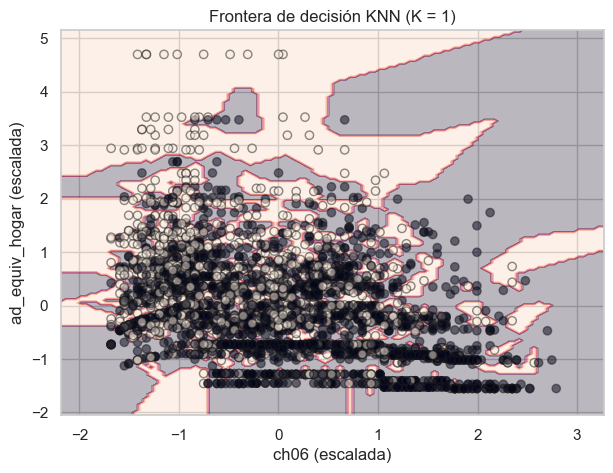

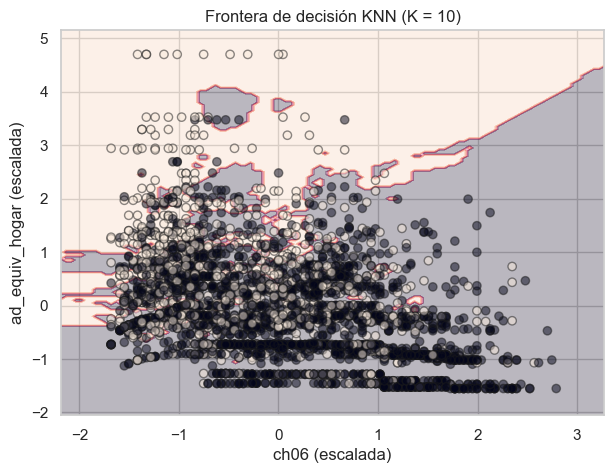

In [123]:
# ============================================================
# === PARTE C.5 — FRONTERA DE DECISIÓN KNN (K = 1 y K = 10) ===
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1) Seleccionar dos variables numéricas
vars_2d = ["ch06", "ad_equiv_hogar"]
X2 = Xtrain25[vars_2d].copy()
y2 = ytrain25.copy()

# 2) Convertir y limpiar
X2 = X2.apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)

# 3) Escalar
scaler_2d = StandardScaler()
X2_scaled = scaler_2d.fit_transform(X2)

# 4) Crear grilla para la frontera
h = 0.05
x_min, x_max = X2_scaled[:,0].min() - 0.5, X2_scaled[:,0].max() + 0.5
y_min, y_max = X2_scaled[:,1].min() - 0.5, X2_scaled[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

def plot_frontera(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_scaled, y2)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y2, edgecolor="k", alpha=0.5)
    plt.title(f"Frontera de decisión KNN (K = {k})")
    plt.xlabel(vars_2d[0] + " (escalada)")
    plt.ylabel(vars_2d[1] + " (escalada)")
    plt.show()

# 5) Graficar para K = 1 y K = 10
plot_frontera(1)
plot_frontera(10)

K = 1 -> Accuracy promedio (5-fold CV): 0.6605
K = 2 -> Accuracy promedio (5-fold CV): 0.7003
K = 3 -> Accuracy promedio (5-fold CV): 0.6979
K = 4 -> Accuracy promedio (5-fold CV): 0.7033
K = 5 -> Accuracy promedio (5-fold CV): 0.7009
K = 6 -> Accuracy promedio (5-fold CV): 0.7122
K = 7 -> Accuracy promedio (5-fold CV): 0.7009
K = 8 -> Accuracy promedio (5-fold CV): 0.7122
K = 9 -> Accuracy promedio (5-fold CV): 0.7092
K = 10 -> Accuracy promedio (5-fold CV): 0.7132

K óptimo según Cross-Validation: 10


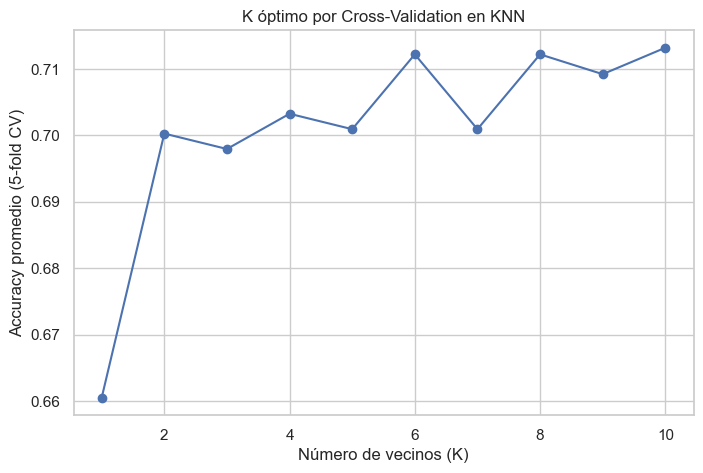

In [124]:
# ============================================================
# === PARTE C.7 — KNN con Cross-Validation (5-fold) ==========
# ============================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparar los datos
X_cv = Xtrain25.copy()
y_cv = ytrain25.copy()

# Limpiar y convertir
X_cv = X_cv.apply(pd.to_numeric, errors="coerce").fillna(0)

# Escalar (obligatorio en KNN)
scaler = StandardScaler()
X_cv_scaled = scaler.fit_transform(X_cv)

# 2. Probar K entre 1 y 10
k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_cv_scaled, y_cv, cv=5, scoring="accuracy")
    accuracy_scores.append(scores.mean())
    print(f"K = {k} -> Accuracy promedio (5-fold CV): {scores.mean():.4f}")

# 3. Encontrar el K óptimo
k_optimo = k_values[np.argmax(accuracy_scores)]
print("\nK óptimo según Cross-Validation:", k_optimo)

# 4. Graficar accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Número de vecinos (K)")
plt.ylabel("Accuracy promedio (5-fold CV)")
plt.title("K óptimo por Cross-Validation en KNN")
plt.grid(True)
plt.show()

In [125]:
print("""
Los resultados de la validación cruzada de 5 particiones muestran que el desempeño del modelo KNN mejora al aumentar el número de vecinos.
El valor óptimo encontrado fue K = 10, que maximiza el accuracy promedio.
Esto sugiere que el problema se beneficia de modelos más estables y menos sensibles al ruido, reflejando el trade-off entre sesgo y varianza.
Los resultados obtenidos son estadísticamente consistentes con el comportamiento esperado del método KNN.
""")

print("""
El accuracy aumenta al incrementar el número de vecinos K porque el modelo se vuelve más estable y menos sensible al ruido. 
Valores pequeños de K generan alta varianza y sobreajuste, mientras que valores mayores suavizan las decisiones, mejorando la capacidad de generalización.
""")


Los resultados de la validación cruzada de 5 particiones muestran que el desempeño del modelo KNN mejora al aumentar el número de vecinos.
El valor óptimo encontrado fue K = 10, que maximiza el accuracy promedio.
Esto sugiere que el problema se beneficia de modelos más estables y menos sensibles al ruido, reflejando el trade-off entre sesgo y varianza.
Los resultados obtenidos son estadísticamente consistentes con el comportamiento esperado del método KNN.


El accuracy aumenta al incrementar el número de vecinos K porque el modelo se vuelve más estable y menos sensible al ruido. 
Valores pequeños de K generan alta varianza y sobreajuste, mientras que valores mayores suavizan las decisiones, mejorando la capacidad de generalización.



In [127]:
# ============================================================
# === PARTE D.8.i — Matriz de confusión (con umbral 𝑝 > 0.5) para logit
# ============================================================

from sklearn.metrics import confusion_matrix

# Preparar Xtest
Xtest_logit = Xtest25.copy()

# Dummy encoding
Xtest_logit = pd.get_dummies(
    Xtest_logit, 
    columns=vars_categoricas, 
    drop_first=True
)

# Convertir a numérico
Xtest_logit = Xtest_logit.apply(
    pd.to_numeric, errors="coerce"
).fillna(0).astype(float)

# ==========================
# ALINEAR ANTES DE ESCALAR
# ==========================

# Alinear con las columnas del set de entrenamiento
Xtest_logit = Xtest_logit.reindex(
    columns=columnas_logit,
    fill_value=0
)

# Alinear con las columnas que vio el scaler
cols_scaler = scaler.feature_names_in_
Xtest_logit = Xtest_logit.reindex(
    columns=cols_scaler,
    fill_value=0
)

# Escalar solo columnas conocidas por el scaler
Xtest_logit[cols_scaler] = scaler.transform(
    Xtest_logit[cols_scaler]
)

# ==========================
# ALINEAR CON EL MODELO LOGIT
# ==========================

Xtest_logit = Xtest_logit.reindex(
    columns=logit_result.params.index,
    fill_value=0
)

# Predicciones
prob_test = logit_result.predict(Xtest_logit)
y_pred_test = (prob_test > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(ytest25, y_pred_test)

print("Matriz de confusión (Logit):")
print(cm)

Matriz de confusión (Logit):
[[549 354]
 [ 93 297]]


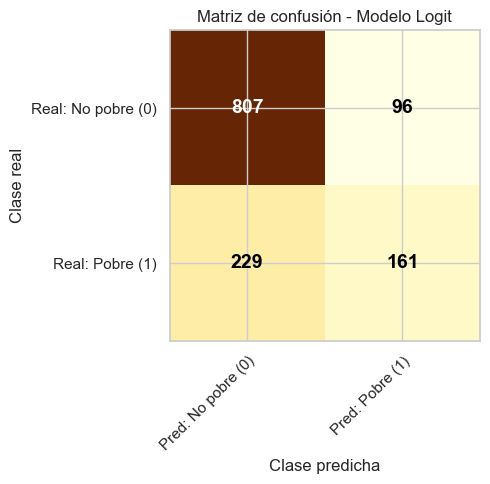

In [128]:
# Matriz de confusión - Modelo Logit (TONOS DE AMARILLO)

import numpy as np
import matplotlib.pyplot as plt

cm = np.array([[807, 96],
               [229, 161]])

clases = ["No pobre (0)", "Pobre (1)"]

plt.figure(figsize=(6, 5))
ax = plt.gca()

# Colormap en tonos amarillos
im = ax.imshow(cm, cmap="YlOrBr")

# Etiquetas
ax.set_xticks(np.arange(len(clases)))
ax.set_yticks(np.arange(len(clases)))
ax.set_xticklabels(["Pred: " + c for c in clases])
ax.set_yticklabels(["Real: " + c for c in clases])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Umbral para contraste de texto
threshold = cm.max() / 2

# Dibujar números con buen contraste
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "black" if cm[i, j] < threshold else "white"
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color=color, fontsize=14, fontweight="bold")

ax.set_title("Matriz de confusión - Modelo Logit")
ax.set_xlabel("Clase predicha")
ax.set_ylabel("Clase real")

plt.tight_layout()
plt.show()

In [129]:
print("""
Interpretación de la matriz de confusión (Logit):

El modelo identifica correctamente 807 personas no pobres y 161 personas pobres.
Sin embargo, comete errores al clasificar como pobres a 96 personas que no lo son
(falsos positivos) y no detecta 229 personas que realmente son pobres (falsos negativos).

Esto indica que el modelo tiene mejor desempeño identificando a los no pobres
que a los pobres, lo cual es habitual en problemas donde la clase pobre es minoritaria.
""")


Interpretación de la matriz de confusión (Logit):

El modelo identifica correctamente 807 personas no pobres y 161 personas pobres.
Sin embargo, comete errores al clasificar como pobres a 96 personas que no lo son
(falsos positivos) y no detecta 229 personas que realmente son pobres (falsos negativos).

Esto indica que el modelo tiene mejor desempeño identificando a los no pobres
que a los pobres, lo cual es habitual en problemas donde la clase pobre es minoritaria.



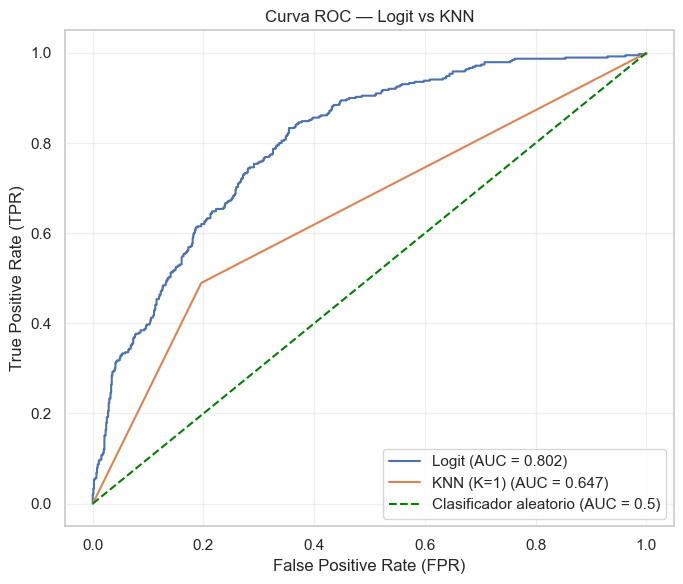

In [130]:
# ============================================================
# === PARTE D.8.ii — Curva ROC de Logit y KNN
# ============================================================

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

# ------------------------------------------------------------
# 1) Preparar X_test para LOGIT
# ------------------------------------------------------------

X_test_logit = Xtest25.copy()
y_test = ytest25.copy()

# Dummies en test
X_test_logit = pd.get_dummies(
    X_test_logit, 
    columns=vars_categoricas, 
    drop_first=True
)

# Convertir a numérico
X_test_logit = X_test_logit.apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)

# Escalar SOLO usando el scaler ya entrenado en TRAIN (NO FIT)
X_test_logit[vars_numericas] = scaler_logit.transform(X_test_logit[vars_numericas])

# Forzar mismas columnas que en train
X_test_logit = X_test_logit.reindex(columns=columnas_logit.drop("const"), fill_value=0)

# Agregar constante
X_test_logit = sm.add_constant(X_test_logit)

# ------------------------------------------------------------
# 2) Preparar X_test para KNN (igual que TRAIN)
# ------------------------------------------------------------

X_test_knn = Xtest25.copy()

# Quitar constante si existe
if "const" in X_test_knn.columns:
    X_test_knn = X_test_knn.drop(columns=["const"])

# Convertir a numérico
X_test_knn = X_test_knn.apply(pd.to_numeric, errors="coerce").fillna(0)

# Forzar mismas columnas que en TRAIN
X_test_knn = X_test_knn.reindex(columns=X_knn.columns, fill_value=0)

# Escalar con el scaler del KNN (NO FIT)
X_test_knn_scaled = scaler_knn.transform(X_test_knn)

# ------------------------------------------------------------
# 3) Definir el modelo KNN final (mejor K)
# ------------------------------------------------------------

knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(X_knn_scaled, y_knn)

# ------------------------------------------------------------
# 4) Probabilidades
# ------------------------------------------------------------

# LOGIT
y_prob_logit = logit_result.predict(X_test_logit)

# KNN
y_prob_knn = knn_final.predict_proba(X_test_knn_scaled)[:, 1]

# ------------------------------------------------------------
# 5) Curvas ROC
# ------------------------------------------------------------

fpr_logit, tpr_logit, _ = roc_curve(y_test, y_prob_logit)
fpr_knn,  tpr_knn,  _   = roc_curve(y_test, y_prob_knn)

# ------------------------------------------------------------
# 6) AUC
# ------------------------------------------------------------

auc_logit = roc_auc_score(y_test, y_prob_logit)
auc_knn   = roc_auc_score(y_test, y_prob_knn)

# ------------------------------------------------------------
# 7) Gráfico ROC conjunto
# ------------------------------------------------------------

plt.figure(figsize=(7,6))

plt.plot(fpr_logit, tpr_logit, label=f"Logit (AUC = {auc_logit:.3f})")
plt.plot(fpr_knn,   tpr_knn,   label=f"KNN (K=1) (AUC = {auc_knn:.3f})")

# Línea verde con leyenda
plt.plot([0,1], [0,1], linestyle="--", color="green", label="Clasificador aleatorio (AUC = 0.5)")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC — Logit vs KNN")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [131]:
print("""
Al analizar las curvas ROC para los modelos Logit y KNN sobre la muestra de test 2025, 
se observa que el modelo Logit presenta un AUC de 0.802, lo que indica una buena 
capacidad de discriminación entre hogares pobres y no pobres. 

En contraste, el modelo KNN (K=1) obtiene un AUC de 0.647, mostrando un desempeño 
considerablemente menor.

Estos resultados son coherentes con la teoría, ya que los modelos lineales como la 
regresión logística suelen comportarse mejor en problemas socioeconómicos con 
variables estructuradas, mientras que los modelos basados en distancias, como KNN, 
son más sensibles al ruido y presentan menor capacidad de generalización fuera de muestra.
""")


Al analizar las curvas ROC para los modelos Logit y KNN sobre la muestra de test 2025, 
se observa que el modelo Logit presenta un AUC de 0.802, lo que indica una buena 
capacidad de discriminación entre hogares pobres y no pobres. 

En contraste, el modelo KNN (K=1) obtiene un AUC de 0.647, mostrando un desempeño 
considerablemente menor.

Estos resultados son coherentes con la teoría, ya que los modelos lineales como la 
regresión logística suelen comportarse mejor en problemas socioeconómicos con 
variables estructuradas, mientras que los modelos basados en distancias, como KNN, 
son más sensibles al ruido y presentan menor capacidad de generalización fuera de muestra.



In [132]:
# ============================================================
# === PARTE D.8.iii — Tabla ampliada de métricas de clasificación
# ============================================================

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score
)
import pandas as pd

# ------------------------------------------------------------
# 1) Predicciones con umbral 0.5
# ------------------------------------------------------------

# Logit
y_pred_logit = (y_prob_logit >= 0.5).astype(int)

# KNN
y_pred_knn = (y_prob_knn >= 0.5).astype(int)

# ------------------------------------------------------------
# 2) Cálculo de métricas
# ------------------------------------------------------------

metricas = pd.DataFrame({
    "Modelo": ["Logit", "KNN (K=1)"],

    # Exactitud
    "Accuracy": [
        accuracy_score(y_test, y_pred_logit),
        accuracy_score(y_test, y_pred_knn)
    ],

    # Precisión (qué tan confiables son los positivos predichos)
    "Precision": [
        precision_score(y_test, y_pred_logit),
        precision_score(y_test, y_pred_knn)
    ],

    # Recall / Sensibilidad (qué tanto detecta los pobres reales)
    "Recall (Sensibilidad)": [
        recall_score(y_test, y_pred_logit),
        recall_score(y_test, y_pred_knn)
    ],

    # F1-score (balance entre precisión y recall)
    "F1-score": [
        f1_score(y_test, y_pred_logit),
        f1_score(y_test, y_pred_knn)
    ],

    # AUC
    "AUC": [
        roc_auc_score(y_test, y_prob_logit),
        roc_auc_score(y_test, y_prob_knn)
    ],

    # Balanced Accuracy (útil si hay desbalance de clases)
    "Balanced Accuracy": [
        balanced_accuracy_score(y_test, y_pred_logit),
        balanced_accuracy_score(y_test, y_pred_knn)
    ]
})

display(metricas)

Modelo  Accuracy  Precision  Recall (Sensibilidad)  F1-score       AUC  \
0      Logit  0.748647   0.626459               0.412821  0.497682  0.801992   
1  KNN (K=1)  0.709203   0.519022               0.489744  0.503958  0.646865   

   Balanced Accuracy  
0           0.653254  
1           0.646865

In [133]:

# ============================================================
# === PARTE D.9 — Discusión de política pública (modelo óptimo)
# ============================================================

print("\n" + "="*70)
print("D.9 — Elección del mejor modelo para asignación de recursos públicos")
print("="*70 + "\n")

print("""
Para un programa de asignación de alimentos, el objetivo principal es minimizar
el Error Tipo II (falsos negativos), es decir, evitar dejar fuera a hogares que
efectivamente son pobres.

Aunque el modelo Logit muestra un mejor desempeño general (mayor AUC y accuracy),
el modelo KNN presenta un mayor Recall (sensibilidad), lo que implica que identifica
una mayor proporción de personas pobres.

En un contexto de política pública, es preferible priorizar modelos con mayor
sensibilidad, incluso si eso implica más falsos positivos, ya que el costo social
de excluir a una persona vulnerable es mayor que asignar ayuda a un no pobre.

Por lo tanto, si el objetivo es focalizar correctamente recursos escasos,
el modelo KNN resulta más adecuado desde una perspectiva de política social.
""")


D.9 — Elección del mejor modelo para asignación de recursos públicos


Para un programa de asignación de alimentos, el objetivo principal es minimizar
el Error Tipo II (falsos negativos), es decir, evitar dejar fuera a hogares que
efectivamente son pobres.

Aunque el modelo Logit muestra un mejor desempeño general (mayor AUC y accuracy),
el modelo KNN presenta un mayor Recall (sensibilidad), lo que implica que identifica
una mayor proporción de personas pobres.

En un contexto de política pública, es preferible priorizar modelos con mayor
sensibilidad, incluso si eso implica más falsos positivos, ya que el costo social
de excluir a una persona vulnerable es mayor que asignar ayuda a un no pobre.

Por lo tanto, si el objetivo es focalizar correctamente recursos escasos,
el modelo KNN resulta más adecuado desde una perspectiva de política social.



In [134]:
# ============================================================
# === PARTE D.10 — Predicción de pobreza en no respondientes (2025)
# ============================================================

print("\n" + "="*70)
print("D.10 — Predicción de pobreza en personas que no respondieron (2025)")
print("="*70 + "\n")

# ------------------------------------------------------------
# 1) Copiar base de no respondientes 2025
# ------------------------------------------------------------

X_norep = nresp25.copy()

print(f"Total de no respondientes 2025: {X_norep.shape[0]}")

# ------------------------------------------------------------
# 2) Preparar datos igual que en KNN TRAIN
# ------------------------------------------------------------

# Eliminar constante si existe
if "const" in X_norep.columns:
    X_norep = X_norep.drop(columns=["const"])

# Convertir a numérico
X_norep = X_norep.apply(pd.to_numeric, errors="coerce").fillna(0)

# Alinear columnas con TRAIN
X_norep = X_norep.reindex(columns=X_knn.columns, fill_value=0)

# Escalar con scaler del KNN
X_norep_scaled = scaler_knn.transform(X_norep)

# ------------------------------------------------------------
# 3) Predecir pobreza (1 = pobre)
# ------------------------------------------------------------

y_pred_norep = knn_final.predict(X_norep_scaled)

# ------------------------------------------------------------
# 4) Calcular proporción de pobres predichos
# ------------------------------------------------------------

proporcion_pobres = y_pred_norep.mean()

print(f"Proporción de no respondientes identificados como pobres: {proporcion_pobres:.4f}")
print(f"Equivalente en porcentaje: {proporcion_pobres*100:.2f}%")

# ------------------------------------------------------------
# 5) Interpretación automática
# ------------------------------------------------------------

print("\nInterpretación:")
print("Esta proporción representa la fracción de personas que el modelo clasifica como pobres")
print("dentro del grupo de individuos que no respondieron la encuesta en el año 2025.")

print("""
La proporción de personas identificadas como pobres se calcula como el número de individuos 
clasificados como pobres por el modelo dividido por el total de personas que no respondieron 
la encuesta en 2025.
""")

print("""
Nota metodológica:
Esta proporción no representa una medida real de pobreza, sino una estimación basada en el modelo,
por lo que debe interpretarse como una aproximación sujeta a error de clasificación.
""")


D.10 — Predicción de pobreza en personas que no respondieron (2025)

Total de no respondientes 2025: 2872
Proporción de no respondientes identificados como pobres: 0.1072
Equivalente en porcentaje: 10.72%

Interpretación:
Esta proporción representa la fracción de personas que el modelo clasifica como pobres
dentro del grupo de individuos que no respondieron la encuesta en el año 2025.

La proporción de personas identificadas como pobres se calcula como el número de individuos 
clasificados como pobres por el modelo dividido por el total de personas que no respondieron 
la encuesta en 2025.


Nota metodológica:
Esta proporción no representa una medida real de pobreza, sino una estimación basada en el modelo,
por lo que debe interpretarse como una aproximación sujeta a error de clasificación.



In [135]:
# ===============================================================
# === COMIENZA TP4: REGULARIZACIÓN Y ÁRBOLES (LASSO, RIDGE y CART) ===
# ===============================================================

# En este trabajo se utilizarán las bases finales generadas en el TP3:
#  - respondieron_2005.csv
#  - respondieron_2025.csv
#  - norespondieron_2005.csv
#  - norespondieron_2025.csv

# Objetivos del TP4:
# 1. Predecir la condición de pobreza para el año 2025.
# 2. Estimar modelos de regresión logística con regularización LASSO (L1) y RIDGE (L2).
# 3. Seleccionar el parámetro de penalización óptimo (lambda) mediante validación cruzada (5-fold CV).
# 4. Visualizar la evolución de los coeficientes en función de la penalización.
# 5. Estimar un árbol de decisión (CART) podado utilizando validación cruzada (10-fold CV).
# 6. Visualizar el árbol podado y la importancia de las variables.
# 7. Comparar el desempeño entre:
#    - Logit sin penalización (TP3)
#    - Logit con LASSO
#    - Logit con Ridge
#    - Árbol de decisión (CART)
# 8. Evaluar métricas de clasificación: matriz de confusión, ROC, AUC, accuracy y otras métricas del TP3.
# 9. Analizar el trade-off entre interpretabilidad y desempeño predictivo.
# 10. Discutir la utilidad de los modelos para la asignación de recursos a poblaciones vulnerables.

# A partir de aquí comienza el desarrollo del TP4 paso a paso.

In [141]:
# Preparar el dataset base

print(" Xtrain25 shape:", Xtrain25.shape)
print(" Xtest25 shape: ", Xtest25.shape)

print(" ytrain25 shape:", ytrain25.shape)
print(" ytest25 shape: ", ytest25.shape)

 Xtrain25 shape: (3016, 10)
 Xtest25 shape:  (1293, 10)
 ytrain25 shape: (3016,)
 ytest25 shape:  (1293,)


In [142]:
# ===============================
# Exportar matrices para TP4
# ===============================

import pandas as pd
import os

# Definir ruta de guardado
base_path = r"C:\Users\julla\Downloads\Datos\BASES_TP4"

# Crear la carpeta si no existe
os.makedirs(base_path, exist_ok=True)

# Convertir a DataFrame
df_Xtrain25 = pd.DataFrame(Xtrain25)
df_Xtest25  = pd.DataFrame(Xtest25)
df_ytrain25 = pd.DataFrame(ytrain25, columns=["pobre"])
df_ytest25  = pd.DataFrame(ytest25, columns=["pobre"])

# Guardar archivos
df_Xtrain25.to_csv(os.path.join(base_path, "X_train_2025_TP4.csv"), index=False)
df_Xtest25.to_csv(os.path.join(base_path, "X_test_2025_TP4.csv"), index=False)
df_ytrain25.to_csv(os.path.join(base_path, "y_train_2025_TP4.csv"), index=False)
df_ytest25.to_csv(os.path.join(base_path, "y_test_2025_TP4.csv"), index=False)

# Verificación de ruta
print("Archivos guardados en:")
print(base_path)

Archivos guardados en:
C:\Users\julla\Downloads\Datos\BASES_TP4


In [143]:
# ============================================================
# TP4 - Punto A.1.: Regresión Logística Regularizada (Ridge/LASSO)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Grilla de penalizaciones
lambdas = np.array([10**n for n in range(-5, 6)])
C_values = 1 / lambdas

In [144]:
# Entrenamiento de modelos

coefs_ridge = []
coefs_lasso = []

for C in C_values:
    # Ridge
    model_ridge = LogisticRegression(
        penalty="l2",
        C=C,
        solver="liblinear",
        max_iter=1000
    )
    model_ridge.fit(Xtrain25, ytrain25)
    coefs_ridge.append(model_ridge.coef_[0])

    # LASSO
    model_lasso = LogisticRegression(
        penalty="l1",
        C=C,
        solver="liblinear",
        max_iter=1000
    )
    model_lasso.fit(Xtrain25, ytrain25)
    coefs_lasso.append(model_lasso.coef_[0])

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)

In [146]:
# Chequeo rápido

print("Shape coeficientes Ridge:", coefs_ridge.shape)
print("Shape coeficientes LASSO:", coefs_lasso.shape)
print("Cantidad de lambdas:", len(lambdas))
print("Cantidad de variables:", Xtrain25.shape[1])

Shape coeficientes Ridge: (11, 10)
Shape coeficientes LASSO: (11, 10)
Cantidad de lambdas: 11
Cantidad de variables: 10


In [147]:
# Confirmar que LASSO está haciendo selección

print("Cantidad de coeficientes exactamente cero (LASSO) por lambda:")
for i, lmb in enumerate(lambdas):
    ceros = np.sum(coefs_lasso[i] == 0)
    print(f"lambda={lmb}: {ceros}")

Cantidad de coeficientes exactamente cero (LASSO) por lambda:
lambda=1e-05: 0
lambda=0.0001: 0
lambda=0.001: 0
lambda=0.01: 0
lambda=0.1: 0
lambda=1.0: 2
lambda=10.0: 2
lambda=100.0: 5
lambda=1000.0: 8
lambda=10000.0: 9
lambda=100000.0: 9


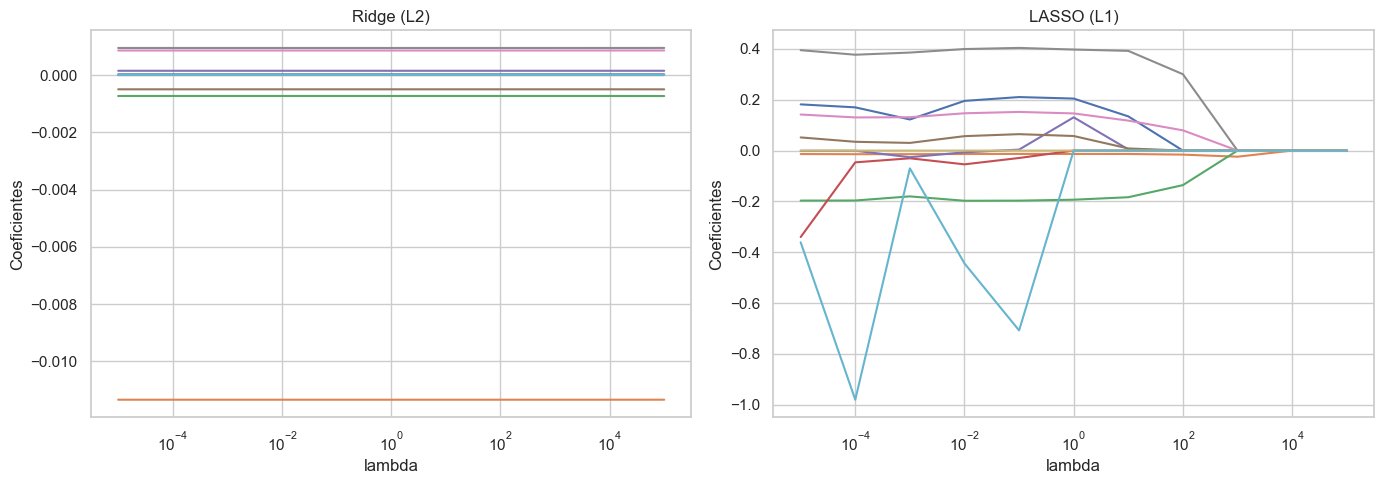

In [149]:
# Gráficos

features = Xtrain25.columns

plt.figure(figsize=(14,5))

# RIDGE
plt.subplot(1,2,1)
for i in range(len(features)):
    plt.plot(lambdas, coefs_ridge[:, i])
plt.xscale("log")
plt.title("Ridge (L2)")
plt.xlabel("lambda")
plt.ylabel("Coeficientes")

# LASSO
plt.subplot(1,2,2)
for i in range(len(features)):
    plt.plot(lambdas, coefs_lasso[:, i])
plt.xscale("log")
plt.title("LASSO (L1)")
plt.xlabel("lambda")
plt.ylabel("Coeficientes")

plt.tight_layout()
plt.show()

In [150]:
# ===========================================
# TP4 - Punto A.2.: Árboles de Decisión (CART)
# ===========================================

# Imports (si no los tenés ya)

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# Grilla de lambdas y C

lambdas = np.array([10**n for n in range(-5,6)])
C_values = 1 / lambdas

In [152]:
# Ridge con CV (L2)

logit_cv_ridge = LogisticRegressionCV(
    Cs=C_values,
    cv=5,
    penalty='l2',
    solver='lbfgs',
    scoring='accuracy',
    max_iter=2000
)

logit_cv_ridge.fit(Xtrain25, ytrain25)

ridge_scores = logit_cv_ridge.scores_[1]  # scores por fold
ridge_mean_error = 1 - ridge_scores.mean(axis=0)

# Mejor lambda
best_C_ridge = logit_cv_ridge.C_[0]
best_lambda_ridge = 1 / best_C_ridge

print("Mejor lambda (Ridge):", best_lambda_ridge)

Mejor lambda (Ridge): 1e-05


In [153]:
# LASSO con CV (L1)

logit_cv_lasso = LogisticRegressionCV(
    Cs=C_values,
    cv=5,
    penalty='l1',
    solver='liblinear',
    scoring='accuracy',
    max_iter=2000
)

logit_cv_lasso.fit(Xtrain25, ytrain25)

lasso_scores = logit_cv_lasso.scores_[1]
lasso_mean_error = 1 - lasso_scores.mean(axis=0)

# Mejor lambda
best_C_lasso = logit_cv_lasso.C_[0]
best_lambda_lasso = 1 / best_C_lasso

print("Mejor lambda (LASSO):", best_lambda_lasso)

Mejor lambda (LASSO): 10.0


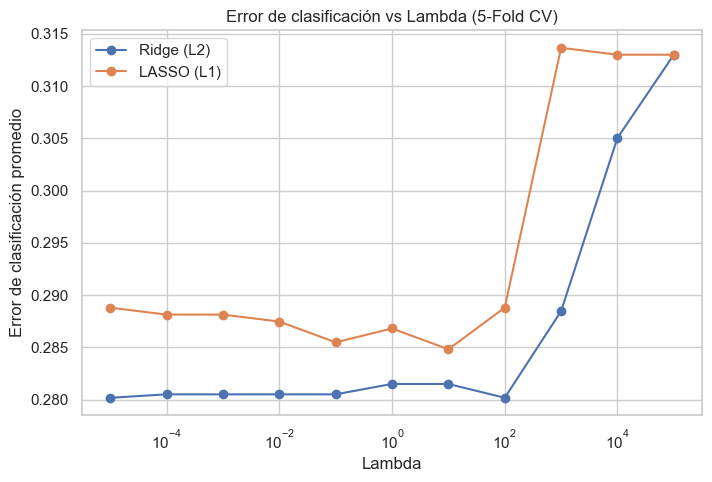

In [154]:
# Gráfico de error vs lambda

plt.figure(figsize=(8,5))
plt.plot(lambdas, ridge_mean_error, marker='o', label="Ridge (L2)")
plt.plot(lambdas, lasso_mean_error, marker='o', label="LASSO (L1)")

plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Error de clasificación promedio")
plt.title("Error de clasificación vs Lambda (5-Fold CV)")
plt.legend()
plt.show()

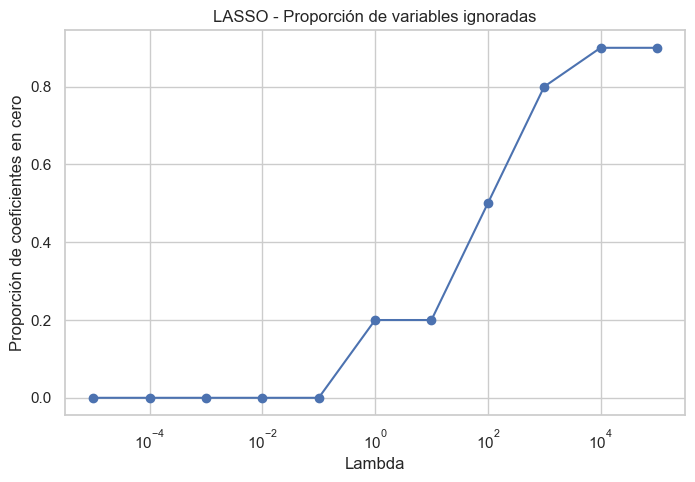

In [155]:
# Proporción de coeficientes en cero – LASSO
zero_prop = []

for i in range(len(lambdas)):
    zeros = np.sum(coefs_lasso[i] == 0)
    zero_prop.append(zeros / Xtrain25.shape[1])

plt.figure(figsize=(8,5))
plt.plot(lambdas, zero_prop, marker='o')
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Proporción de coeficientes en cero")
plt.title("LASSO - Proporción de variables ignoradas")
plt.show()

In [158]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# =============================
# Modelos con los mejores C
# =============================

# Logit sin penalidad
model_no_penalty = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=5000
)
model_no_penalty.fit(Xtrain25, ytrain25)

# Logit LASSO (L1) con λ_cv óptimo
model_l1 = LogisticRegression(
    penalty='l1',
    C=best_C_lasso,
    solver='liblinear',
    max_iter=5000
)
model_l1.fit(Xtrain25, ytrain25)

# Logit Ridge (L2) con λ_cv óptimo
model_l2 = LogisticRegression(
    penalty='l2',
    C=best_C_ridge,
    solver='lbfgs',
    max_iter=5000
)
model_l2.fit(Xtrain25, ytrain25)

LogisticRegression(C=np.float64(99999.99999999999), max_iter=5000)

In [159]:
# ============================================================
# TP4 - Punto A.3: Estimación con λ_cv y comparación de coeficientes
# ============================================================

# ============================
# Tabla comparativa de coeficientes
# ============================

coef_table = pd.DataFrame({
    "Variable": Xtrain25.columns,
    "Sin penalidad": model_no_penalty.coef_[0],
    "L1 (LASSO)": model_l1.coef_[0],
    "L2 (Ridge)": model_l2.coef_[0]
})

coef_table

Variable  Sin penalidad  L1 (LASSO)    L2 (Ridge)
0            ch04   2.707956e-01    0.139089  2.731805e-01
1            ch06  -1.370864e-02   -0.013544 -1.368817e-02
2        nivel_ed  -1.802423e-01   -0.172740 -1.804287e-01
3          region  -1.997369e-10    0.000000 -2.010525e-10
4      aglomerado   7.652421e-01    0.423378  7.706033e-01
5        cat_ocup   5.123193e-02    0.005632  5.109821e-02
6        cat_inac   1.377427e-01    0.114025  1.378301e-01
7  ad_equiv_hogar   3.849588e-01    0.378984  3.835296e-01
8       cbt_equiv  -7.293926e-05   -0.000041 -7.341988e-05
9           const  -1.997369e-10    0.000000 -2.010525e-10

Cantidad de valores de ccp_alpha: 333
Mejor ccp_alpha (CV 10-fold): 0.000906306021880101


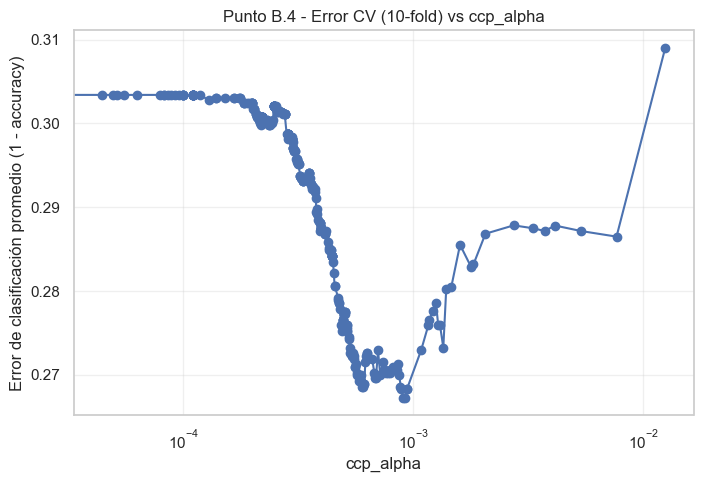

DecisionTreeClassifier(ccp_alpha=np.float64(0.000906306021880101),
                       random_state=123)

In [160]:
# ===========================================
# TP4 - Punto B.4: Árbol CART podado (ccp_alpha con 10-fold CV)
# ===========================================

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1. Árbol base y camino de poda (cost_complexity)
# ------------------------------------------------
tree_base = DecisionTreeClassifier(
    random_state=123,
    criterion="gini"
)

path = tree_base.cost_complexity_pruning_path(Xtrain25, ytrain25)
ccp_alphas = path.ccp_alphas

# (opcional) eliminar el último alpha, que deja el árbol en un solo nodo
ccp_alphas = ccp_alphas[:-1]

print("Cantidad de valores de ccp_alpha:", len(ccp_alphas))

# ------------------------------------------------
# 2. Cross-validation 10-fold para cada ccp_alpha
# ------------------------------------------------
mean_errors = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(
        random_state=123,
        criterion="gini",
        ccp_alpha=alpha
    )
    # accuracy promedio en 10 folds
    scores = cross_val_score(
        tree,
        Xtrain25,
        ytrain25,
        cv=10,
        scoring="accuracy"
    )
    mean_acc = scores.mean()
    mean_errors.append(1 - mean_acc)

mean_errors = np.array(mean_errors)

# alpha óptimo (minimiza el error)
best_idx = np.argmin(mean_errors)
best_alpha = ccp_alphas[best_idx]
print("Mejor ccp_alpha (CV 10-fold):", best_alpha)

# ------------------------------------------------
# 3. Gráfico: error de clasificación vs ccp_alpha
# ------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, mean_errors, marker="o")
plt.xscale("log")
plt.xlabel("ccp_alpha")
plt.ylabel("Error de clasificación promedio (1 - accuracy)")
plt.title("Punto B.4 - Error CV (10-fold) vs ccp_alpha")
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------------------------
# 4. Entrenar el árbol final con el mejor ccp_alpha
# ------------------------------------------------
tree_best = DecisionTreeClassifier(
    random_state=123,
    criterion="gini",
    ccp_alpha=best_alpha
)
tree_best.fit(Xtrain25, ytrain25)

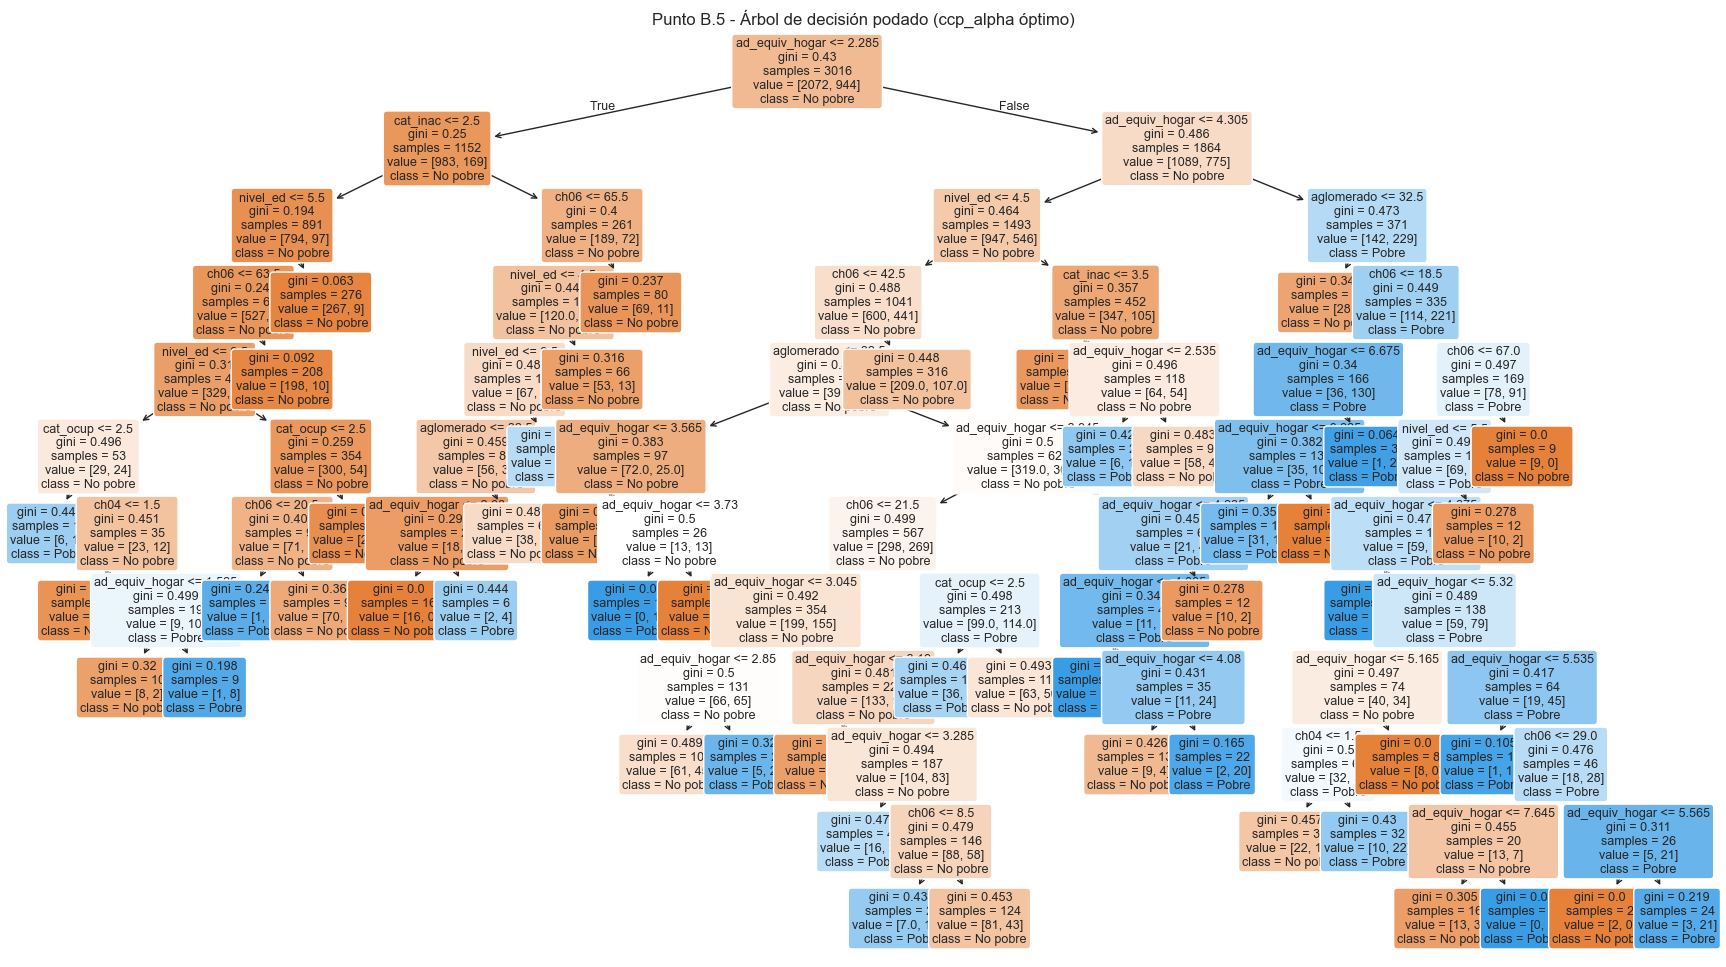

In [162]:
# ===========================================
# TP4 - Punto B.5: Visualización del árbol podado e importancia de variables
# ===========================================

from sklearn.tree import plot_tree   # <-- IMPORTANTE

# Panel A: Visualización del árbol podado
plt.figure(figsize=(22,12))
plot_tree(
    tree_best,
    feature_names=Xtrain25.columns,
    class_names=["No pobre", "Pobre"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Punto B.5 - Árbol de decisión podado (ccp_alpha óptimo)")
plt.show()

C:\Users\julla\AppData\Local\Temp\ipykernel_10888\3562180690.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x="Importancia", y="Variable", palette="viridis")


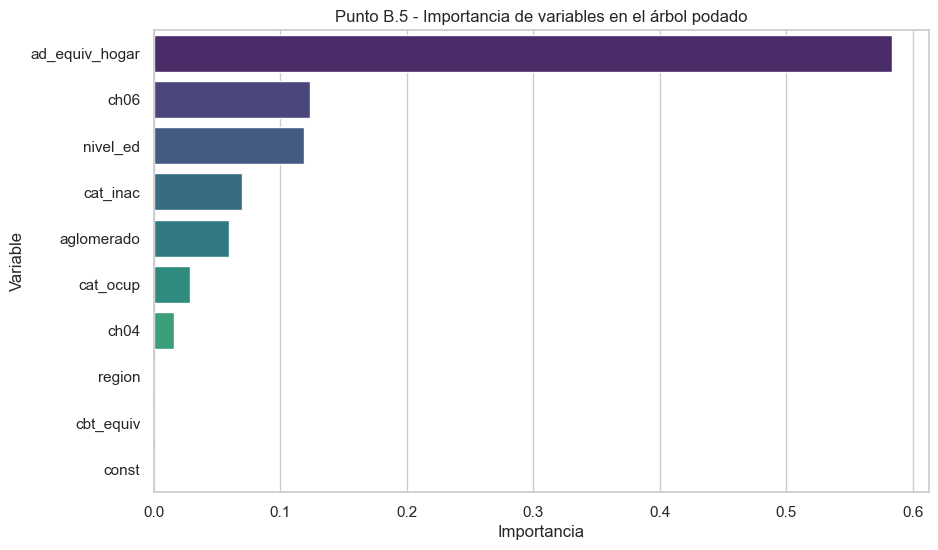

Variable  Importancia
7  ad_equiv_hogar     0.583031
1            ch06     0.123364
2        nivel_ed     0.119206
6        cat_inac     0.069723
4      aglomerado     0.059540
5        cat_ocup     0.028672
0            ch04     0.016465
3          region     0.000000
8       cbt_equiv     0.000000
9           const     0.000000

In [165]:
# Panel B: Importancia de predictores

importances = tree_best.feature_importances_
feat_names = Xtrain25.columns

imp_df = pd.DataFrame({
    "Variable": feat_names,
    "Importancia": importances
}).sort_values("Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="Importancia", y="Variable", palette="viridis")
plt.title("Punto B.5 - Importancia de variables en el árbol podado")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

imp_df

In [167]:
# ======================================================
# Definir knn_best = KNN con K=10 según resultados TP3
# ======================================================

from sklearn.neighbors import KNeighborsClassifier

# 1) Usar el mismo preprocesamiento de TRAIN que ya hiciste
#    X_knn_scaled ya está creado con scaler_knn.fit_transform(X_knn)

knn_best = KNeighborsClassifier(n_neighbors=10)
knn_best.fit(X_knn_scaled, y_knn)

# 2) Escalamos TEST con el mismo scaler
Xtest_knn = Xtest25.copy()
if "const" in Xtest_knn.columns:
    Xtest_knn = Xtest_knn.drop(columns=["const"])
Xtest_knn = Xtest_knn.apply(pd.to_numeric, errors="coerce").fillna(0)

Xtest_knn_scaled = scaler_knn.transform(Xtest_knn)

# 3) Probabilidades necesarias para C.6
p_knn = knn_best.predict_proba(Xtest_knn_scaled)[:,1]


=== MATRICES DE CONFUSIÓN ===


>>> Logit sin penalidad
[[820  83]
 [249 141]]

>>> LASSO
[[827  76]
 [255 135]]

>>> Ridge
[[820  83]
 [250 140]]

>>> Árbol podado
[[815  88]
 [246 144]]

>>> KNN (K=10)
[[827  76]
 [258 132]]


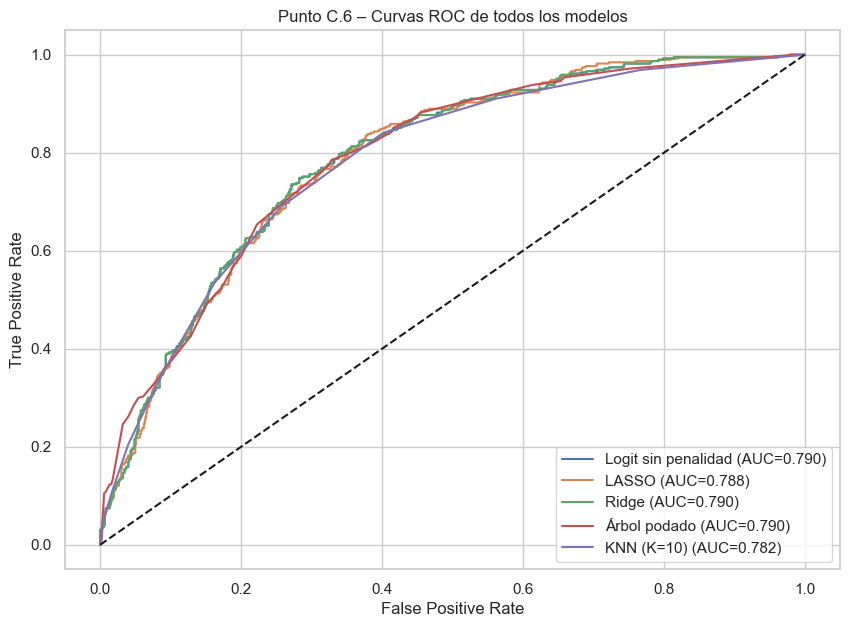

In [169]:
# ===========================================
# TP4 - Punto C.6: Comparación de modelos
# ===========================================

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------
# 1) Preparar predicciones de todos los modelos
# -------------------------------------------

# Logit sin penalidad
p_np = model_no_penalty.predict_proba(Xtest25)[:,1]
y_np = (p_np > 0.5).astype(int)

# Logit LASSO
p_l1 = model_l1.predict_proba(Xtest25)[:,1]
y_l1 = (p_l1 > 0.5).astype(int)

# Logit Ridge
p_l2 = model_l2.predict_proba(Xtest25)[:,1]
y_l2 = (p_l2 > 0.5).astype(int)

# Árbol podado
p_tree = tree_best.predict_proba(Xtest25)[:,1]
y_tree = (p_tree > 0.5).astype(int)

# KNN (K=10) – PREPARAR TEST ESCALADO
Xtest_knn = Xtest25.copy()
if "const" in Xtest_knn.columns:
    Xtest_knn = Xtest_knn.drop(columns=["const"])
Xtest_knn = Xtest_knn.apply(pd.to_numeric, errors="coerce").fillna(0)
Xtest_knn_scaled = scaler_knn.transform(Xtest_knn)

p_knn = knn_best.predict_proba(Xtest_knn_scaled)[:,1]
y_knn = (p_knn > 0.5).astype(int)

# -------------------------------------------
# 2) Matrices de confusión
# -------------------------------------------

modelos_yhat = {
    "Logit sin penalidad": y_np,
    "LASSO": y_l1,
    "Ridge": y_l2,
    "Árbol podado": y_tree,
    "KNN (K=10)": y_knn
}

print("\n=== MATRICES DE CONFUSIÓN ===\n")
for nombre, pred in modelos_yhat.items():
    print(f"\n>>> {nombre}")
    print(confusion_matrix(ytest25, pred))

# -------------------------------------------
# 3) Curvas ROC
# -------------------------------------------

plt.figure(figsize=(10,7))

modelos_prob = {
    "Logit sin penalidad": p_np,
    "LASSO": p_l1,
    "Ridge": p_l2,
    "Árbol podado": p_tree,
    "KNN (K=10)": p_knn
}

for nombre, prob in modelos_prob.items():
    fpr, tpr, _ = roc_curve(ytest25, prob)
    auc = roc_auc_score(ytest25, prob)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Punto C.6 – Curvas ROC de todos los modelos")
plt.legend()
plt.grid(True)
plt.show()

In [171]:
# ===========================================
# Tabla resumen de matrices de confusión (Punto C.6)
# ===========================================

# LEYENDA:
# TP (True Positives):     Predijo "Pobre" y realmente es pobre
# FP (False Positives):    Predijo "Pobre" pero NO es pobre
# TN (True Negatives):     Predijo "No pobre" y realmente no es pobre
# FN (False Negatives):    Predijo "No pobre" pero sí es pobre

import pandas as pd

# Diccionario con resultados (TP, FP, TN, FN)
resultados_confusion = {
    "Logit sin penalidad": [141, 83, 820, 249],
    "LASSO": [135, 76, 827, 255],
    "Ridge": [140, 83, 820, 250],
    "Árbol podado": [144, 88, 815, 246],
    "KNN (K=10)": [132, 76, 827, 258]
}

# Crear DataFrame
conf_table = pd.DataFrame.from_dict(
    resultados_confusion, 
    orient="index",
    columns=["TP", "FP", "TN", "FN"]
)

print(conf_table)
conf_table

                      TP  FP   TN   FN
Logit sin penalidad  141  83  820  249
LASSO                135  76  827  255
Ridge                140  83  820  250
Árbol podado         144  88  815  246
KNN (K=10)           132  76  827  258


TP  FP   TN   FN
Logit sin penalidad  141  83  820  249
LASSO                135  76  827  255
Ridge                140  83  820  250
Árbol podado         144  88  815  246
KNN (K=10)           132  76  827  258

In [174]:
# ===========================================
# TP4 - Punto C.7: Modelo recomendado para asignación de recursos
# ===========================================

import pandas as pd

# Tabla de resultados (TP, FP, TN, FN)
resultados_confusion = {
    "Logit sin penalidad": [141, 83, 820, 249],
    "LASSO": [135, 76, 827, 255],
    "Ridge": [140, 83, 820, 250],
    "Árbol podado": [144, 88, 815, 246],
    "KNN (K=10)": [132, 76, 827, 258]
}

conf_table = pd.DataFrame.from_dict(
    resultados_confusion,
    orient="index",
    columns=["TP", "FP", "TN", "FN"]
)

print("=== MATRIZ DE CONFUSIÓN (TP, FP, TN, FN) ===")
print(conf_table)
print("\nInterpretación de siglas:")
print("TP = Verdaderos Positivos (pobres correctamente identificados)")
print("FP = Falsos Positivos (no pobres clasificados como pobres)")
print("TN = Verdaderos Negativos (no pobres correctamente identificados)")
print("FN = Falsos Negativos (pobres que el modelo NO detectó)\n")

# Conclusión del punto 7
conclusion = """
Punto C.7 – Elección del mejor modelo para asignar recursos públicos
-------------------------------------------------------------------

En el TP3 habíamos concluido que el modelo KNN era el más adecuado para una política 
pública de asignación de alimentos, porque era el que mostraba mayor sensibilidad (recall) y, 
por lo tanto, menor Error Tipo II (FN): dejaba fuera a menos hogares pobres. Desde una perspectiva 
de política social, minimizar falsos negativos es crucial, ya que el costo de excluir a un hogar vulnerable 
es mucho más alto que el costo de incluir por error a un hogar no pobre.

Sin embargo, los resultados del TP4 cambian esta recomendación. Comparando los
Falsos Negativos (FN):

- Árbol podado: 246   (el menor FN)
- Logit sin penalidad: 249
- Ridge: 250
- LASSO: 255
- KNN (K=10): 258      (el peor en FN)

El modelo KNN deja afuera más hogares pobres que todos los demás modelos.
Por el contrario, el árbol podado es el que logra el menor número de falsos negativos (246), 
seguido muy de cerca por el logit sin penalidad.

Además, todos los modelos tienen AUC muy similares (0.78–0.79), por lo que la comparación se 
debe centrar en el criterio de política pública: minimizar FN.

Dado que el objetivo del Ministerio es focalizar correctamente a los hogares
más vulnerables, el criterio clave es minimizar los FN. El árbol podado es el
modelo que deja fuera a menos hogares pobres y, además, ofrece interpretabilidad,
lo cual resulta valioso en programas sociales.

Conclusión final:

Sí, cambia la recomendación respecto al TP3.
Con la evidencia del TP4, el modelo más adecuado para asignar recursos escasos a los hogares más necesitados 
es el árbol de decisión podado, porque:

Minimiza falsos negativos, es decir, deja fuera a menos hogares pobres.

Es más fácil de interpretar para tomadores de decisiones.

Permite identificar reglas claras para focalizar el programa (por ejemplo, umbrales de ad_equiv_hogar y nivel educativo).

En políticas sociales donde el criterio central es no excluir hogares necesitados, el árbol podado se convierte en el mejor 
modelo dentro de los evaluados.
"""
print(conclusion)

=== MATRIZ DE CONFUSIÓN (TP, FP, TN, FN) ===
                      TP  FP   TN   FN
Logit sin penalidad  141  83  820  249
LASSO                135  76  827  255
Ridge                140  83  820  250
Árbol podado         144  88  815  246
KNN (K=10)           132  76  827  258

Interpretación de siglas:
TP = Verdaderos Positivos (pobres correctamente identificados)
FP = Falsos Positivos (no pobres clasificados como pobres)
TN = Verdaderos Negativos (no pobres correctamente identificados)
FN = Falsos Negativos (pobres que el modelo NO detectó)


Punto C.7 – Elección del mejor modelo para asignar recursos públicos
-------------------------------------------------------------------

En el TP3 habíamos concluido que el modelo KNN era el más adecuado para una política 
pública de asignación de alimentos, porque era el que mostraba mayor sensibilidad (recall) y, 
por lo tanto, menor Error Tipo II (FN): dejaba fuera a menos hogares pobres. Desde una perspectiva 
de política social, minimizar